<a href="https://colab.research.google.com/github/divyanshu-mayank/Risk-Analysis/blob/main/Risk_Analytics_In_Banking_%26_Financial_Services_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.



When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.



The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.





When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

###### Approved:
The Company has approved loan Application

###### Cancelled:
The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

###### Refused:
The company had rejected the loan (because the client does not meet their requirements etc.).

###### Unused offer:  
Loan has been cancelled by the client but on different stages of the process.







# Business Objectives


The case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.



In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.



# Data Understanding

##### 1. 'application_data.csv'
It contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.



##### 2. 'previous_application.csv'
It contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.



##### 3. 'columns_description.csv'
It is data dictionary which describes the meaning of the variables.

The solution is made in 2 different ipymb files

- 1st file contains detailed analysis (EDA) on application_data to identify the important features which help us to identify the defaulters
- 2nd file contains data where we inner join the records (application_data, previous_application) with same the SK_ID_CURR

## IMPORTING LIBRARIES

In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

## Importing Data

In [131]:

import gdown

# Download the file from Google Drive
url = 'https://drive.google.com/uc?id=14amULITeDcThbud0iiWi3Eydo7Up_z5y'
output = 'application_data.csv'
gdown.download(url, output, quiet=False)

# Read the CSV file with potential solutions
application_data = pd.read_csv('application_data.csv', sep=',',  # Specify the correct delimiter (if not comma)
                                   on_bad_lines='skip',  # Skip lines with parsing errors
                                   engine='python',  # Use the Python engine for more flexibility
                                   encoding='utf-8')  # Specify the encoding

# Download previous_application.csv
url = 'https://drive.google.com/uc?id=1aQbIc4LIVQQ5lL4qAmZgsqgwgatmLYya'
output = 'previous_application.csv'
gdown.download(url, output, quiet=False)

# Read the previous_application CSV file
previous_application = pd.read_csv('previous_application.csv', sep=',', on_bad_lines='skip', engine='python', encoding='utf-8')

# Download columns_description.csv
url = 'https://drive.google.com/uc?id=1idLWKp7qyNOkvyQxvXJGS85NT6EMy5xf'
output = 'columns_description.csv'
gdown.download(url, output, quiet=False)

# Read the columns_description CSV file
columns_description = pd.read_csv('columns_description.csv', sep=',', on_bad_lines='skip', engine='python', encoding='utf-8', skiprows=1)





# import gdown

# # Download the file from Google Drive
# url = 'https://drive.google.com/uc?id=14amULITeDcThbud0iiWi3Eydo7Up_z5y'
# output = 'application_data.csv'
# gdown.download(url, output, quiet=False)

# # Read the CSV file with potential solutions
# application_data = pd.read_csv('application_data.csv', sep=',',  # Specify the correct delimiter (if not comma)
#                                    on_bad_lines='skip',  # Skip lines with parsing errors
#                                    engine='python',  # Use the Python engine for more flexibility
#                                    encoding='utf-8')  # Specify the encoding
# # application_data = pd.read_csv(r'https://drive.google.com/file/d/14amULITeDcThbud0iiWi3Eydo7Up_z5y/view?usp=drive_link')
# previous_application = pd.read_csv(r'https://drive.google.com/file/d/1aQbIc4LIVQQ5lL4qAmZgsqgwgatmLYya/view?usp=drive_link')
# columns_description = pd.read_csv(r'https://drive.google.com/file/d/1idLWKp7qyNOkvyQxvXJGS85NT6EMy5xf/view?usp=drive_link',skiprows=1)

Downloading...
From (original): https://drive.google.com/uc?id=14amULITeDcThbud0iiWi3Eydo7Up_z5y
From (redirected): https://drive.google.com/uc?id=14amULITeDcThbud0iiWi3Eydo7Up_z5y&confirm=t&uuid=e23cf49e-94b2-4869-9bfb-313704cee28a
To: /content/application_data.csv
100%|██████████| 166M/166M [00:01<00:00, 125MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1aQbIc4LIVQQ5lL4qAmZgsqgwgatmLYya
From (redirected): https://drive.google.com/uc?id=1aQbIc4LIVQQ5lL4qAmZgsqgwgatmLYya&confirm=t&uuid=72e41f73-aef8-401d-b105-0714986b0122
To: /content/previous_application.csv
100%|██████████| 405M/405M [00:05<00:00, 71.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1idLWKp7qyNOkvyQxvXJGS85NT6EMy5xf
To: /content/columns_description.csv
100%|██████████| 28.3k/28.3k [00:00<00:00, 21.0MB/s]


## Data Dimensions

In [132]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)
print ("columns_description  :",columns_description.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)
columns_description  : (159, 5)


## First Few rows of Data

In [133]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display("application_data")
display(application_data.head(3))

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [134]:
display("previous_application ")
display(previous_application.head(3))

'previous_application '

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0


## Term Dictionary

In [135]:
display("columns_description")
columns_description=columns_description.drop(['1'],axis=1)
display(columns_description)

'columns_description'

application_data                    SK_ID_CURR  \
0            application_data                        TARGET   
1            application_data            NAME_CONTRACT_TYPE   
2            application_data                   CODE_GENDER   
3            application_data                  FLAG_OWN_CAR   
4            application_data               FLAG_OWN_REALTY   
5            application_data                  CNT_CHILDREN   
6            application_data              AMT_INCOME_TOTAL   
7            application_data                    AMT_CREDIT   
8            application_data                   AMT_ANNUITY   
9            application_data               AMT_GOODS_PRICE   
10           application_data               NAME_TYPE_SUITE   
11           application_data              NAME_INCOME_TYPE   
12           application_data           NAME_EDUCATION_TYPE   
13           application_data            NAME_FAMILY_STATUS   
14           application_data             NAME_HOUSING_TYPE   
15           application_data    REGION_POPULATION_RELATIVE   
16           application_data                    DAYS_BIRTH   
17           application_data                 DAYS_EMPLOYED   
18           application_data             DAYS_REGISTRATION   
19           application_data               DAYS_ID_PUBLISH   
20           application_data                   OWN_CAR_AGE   
21           application_data                    FLAG_MOBIL   
22           application_data                FLAG_EMP_PHONE   
23           application_data               FLAG_WORK_PHONE   
24           application_data              FLAG_CONT_MOBILE   
25           application_data                    FLAG_PHONE   
26           application_data                    FLAG_EMAIL   
27           application_data               OCCUPATION_TYPE   
28           application_data               CNT_FAM_MEMBERS   
29           application_data          REGION_RATING_CLIENT   
30           application_data   REGION_RATING_CLIENT_W_CITY   
31           application_data    WEEKDAY_APPR_PROCESS_START   
32           application_data       HOUR_APPR_PROCESS_START   
33           application_data    REG_REGION_NOT_LIVE_REGION   
34           application_data    REG_REGION_NOT_WORK_REGION   
35           application_data   LIVE_REGION_NOT_WORK_REGION   
36           application_data        REG_CITY_NOT_LIVE_CITY   
37           application_data        REG_CITY_NOT_WORK_CITY   
38           application_data       LIVE_CITY_NOT_WORK_CITY   
39           application_data             ORGANIZATION_TYPE   
40           application_data                  EXT_SOURCE_1   
41           application_data                  EXT_SOURCE_2   
42           application_data                  EXT_SOURCE_3   
43           application_data                APARTMENTS_AVG   
44           application_data              BASEMENTAREA_AVG   
45           application_data   YEARS_BEGINEXPLUATATION_AVG   
46           application_data               YEARS_BUILD_AVG   
47           application_data                COMMONAREA_AVG   
48           application_data                 ELEVATORS_AVG   
49           application_data                 ENTRANCES_AVG   
50           application_data                 FLOORSMAX_AVG   
51           application_data                 FLOORSMIN_AVG   
52           application_data                  LANDAREA_AVG   
53           application_data          LIVINGAPARTMENTS_AVG   
54           application_data                LIVINGAREA_AVG   
55           application_data       NONLIVINGAPARTMENTS_AVG   
56           application_data             NONLIVINGAREA_AVG   
57           application_data               APARTMENTS_MODE   
58           application_data             BASEMENTAREA_MODE   
59           application_data  YEARS_BEGINEXPLUATATION_MODE   
60           application_data              YEARS_BUILD_MODE   
61           application_data               COMMONAREA_MODE   
62           application_data               

## Percentage of Missing values in previous_application

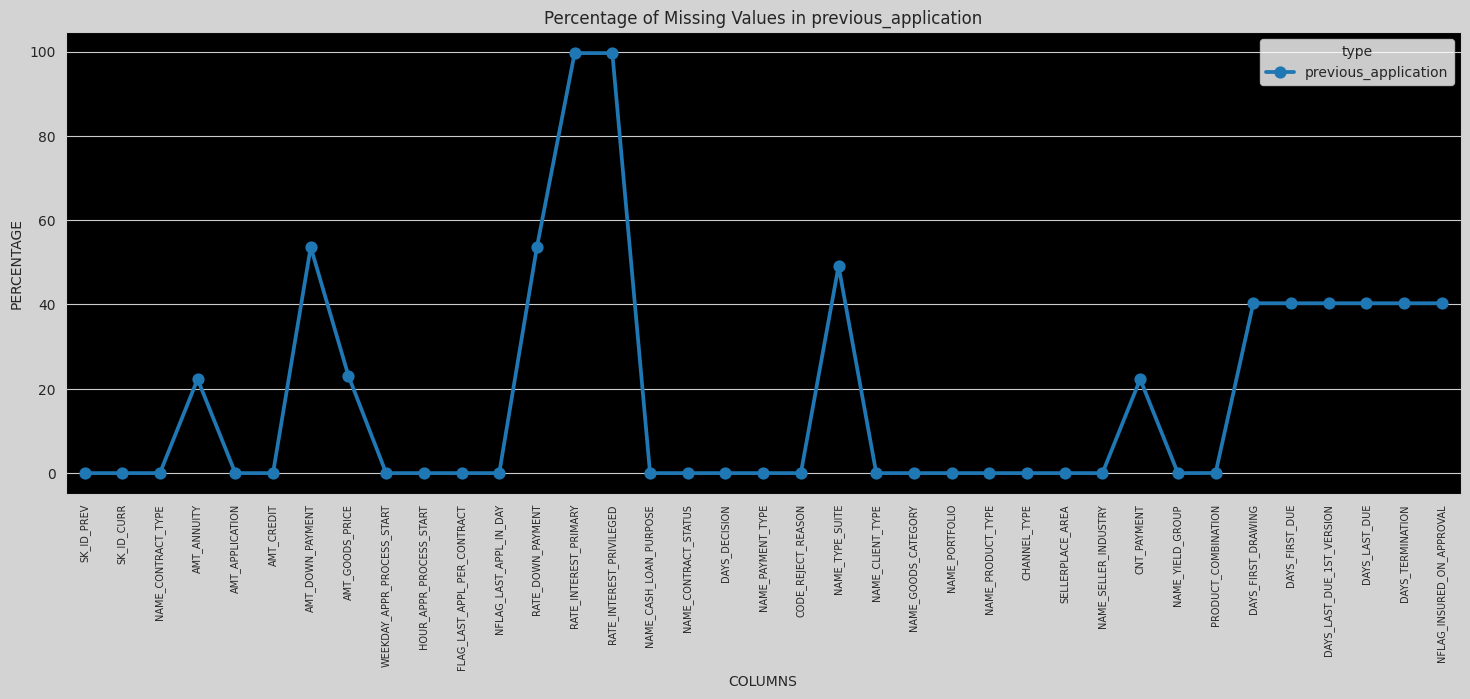

In [136]:
# Create a figure with a specific size
fig = plt.figure(figsize=(18, 6))

# Calculate the percentage of missing values for each column in the DataFrame
miss_previous_application = pd.DataFrame(previous_application.isnull().sum()*100/previous_application.shape[0]).reset_index()
miss_previous_application.columns = ["index", "missing_percentage"]  # Rename columns for clarity
miss_previous_application["type"] = "previous_application"  # Add a column to identify the dataset

# Create a point plot using Seaborn
ax = sns.pointplot(x="index", y="missing_percentage", data=miss_previous_application, hue="type")

# Customize the plot
plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
plt.title("Percentage of Missing Values in previous_application")  # Add a title
plt.ylabel("PERCENTAGE")  # Label the y-axis
plt.xlabel("COLUMNS")  # Label the x-axis
ax.set_facecolor("k")  # Set the background color of the plot to black
fig.set_facecolor("lightgrey")  # Set the background color of the figure to light grey

# Display the plot
plt.show()





# fig = plt.figure(figsize=(18,6))
# miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
# miss_previous_application["type"] = "previous_application"
# ax = sns.pointplot("index", 0, data=miss_previous_application, hue="type")
# plt.xticks(rotation =90,fontsize =7)
# plt.title("Percentage of Missing values in previous_application")
# plt.ylabel("PERCENTAGE")
# plt.xlabel("COLUMNS")
# ax.set_facecolor("k")
# fig.set_facecolor("lightgrey")

In [137]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
dtype: float64

### Removing columns with missing values more than 50%

#### key point
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [138]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

Text(0.5, 1.0, 'Percentage of Missing Values')

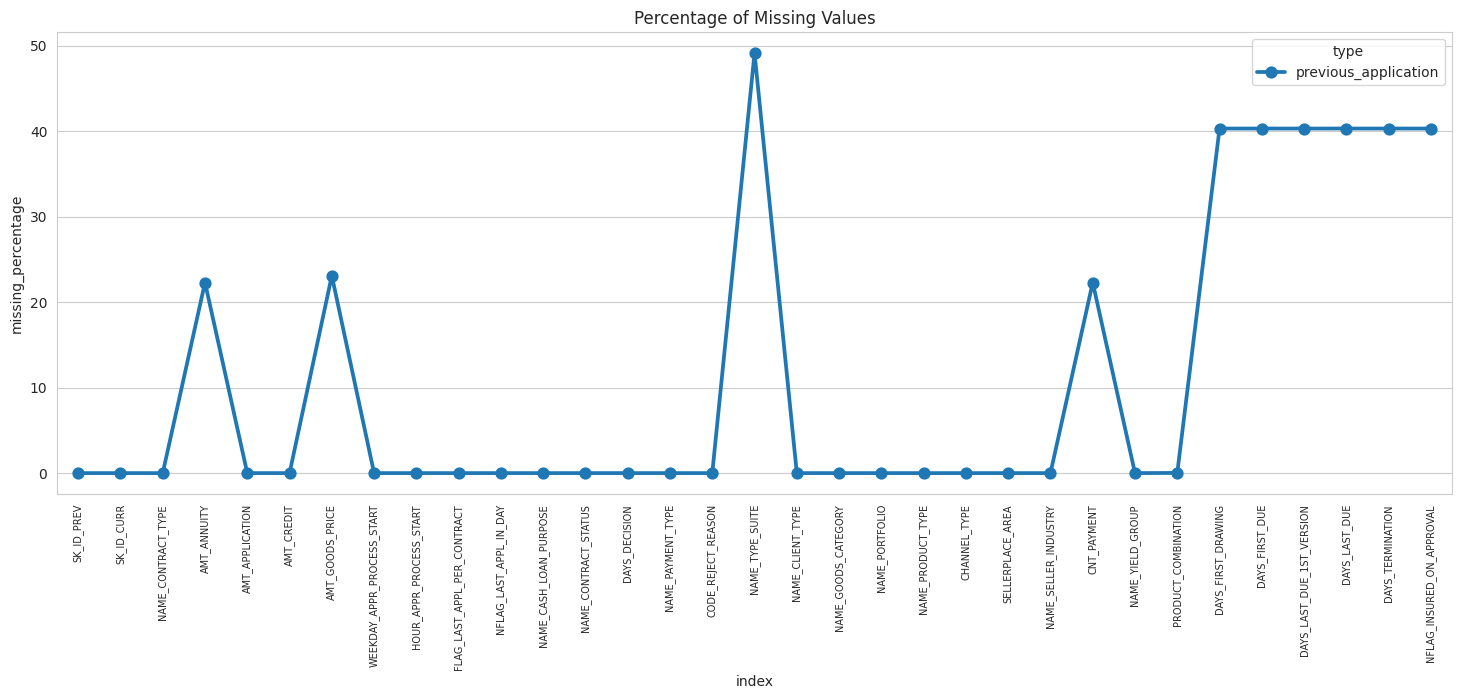

In [139]:
# fig = plt.figure(figsize=(18,6))
# miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
# miss_previous_application["type"] = "previous_application"
# ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
# plt.xticks(rotation =90,fontsize =7)
# plt.title("Percentage of Missing values in previous_application")
# plt.ylabel("PERCENTAGE")
# plt.xlabel("COLUMNS")
# ax.set_facecolor("k")
# fig.set_facecolor("lightgrey")

# Create a figure with a specific size
fig = plt.figure(figsize=(18, 6))

# Calculate the percentage of missing values for each column in the DataFrame
miss_previous_application = pd.DataFrame((previous_application.isnull().sum()) * 100 / previous_application.shape[0]).reset_index()
miss_previous_application.columns = ["index", "missing_percentage"]  # Rename columns for clarity
miss_previous_application["type"] = "previous_application"  # Add a column to identify the dataset

# Create a point plot using Seaborn
ax = sns.pointplot(x="index", y="missing_percentage", data=miss_previous_application, hue="type")

# Customize the plot
plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
plt.title("Percentage of Missing Values")

In [140]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
dtype: float64

### MISSING values Suggestion

In [141]:
print("AMT_ANNUITY NULL COUNT:" ,previous_application['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY NULL COUNT: 372235


In [142]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

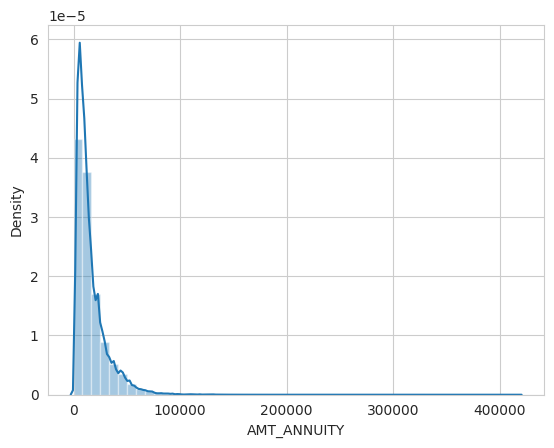

In [143]:
sns.set_style('whitegrid')
sns.distplot(previous_application['AMT_ANNUITY'])
plt.show()


### Suggestion
We can Fill NA with 15955 i.e. Mean for this field

In [144]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 385515


In [145]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

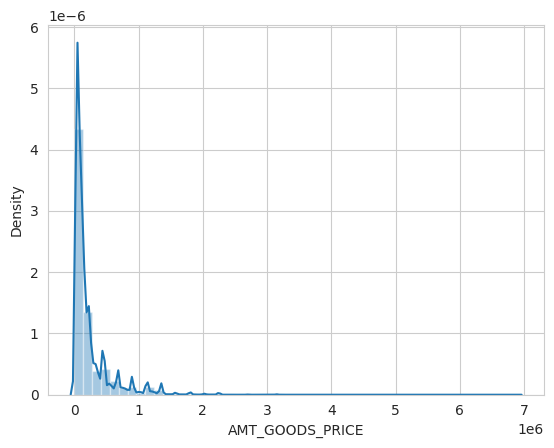

In [146]:
sns.set_style('whitegrid')
sns.distplot(previous_application['AMT_GOODS_PRICE'])
plt.show()


### Suggestion
We can Fill NA with 112320 i.e. Median for this field

In [147]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 820405


In [148]:
previous_application['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: count, dtype: int64

### Suggestion
We can Fill NA with Unaccompanied  i.e. Mode for this field

In [149]:
print("CNT_PAYMENT NULL COUNT:" ,previous_application['CNT_PAYMENT'].isnull().sum())

CNT_PAYMENT NULL COUNT: 372230


In [150]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

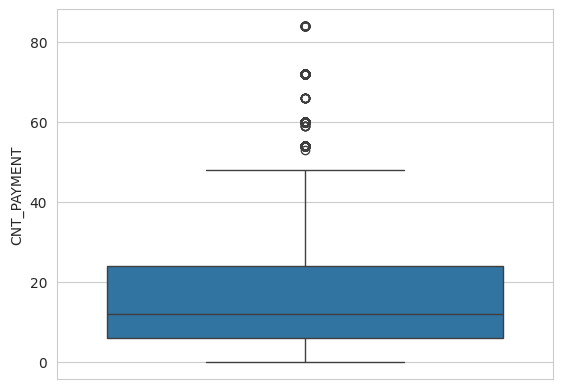

In [151]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['CNT_PAYMENT'])
plt.show()

### Suggestion
We can Fill NA with 12 i.e. Median for this field

In [152]:
print("DAYS_FIRST_DRAWING :" ,previous_application['CNT_PAYMENT'].isnull().sum())

DAYS_FIRST_DRAWING : 372230


In [153]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

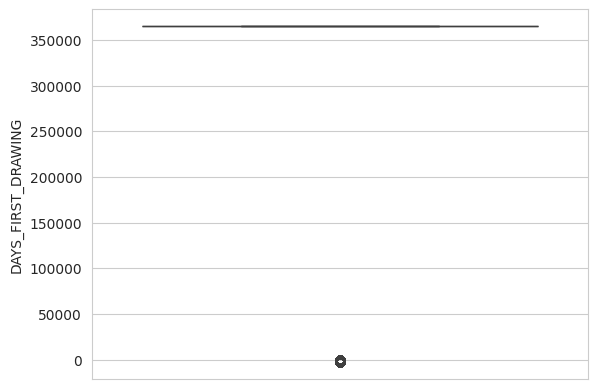

In [154]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['DAYS_FIRST_DRAWING'])
plt.show()

### Suggestion
We can Fill NA with 365243 i.e. Median for this field

In [155]:
print("DAYS_FIRST_DUE :" ,previous_application['DAYS_FIRST_DUE'].isnull().sum())

DAYS_FIRST_DUE : 673065


In [156]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

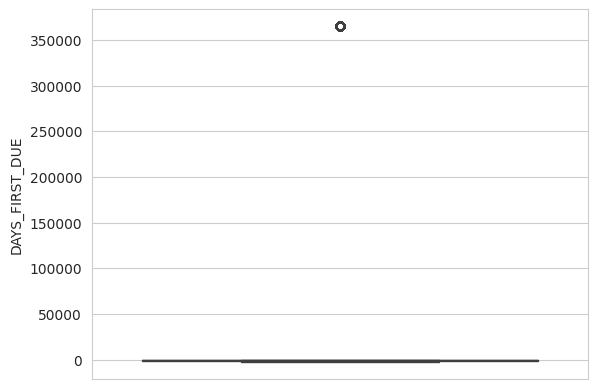

In [157]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['DAYS_FIRST_DUE'])
plt.show()

### Suggestion
We can Fill NA with -831 i.e. Median for this field

In [158]:
print("DAYS_LAST_DUE_1ST_VERSION :" ,previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

DAYS_LAST_DUE_1ST_VERSION : 673065


In [159]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

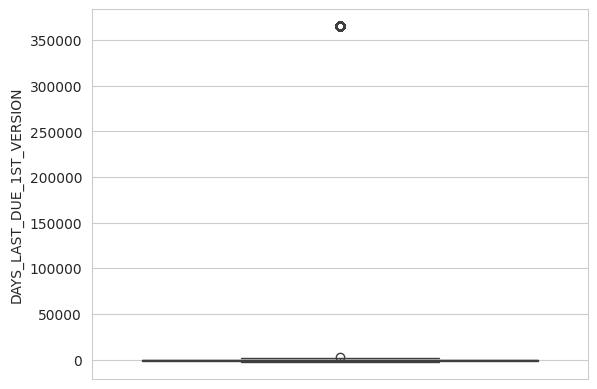

In [160]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['DAYS_LAST_DUE_1ST_VERSION'])
plt.show()

### Suggestion
We can Fill NA with -361 i.e. Median for this field

In [161]:
print("DAYS_LAST_DUE:" ,previous_application['DAYS_LAST_DUE'].isnull().sum())

DAYS_LAST_DUE: 673065


In [162]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

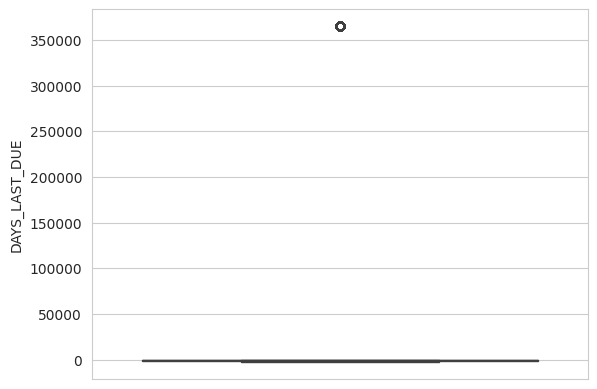

In [163]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['DAYS_LAST_DUE'])
plt.show()

### Suggestion
We can Fill NA with -537 i.e. Median for this field

In [164]:
print("DAYS_TERMINATION :" ,previous_application['DAYS_TERMINATION'].isnull().sum())

DAYS_TERMINATION : 673065


In [165]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

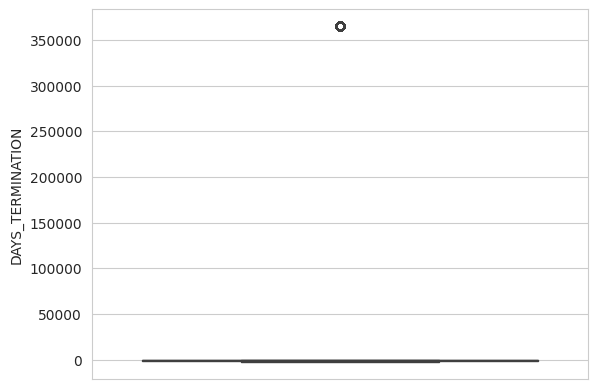

In [166]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['DAYS_TERMINATION'])
plt.show()

### Suggestion
We can Fill NA with -499 i.e. Median for this field

In [167]:
print("NFLAG_INSURED_ON_APPROVAL:" ,previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

NFLAG_INSURED_ON_APPROVAL: 673065


In [168]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

NFLAG_INSURED_ON_APPROVAL
0.0    665527
1.0    331622
Name: count, dtype: int64

### Suggestion
We can Fill NA with 0 i.e. Mode for this field

In [169]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
DAYS_FIRST_DRAWING             673065
DAYS_FIRST_DUE                 673065
DAYS_LAST_DUE_1ST_VERSION      673065
DAYS_LAST_DUE                  673065
DAYS_TERMINATION               673065
NFLAG_INSURED_ON_APPROVAL      673065
dtype: int64

In [170]:
print("AMT_CREDIT :" ,previous_application['AMT_CREDIT'].isnull().sum())

AMT_CREDIT : 1


In [171]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

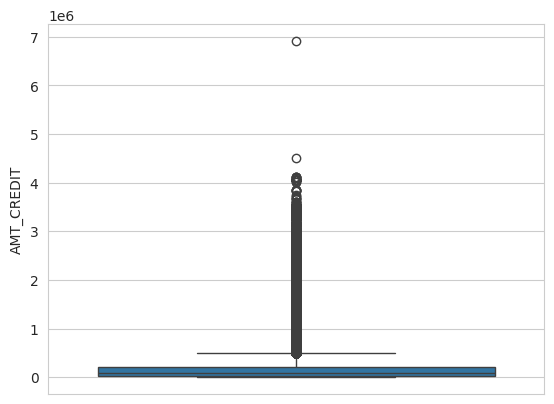

In [172]:
sns.set_style('whitegrid')
sns.boxplot(previous_application['AMT_CREDIT'])
plt.show()


### Suggestion
We can Fill NA with 80541 i.e. Median for this field

In [173]:
print("PRODUCT_COMBINATION :" ,previous_application['PRODUCT_COMBINATION'].isnull().sum())

PRODUCT_COMBINATION : 346


In [174]:
previous_application['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

### Suggestion
We can Fill NA with Cash i.e. Mode for this field

In [175]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Separating numerical and categorical columns from previous_application

In [176]:
# obj_dtypes = [i for i in previous_application.select_dtypes(include=np.object).columns if i not in ["type"] ]
# num_dtypes = [i for i in previous_application.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

# For object (string) columns
obj_dtypes = [i for i in previous_application.select_dtypes(include=[object]).columns if i not in ["type"]]

# For numeric columns
num_dtypes = [i for i in previous_application.select_dtypes(include=[np.number]).columns if i not in ['SK_ID_CURR', 'TARGET']]

In [177]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)):
    print(obj_dtypes[x])


Categorical Columns 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [178]:
print(color.BOLD + color.PURPLE + 'Numerical' + color.END, "\n")
for x in range(len(obj_dtypes)):
    print(obj_dtypes[x])

Numerical 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION



## Percentage of Missing values in application_data

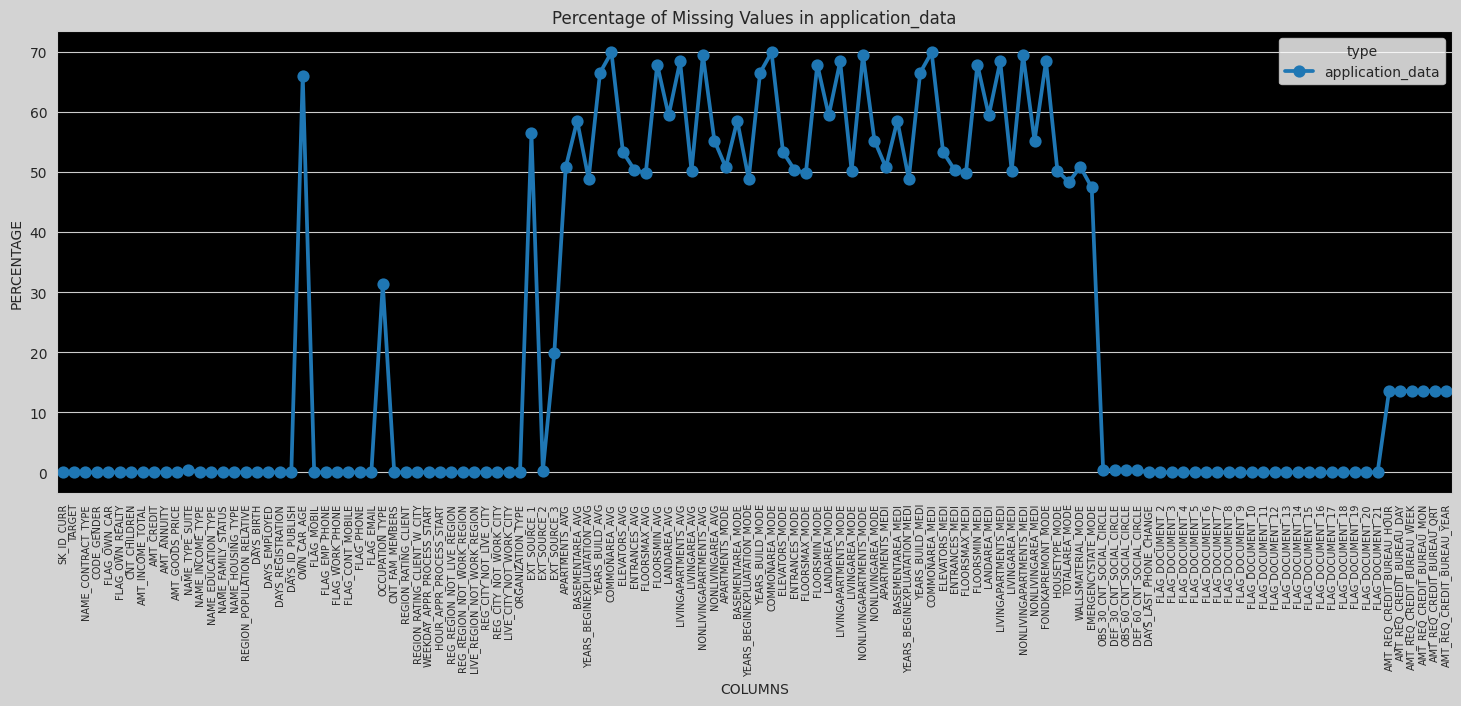

In [179]:
# fig = plt.figure(figsize=(18,6))
# miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
# miss_application_data["type"] = "application_data"
# ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
# plt.xticks(rotation =90,fontsize =7)
# plt.title("Percentage of Missing values in application_data")
# plt.ylabel("PERCENTAGE")
# plt.xlabel("COLUMNS")
# ax.set_facecolor("k")
# fig.set_facecolor("lightgrey")

# Create a figure with a specific size
fig = plt.figure(figsize=(18, 6))

# Calculate the percentage of missing values for each column in the DataFrame
miss_application_data = pd.DataFrame((application_data.isnull().sum()) * 100 / application_data.shape[0]).reset_index()
miss_application_data.columns = ["index", "missing_percentage"]  # Rename columns for clarity
miss_application_data["type"] = "application_data"  # Add a column to identify the dataset

# Create a point plot using Seaborn
ax = sns.pointplot(x="index", y="missing_percentage", data=miss_application_data, hue="type")

# Customize the plot
plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
plt.title("Percentage of Missing Values in application_data")  # Add a title
plt.ylabel("PERCENTAGE")  # Label the y-axis
plt.xlabel("COLUMNS")  # Label the x-axis
ax.set_facecolor("k")  # Set the background color of the plot to black
fig.set_facecolor("lightgrey")  # Set the background color of the figure to light grey

# Display the plot
plt.show()

In [180]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL                       0.00
OCCUPATION_TYPE                 31.35
CNT_FAM_MEMBERS                  0.00
REGION_RATING_CLIENT             0.00
REGION_RATING_CLIENT_W_CITY      0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_MODE                 50.19
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BUILD_MEDI                66.50
COMMONAREA_MEDI                 69.87
ELEVATORS_MEDI                  53.30
ENTRANCES_MEDI                  50.35
FLOORSMAX_MEDI                  49.76
FLOORSMIN_MEDI                  67.85
LANDAREA_MEDI                   59.38
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAREA_MEDI                 50.19
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAREA_MEDI              55.18
FONDKAPREMONT_MODE              68.39
HOUSETYPE_MODE                  50.18
TOTALAREA_MODE                  48.27
WALLSMATERIAL_MODE              50.84
EMERGENCYSTATE_MODE             47.40
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMENT_3                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUM

### Removing columns with missing values more than 40%

As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [181]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

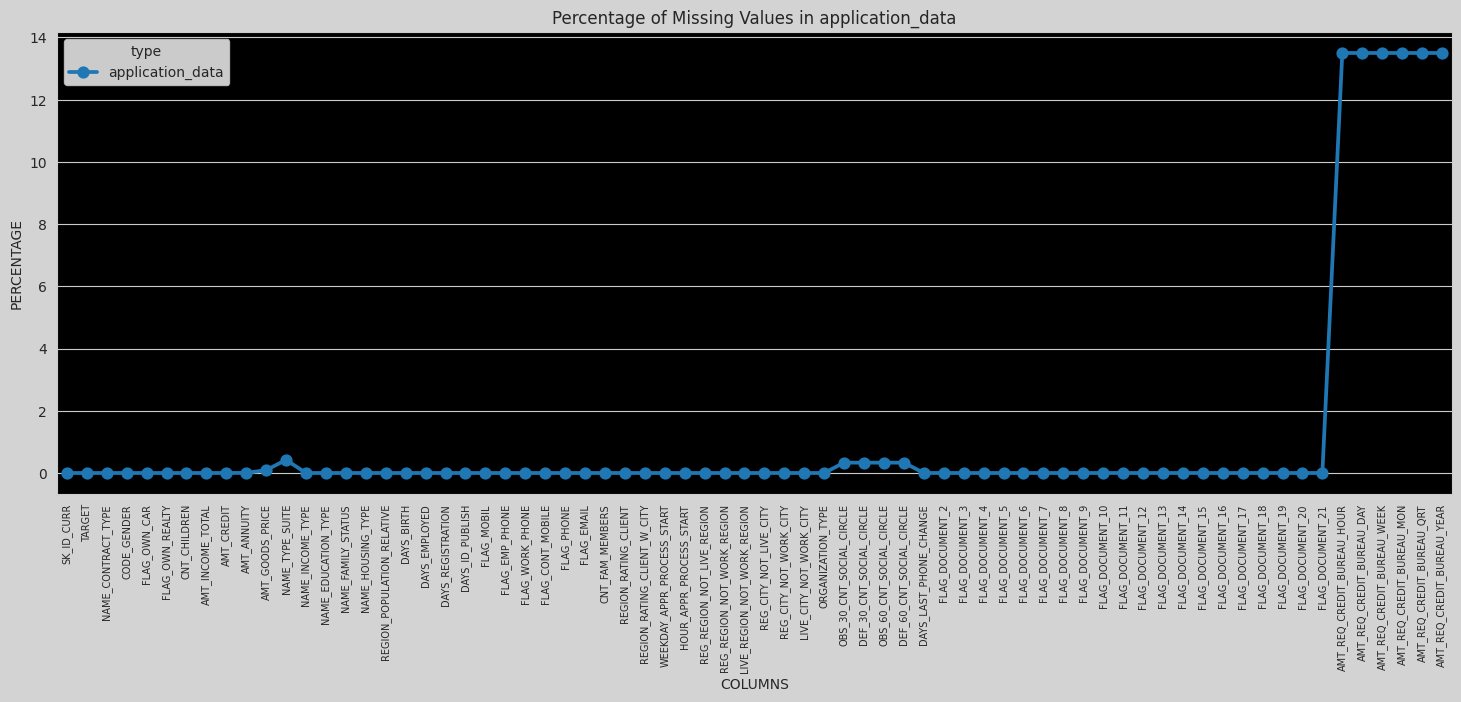

In [182]:
# fig = plt.figure(figsize=(18,6))
# miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
# miss_application_data["type"] = "application_data"
# ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
# plt.xticks(rotation =90,fontsize =7)
# plt.title("Percentage of Missing values in application_data")
# plt.ylabel("PERCENTAGE")
# plt.xlabel("COLUMNS")
# ax.set_facecolor("k")
# fig.set_facecolor("lightgrey")

# Create a figure with a specific size
fig = plt.figure(figsize=(18, 6))

# Calculate the percentage of missing values for each column in the DataFrame
miss_application_data = pd.DataFrame((application_data.isnull().sum()) * 100 / application_data.shape[0]).reset_index()
miss_application_data.columns = ["index", "missing_percentage"]  # Rename columns for clarity
miss_application_data["type"] = "application_data"  # Add a column to identify the dataset

# Create a point plot using Seaborn
ax = sns.pointplot(x="index", y="missing_percentage", data=miss_application_data, hue="type")

# Customize the plot
plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
plt.title("Percentage of Missing Values in application_data")  # Add a title
plt.ylabel("PERCENTAGE")  # Label the y-axis
plt.xlabel("COLUMNS")  # Label the x-axis
ax.set_facecolor("k")  # Set the background color of the plot to black
fig.set_facecolor("lightgrey")  # Set the background color of the figure to light grey

# Display the plot
plt.show()

In [183]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_13                0.00
FLAG_DOCUMENT_14                0.00
FLAG_DOCUMENT_15                0.00
FLAG_DOCUMENT_16                0.00
FLAG_DOCUMENT_17                0.00
FLAG_DOCUMENT_18                0.00
FLAG_DOCUMENT_19                0.00
FLAG_DOCUMENT_20                0.00
FLAG_DOCUMENT_21                0.00
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
dtype: float64

### MISSING values Suggestion

In [184]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [185]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [186]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 41519


In [187]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [188]:
print("AMT_REQ_CREDIT_BUREAU_MON NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_MON NAN COUNT : 41519


In [189]:
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [190]:
print("AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_QRT NAN COUNT : 41519


### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [191]:
print("AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_WEEK NAN COUNT : 41519


In [192]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [193]:
print("AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_YEAR NAN COUNT : 41519


In [194]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [195]:
print("DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


In [196]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [197]:
print("DEF_30_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE : 1021


In [198]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [199]:
print("OBS_60_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_60_CNT_SOCIAL_CIRCLE : 1021


In [200]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [201]:
print("DEF_60_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_60_CNT_SOCIAL_CIRCLE : 1021


In [202]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

### Suggestion
We can Fill NA with 0 i.e. Median for this field

In [203]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_21                   0
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
dtype: int64

In [204]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY  : 12


In [205]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

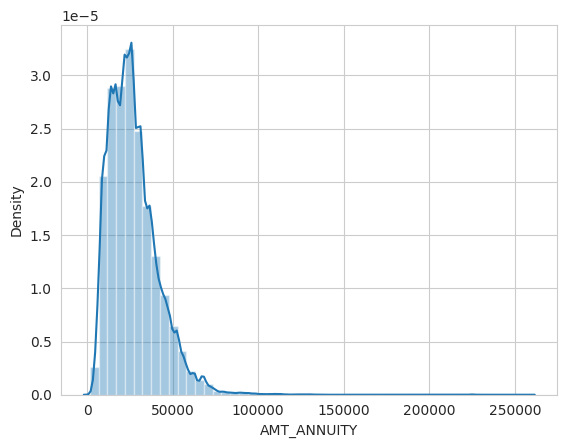

In [206]:
sns.set_style('whitegrid')
sns.distplot(application_data['AMT_ANNUITY'])
plt.show()

### Suggestion
We can Fill NA with 0 i.e. Mean for this field as it's right skewed graph

In [207]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE   : 278


In [208]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

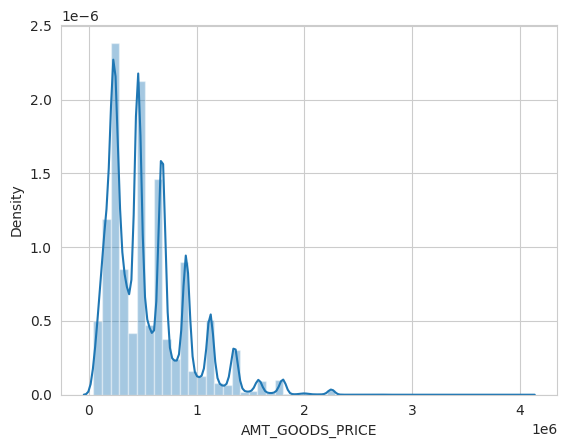

In [209]:
sns.set_style('whitegrid')
sns.distplot(application_data['AMT_GOODS_PRICE'])
plt.show()

### Suggestion
We can Fill NA with 0 i.e. Mean for this field as it's right skewed graph

In [210]:
print("NAME_TYPE_SUITE :" ,application_data['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE : 1292


In [211]:
application_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

### Suggestion
We can Fill NA with "Unaccompanied" i.e. Mode for this field

In [212]:
print("CNT_FAM_MEMBERS :" ,application_data['CNT_FAM_MEMBERS'].isnull().sum())

CNT_FAM_MEMBERS : 2


In [213]:
application_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

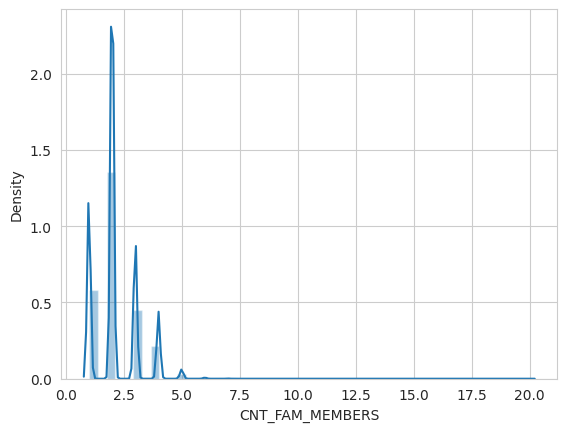

In [214]:
sns.set_style('whitegrid')
sns.distplot(application_data['CNT_FAM_MEMBERS'])
plt.show()

### Suggestion
We can Fill NA with 2 i.e. Median for this field, Mean is not be used as this field needs to be Whole number

In [215]:
print("DAYS_LAST_PHONE_CHANGE :" ,application_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum())

DAYS_LAST_PHONE_CHANGE : 1


In [216]:
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [217]:
import statistics
statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])

0.0

### Suggestion
We can Fill NA with 0 i.e. Mode for this field

## Print the information about the attributes of application_data

In [218]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Converting negative values to absolute values


In [219]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])



In [220]:
display("application_data")
display(application_data.head())

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

### Separating numerical and categorical  in application_data


In [221]:
# obj_dtypes = [i for i in application_data.select_dtypes(include=np.object).columns if i not in ["type"] ]
# num_dtypes = [i for i in application_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

# For object (string) columns
obj_dtypes = [i for i in application_data.select_dtypes(include=[object]).columns if i not in ["type"]]

# For numeric columns
num_dtypes = [i for i in application_data.select_dtypes(include=[np.number]).columns if i not in ['SK_ID_CURR', 'TARGET']]

In [222]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)):
    print(obj_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [223]:
print(color.BOLD + color.PURPLE +"Numerical Columns" + color.END, "\n")
for x in range(len(num_dtypes)):
    print(num_dtypes[x])

Numerical Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU


## Imbalance percentage

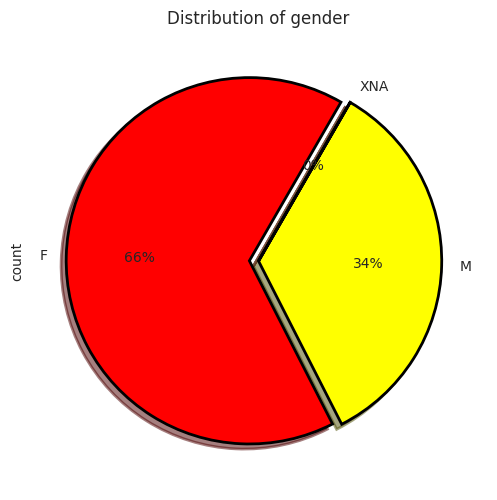

In [224]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

### Point to infer from the graph
It's non balanced data


## Distribution of Target variable

TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)


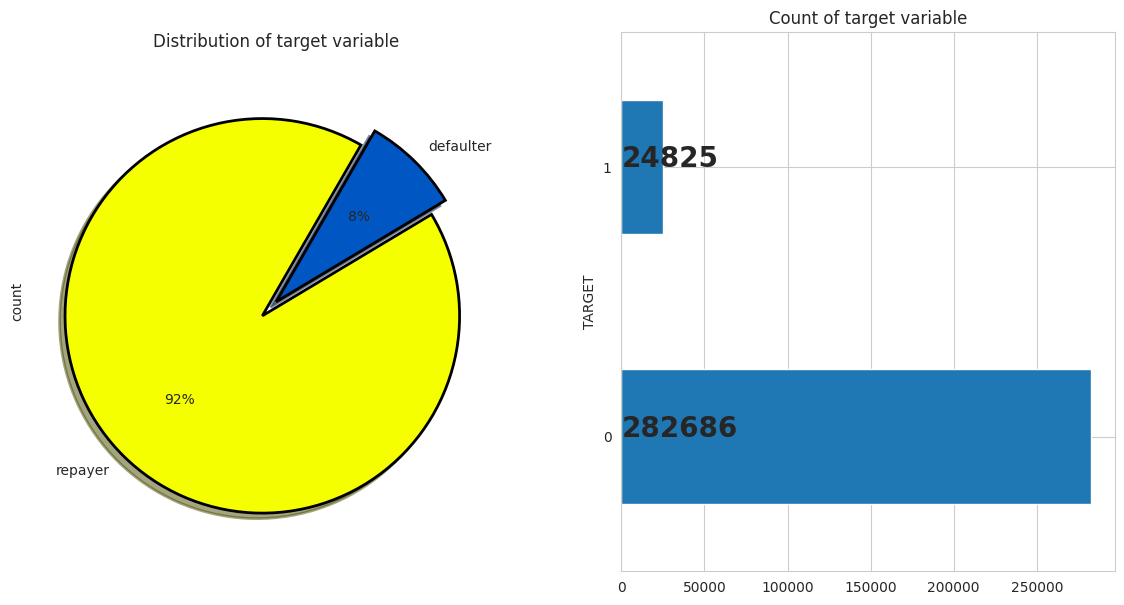

In [225]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

### Point to infer from the graph
8% out of total client population have difficulties in repaying loans.

### Concatenating application_data and previous_application

In [226]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0)

## Distribution in Contract types in application_data

NAME_CONTRACT_TYPE : Identification if loan is cash , consumer or revolving


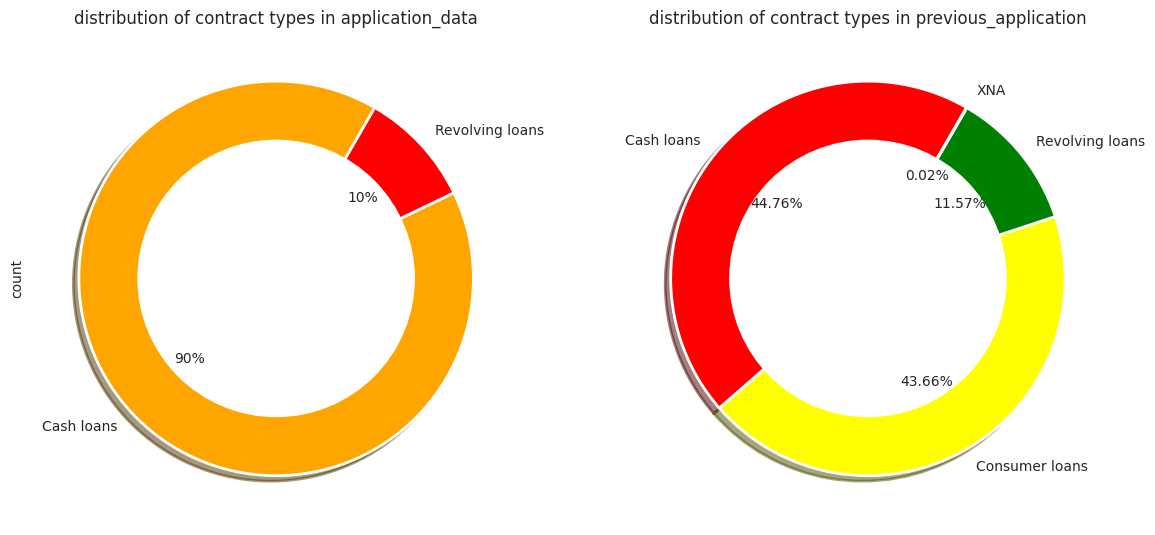

In [227]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
data[data["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()

### Point to infer from the graph

The percentage of revolving loans and cash loans are 10% & 90%.

## Gender Distribution in application_data

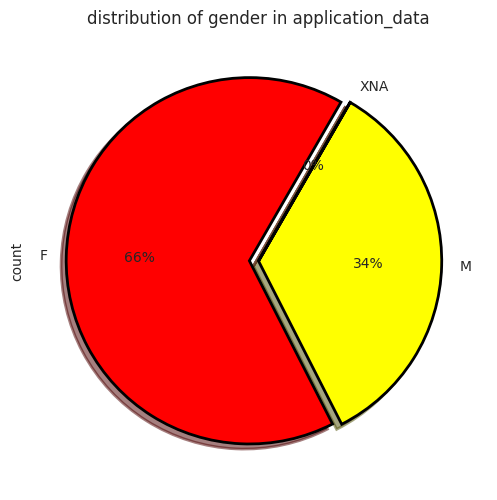

In [228]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data[data["type"] == "application_data"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of gender in application_data")
plt.show()

### Point to infer from the graph

Female : 66%

Male : 34%

## Distribution of Contract type by gender

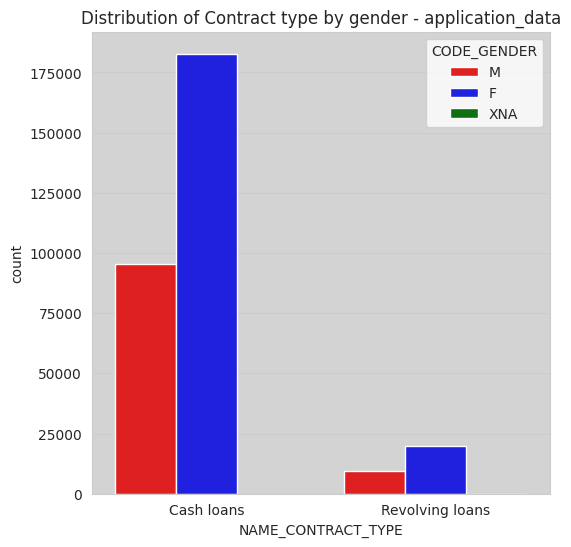

In [229]:
# fig  = plt.figure(figsize=(13,6))
# plt.subplot(121)
# ax = sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=data[data["type"] == "application_data"],palette=["r","b","g"])
# ax.set_facecolor("lightgrey")
# ax.set_title("Distribution of Contract type by gender -application_data")


# plt.show()

# Create a figure with a specific size
fig = plt.figure(figsize=(13, 6))

# Create the first subplot
plt.subplot(121)
ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="CODE_GENDER", data=data[data["type"] == "application_data"], palette=["r", "b", "g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender - application_data")

# Display the plot
plt.show()

### Point to infer from the graph

Cash loans is always prefered over Revolving loans by both genders

## Distribution of client owning a car and by gender

FLAG_OWN_CAR Flag if the client owns a car .

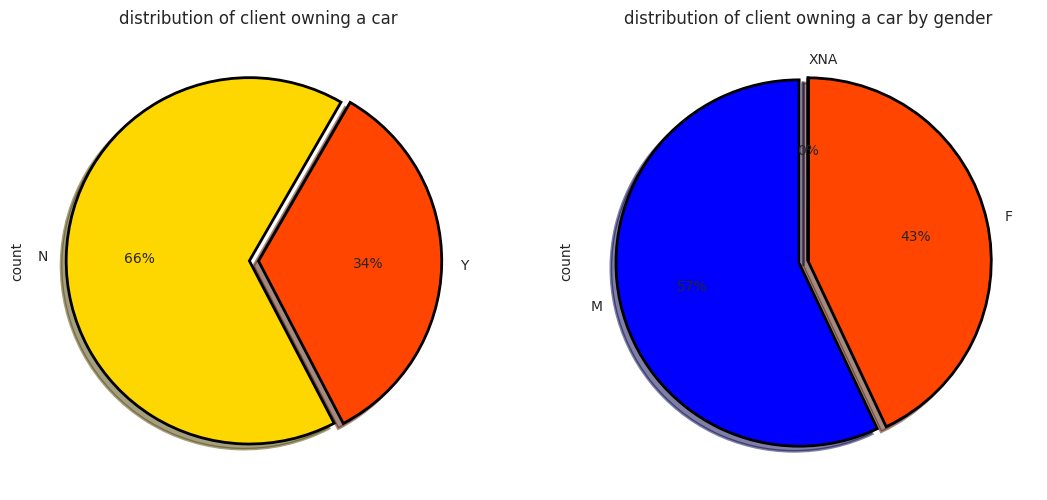

In [230]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

### Point to infer from the graph

SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.

## Distribution of client owning a house or flat and by gender

FLAG_OWN_REALTY - Flag if client owns a house or flat

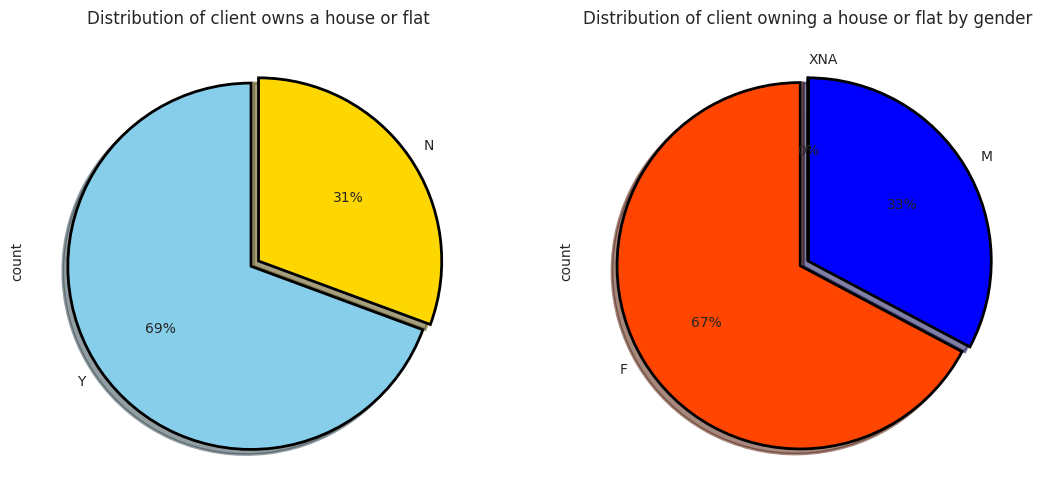

In [231]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

### Point to infer from the graph

SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .

SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

## Distribution of Number of children and family members of client by repayment status.

CNT_CHILDREN - Number of children the client has.

CNT_FAM_MEMBERS - How many family members does client have.

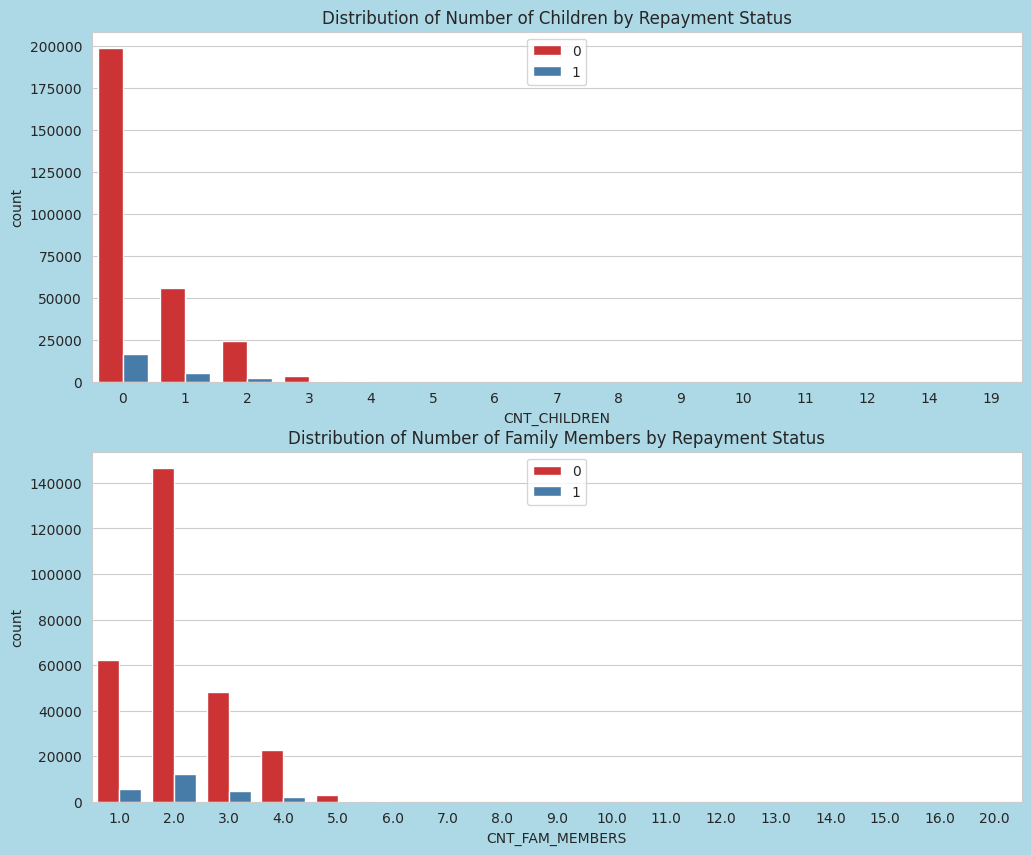

In [232]:
# fig = plt.figure(figsize=(12,10))
# plt.subplot(211)
# sns.countplot(application_data["CNT_CHILDREN"],palette="Set1",hue=application_data["TARGET"])
# plt.legend(loc="upper center")
# plt.title(" Distribution of Number of children client has  by repayment status")
# plt.subplot(212)
# sns.countplot(application_data["CNT_FAM_MEMBERS"],palette="Set1",hue=application_data["TARGET"])
# plt.legend(loc="upper center")
# plt.title(" Distribution of Number of family members client has  by repayment status")
# fig.set_facecolor("lightblue")

# Create a figure with a specific size
fig = plt.figure(figsize=(12, 10))

# First subplot: Distribution of number of children by repayment status
plt.subplot(211)
sns.countplot(x="CNT_CHILDREN", hue="TARGET", data=application_data, palette="Set1")
plt.legend(loc="upper center")
plt.title("Distribution of Number of Children by Repayment Status")

# Second subplot: Distribution of number of family members by repayment status
plt.subplot(212)
sns.countplot(x="CNT_FAM_MEMBERS", hue="TARGET", data=application_data, palette="Set1")
plt.legend(loc="upper center")
plt.title("Distribution of Number of Family Members by Repayment Status")

# Set the figure background color
fig.set_facecolor("lightblue")

# Display the plot
plt.show()


## Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

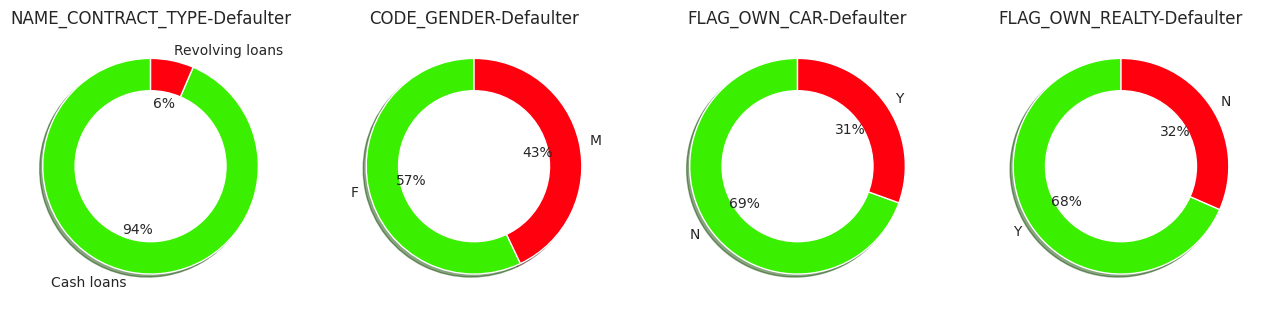

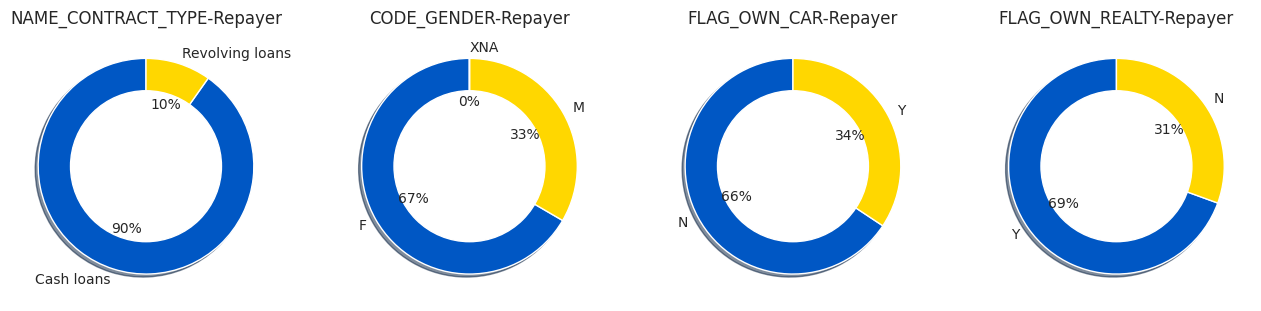

In [233]:
default = application_data[application_data["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_data[application_data["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

### Point to infer from the graph

Percentage of males is 10% more in defaults than non defaulters.

Percentage of Cash Loans is 4% more in defaults than Revolving Loans.

### Distribution of amount data

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

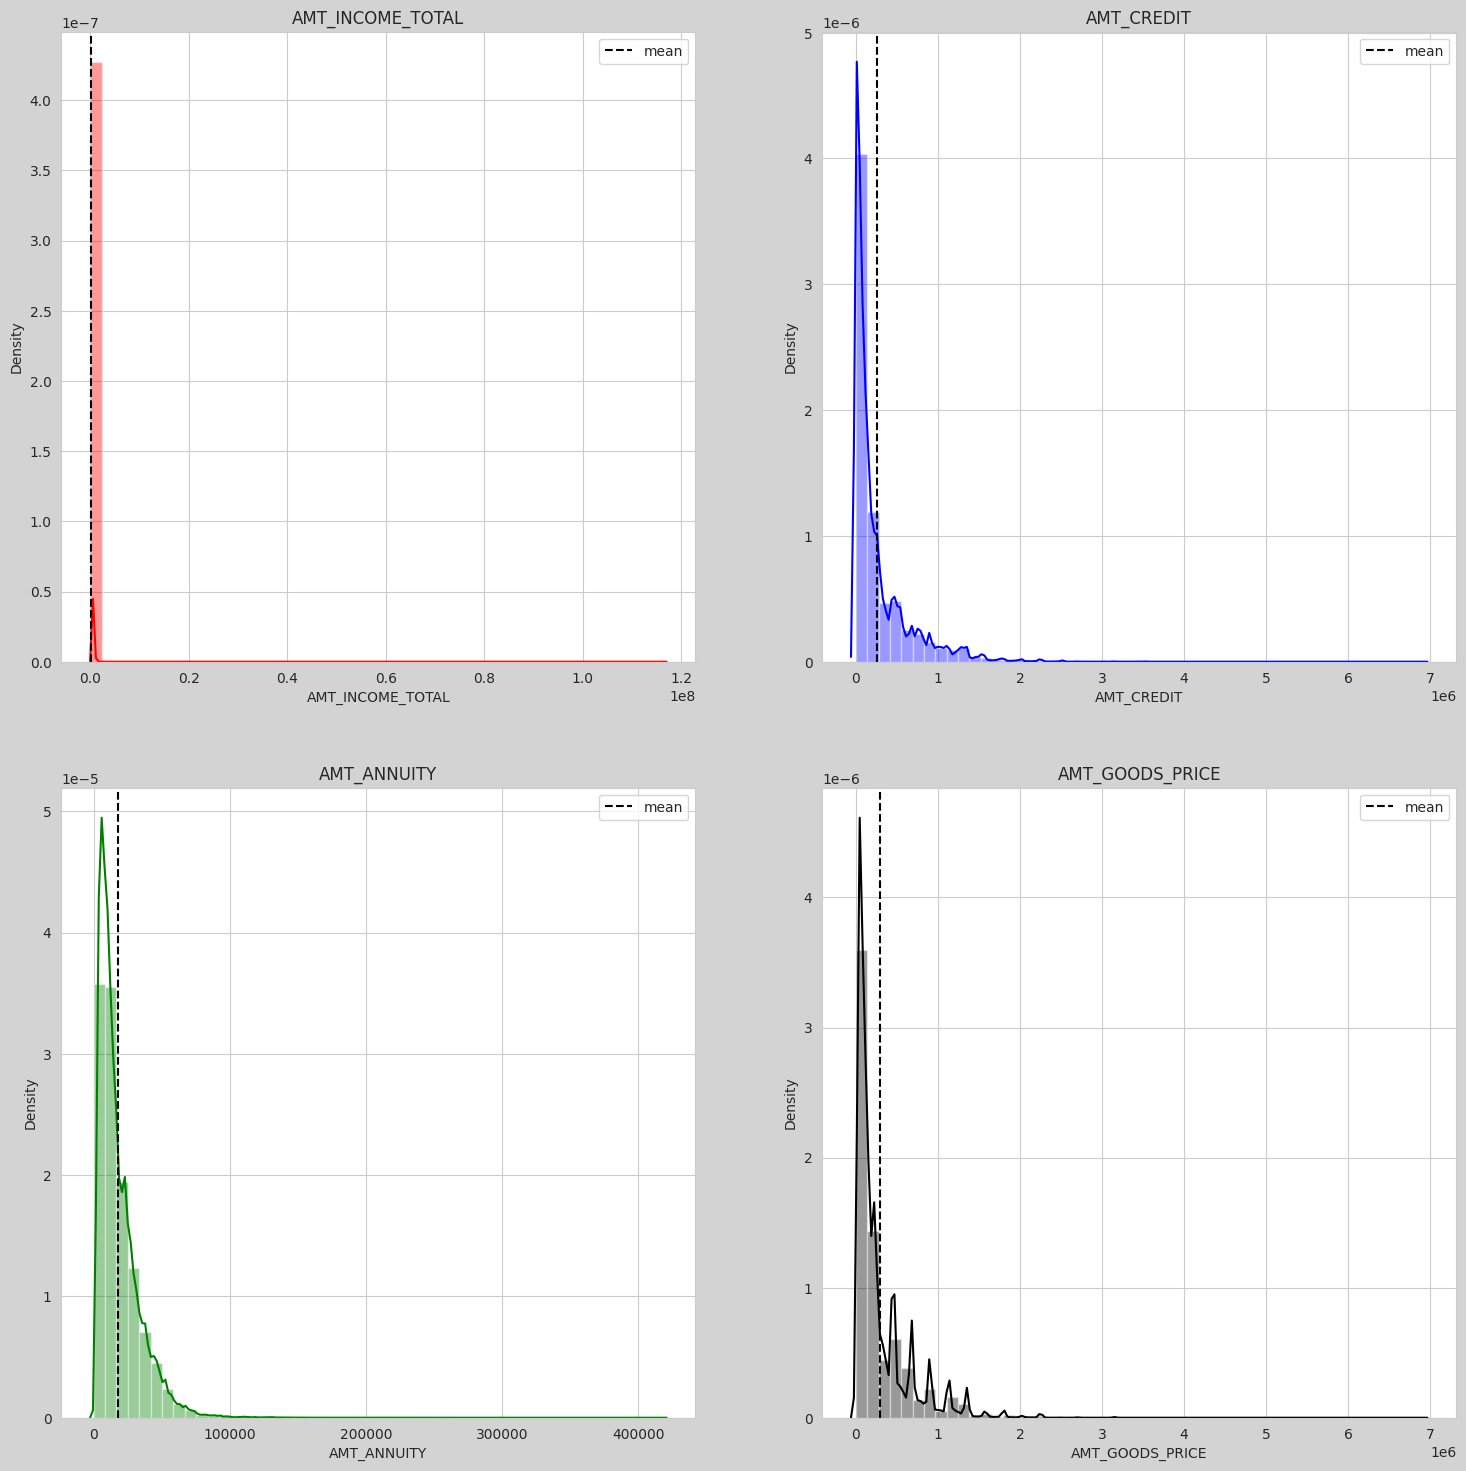

In [234]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(data[data[i].notnull()][i],color=k)
    plt.axvline(data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)


## Comparing summary statistics between defaulters and non - defaulters for loan amounts.



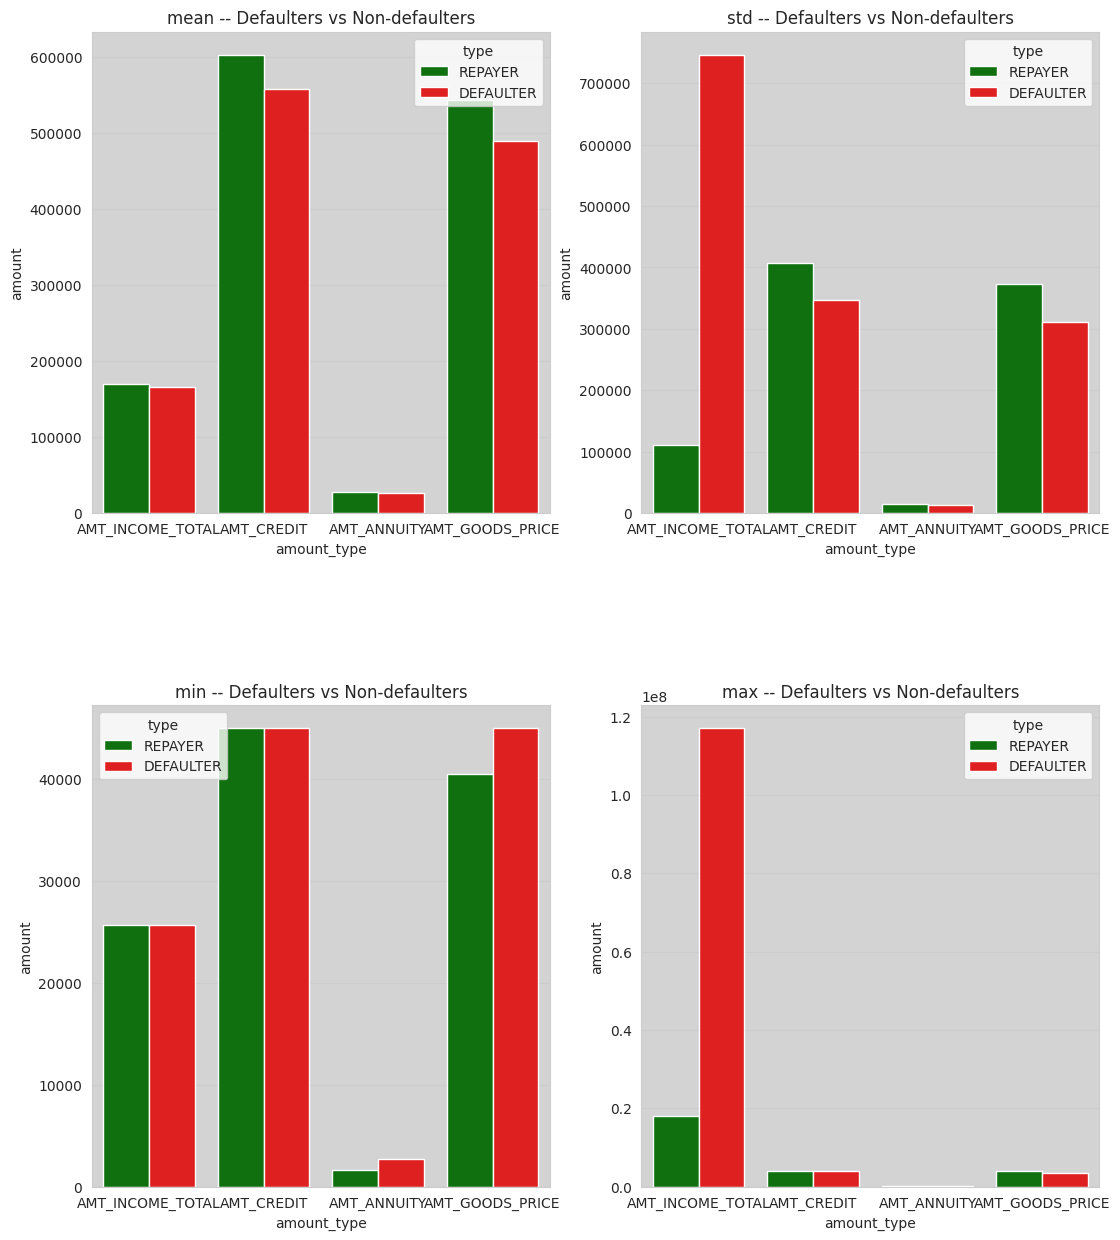

In [235]:
# df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
# df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])]
# df_x = df[["level_0","level_1",0]]
# df_y = df[["level_0","level_1",1]]
# df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
# df_x["type"] = "REPAYER"
# df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
# df_y["type"] = "DEFAULTER"
# df_new = pd.concat([df_x,df_y],axis = 0)

# stat = df_new["statistic"].unique().tolist()
# length = len(stat)

# plt.figure(figsize=(13,15))

# for i,j in itertools.zip_longest(stat,range(length)):
#     plt.subplot(2,2,j+1)
#     fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
#                 hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
#     plt.title(i + "--Defaulters vs Non defaulters")
#     plt.subplots_adjust(hspace = .4)
#     fig.set_facecolor("lightgrey")

import itertools

# Group and preprocess the data
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin(['mean', 'std', 'min', 'max'])]
df_x = df[["level_0", "level_1", 0]]
df_y = df[["level_0", "level_1", 1]]
df_x = df_x.rename(columns={'level_0': "amount_type", 'level_1': "statistic", 0: "amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0': "amount_type", 'level_1': "statistic", 1: "amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x, df_y], axis=0)

# Get unique statistics and their count
stat = df_new["statistic"].unique().tolist()
length = len(stat)

# Create subplots
plt.figure(figsize=(13, 15))

for i, j in itertools.zip_longest(stat, range(length)):
    plt.subplot(2, 2, j + 1)
    fig = sns.barplot(
        x="amount_type",
        y="amount",
        hue="type",
        data=df_new[df_new["statistic"] == i],
        palette=["g", "r"]
    )
    plt.title(i + " -- Defaulters vs Non-defaulters")
    plt.subplots_adjust(hspace=0.4)
    fig.set_facecolor("lightgrey")

# Display the plot
plt.show()

### Point to infer from the graph

#### Income of client -

1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings

#### Credit amount of the loan ,Loan annuity,Amount goods price -

1 . Statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

## Average Income,credit,annuity & goods_price by gender


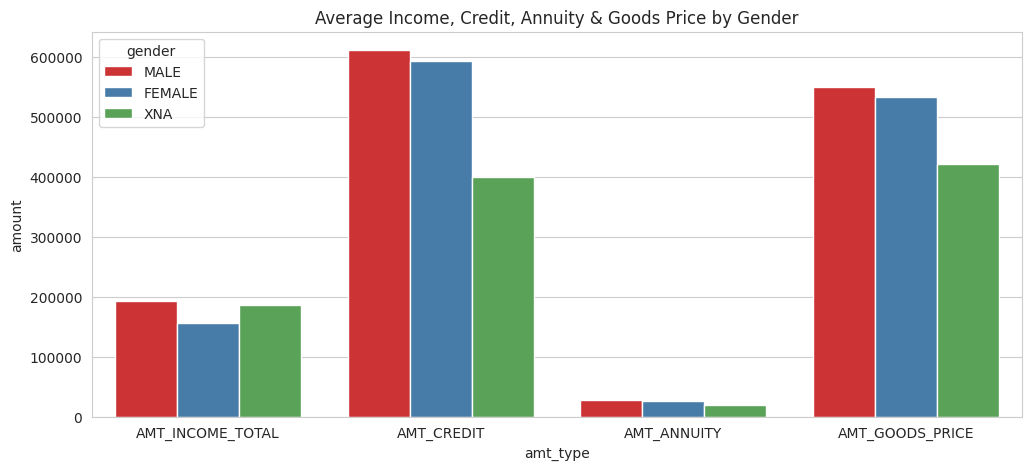

In [236]:
# cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

# df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

# df_f   = df1[["index","F"]]
# df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
# df_f["gender"] = "FEMALE"
# df_m   = df1[["index","M"]]
# df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
# df_m["gender"] = "MALE"
# df_xna = df1[["index","XNA"]]
# df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
# df_xna["gender"] = "XNA"

# df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

# plt.figure(figsize=(12,5))
# ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
# plt.title("Average Income,credit,annuity & goods_price by gender")
# plt.show()

# Define the columns to analyze
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Group the data by gender and calculate the mean for the specified columns
df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

# Prepare data for FEMALE
df_f = df1[["index", "F"]]
df_f = df_f.rename(columns={'index': "amt_type", 'F': "amount"})
df_f["gender"] = "FEMALE"

# Prepare data for MALE
df_m = df1[["index", "M"]]
df_m = df_m.rename(columns={'index': "amt_type", 'M': "amount"})
df_m["gender"] = "MALE"

# Prepare data for XNA
df_xna = df1[["index", "XNA"]]
df_xna = df_xna.rename(columns={'index': "amt_type", 'XNA': "amount"})
df_xna["gender"] = "XNA"

# Combine the data into a single DataFrame
df_gen = pd.concat([df_m, df_f, df_xna], axis=0)

# Create the bar plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="amt_type", y="amount", data=df_gen, hue="gender", palette="Set1")
plt.title("Average Income, Credit, Annuity & Goods Price by Gender")
plt.show()

## Scatter plot between credit amount and annuity amount

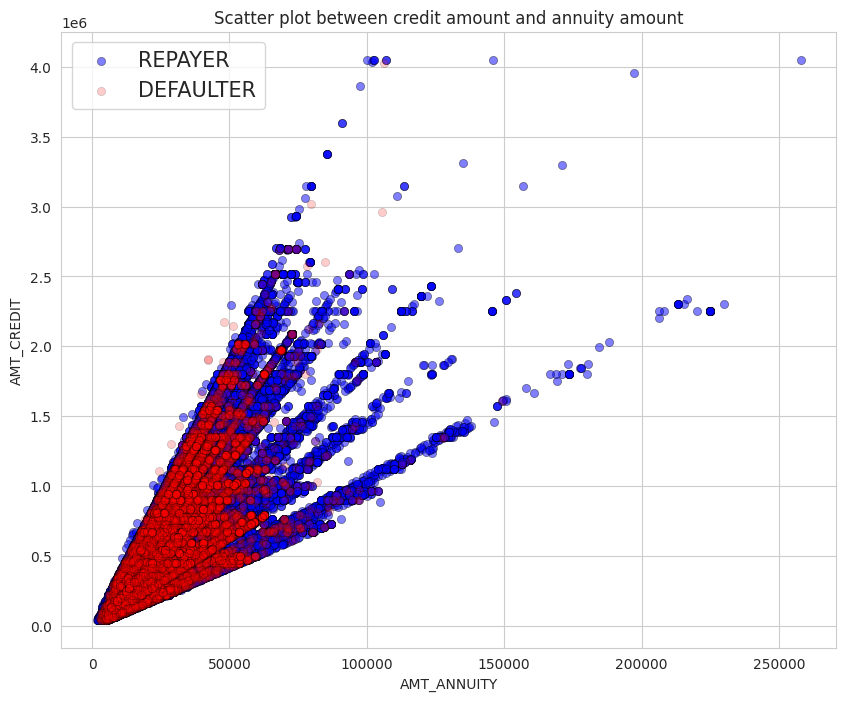

In [237]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

## Pair Plot between amount variables

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

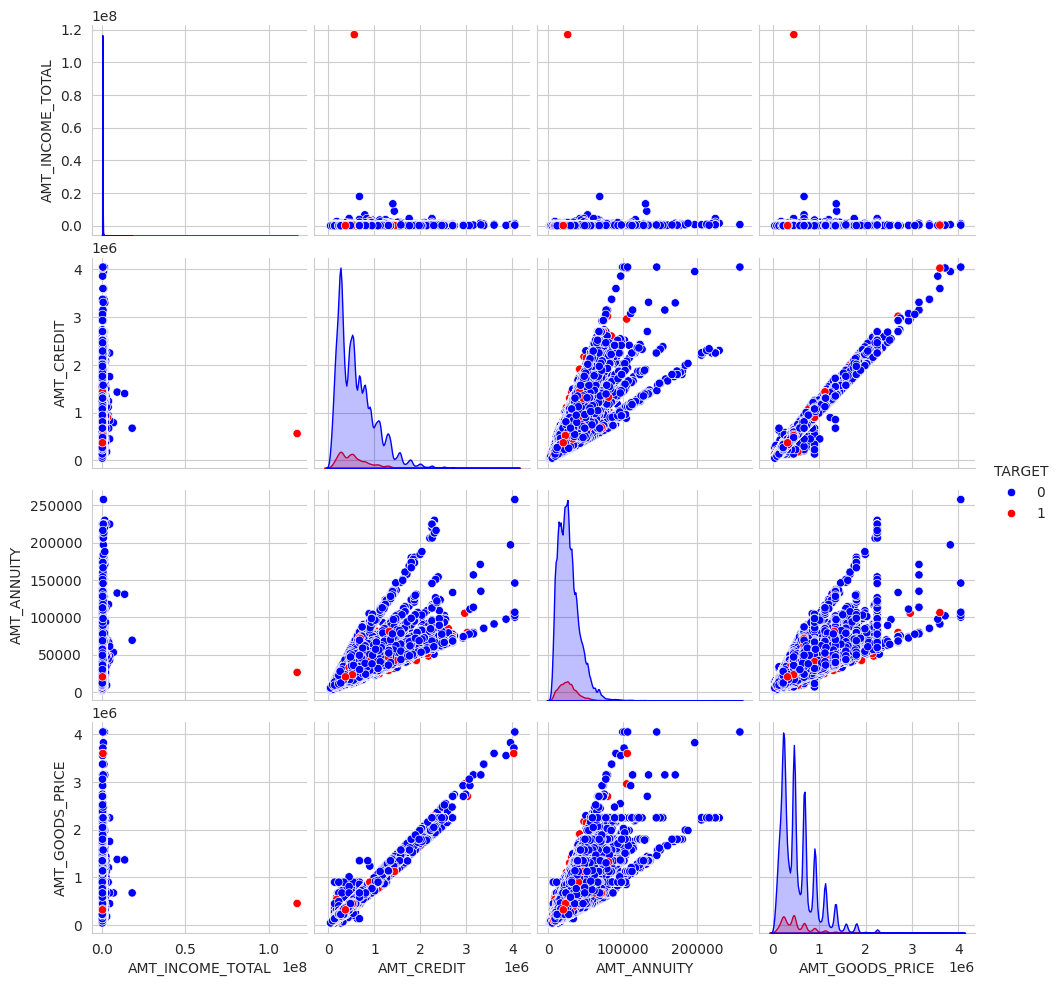

In [238]:
amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

# Distribution of Suite type

NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

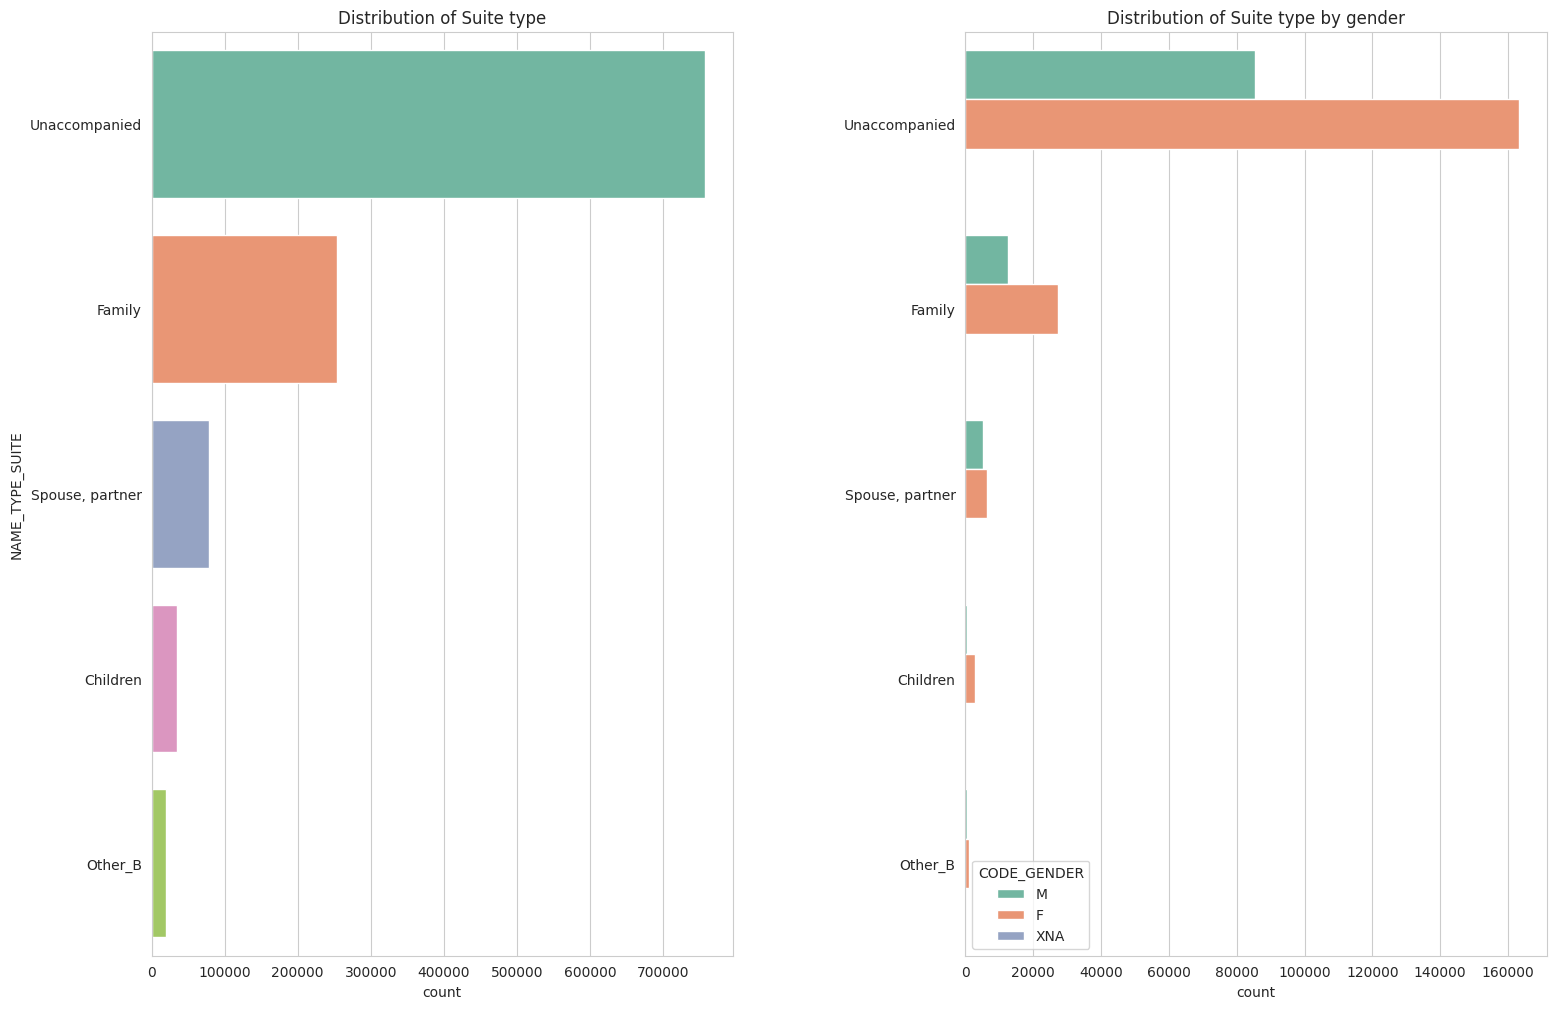

In [239]:
# plt.figure(figsize=(18,12))
# plt.subplot(121)
# sns.countplot(y=data["NAME_TYPE_SUITE"],
#               palette="Set2",
#               order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
# plt.title("Distribution of Suite type")

# plt.subplot(122)
# sns.countplot(y=data["NAME_TYPE_SUITE"],
#               hue=data["CODE_GENDER"],palette="Set2",
#               order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
# plt.ylabel("")
# plt.title("Distribution of Suite type by gender")
# plt.subplots_adjust(wspace = .4)



# Get the top 5 unique values for NAME_TYPE_SUITE based on their counts
top_5_suites = data["NAME_TYPE_SUITE"].value_counts().nlargest(5).index.tolist()

# Filter the data to include only the top 5 suites
filtered_data = data[data["NAME_TYPE_SUITE"].isin(top_5_suites)]

# Create a figure with a specific size
plt.figure(figsize=(18, 12))

# First subplot: Distribution of Suite type
plt.subplot(121)
sns.countplot(
    y=filtered_data["NAME_TYPE_SUITE"],
    palette="Set2",
    order=top_5_suites  # Use the unique top 5 values
)
plt.title("Distribution of Suite type")

# Second subplot: Distribution of Suite type by gender
plt.subplot(122)
sns.countplot(
    y=filtered_data["NAME_TYPE_SUITE"],
    hue=filtered_data["CODE_GENDER"],
    palette="Set2",
    order=top_5_suites  # Use the unique top 5 values
)
plt.ylabel("")
plt.title("Distribution of Suite type by gender")

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

### Distribution of client income type

NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,…)

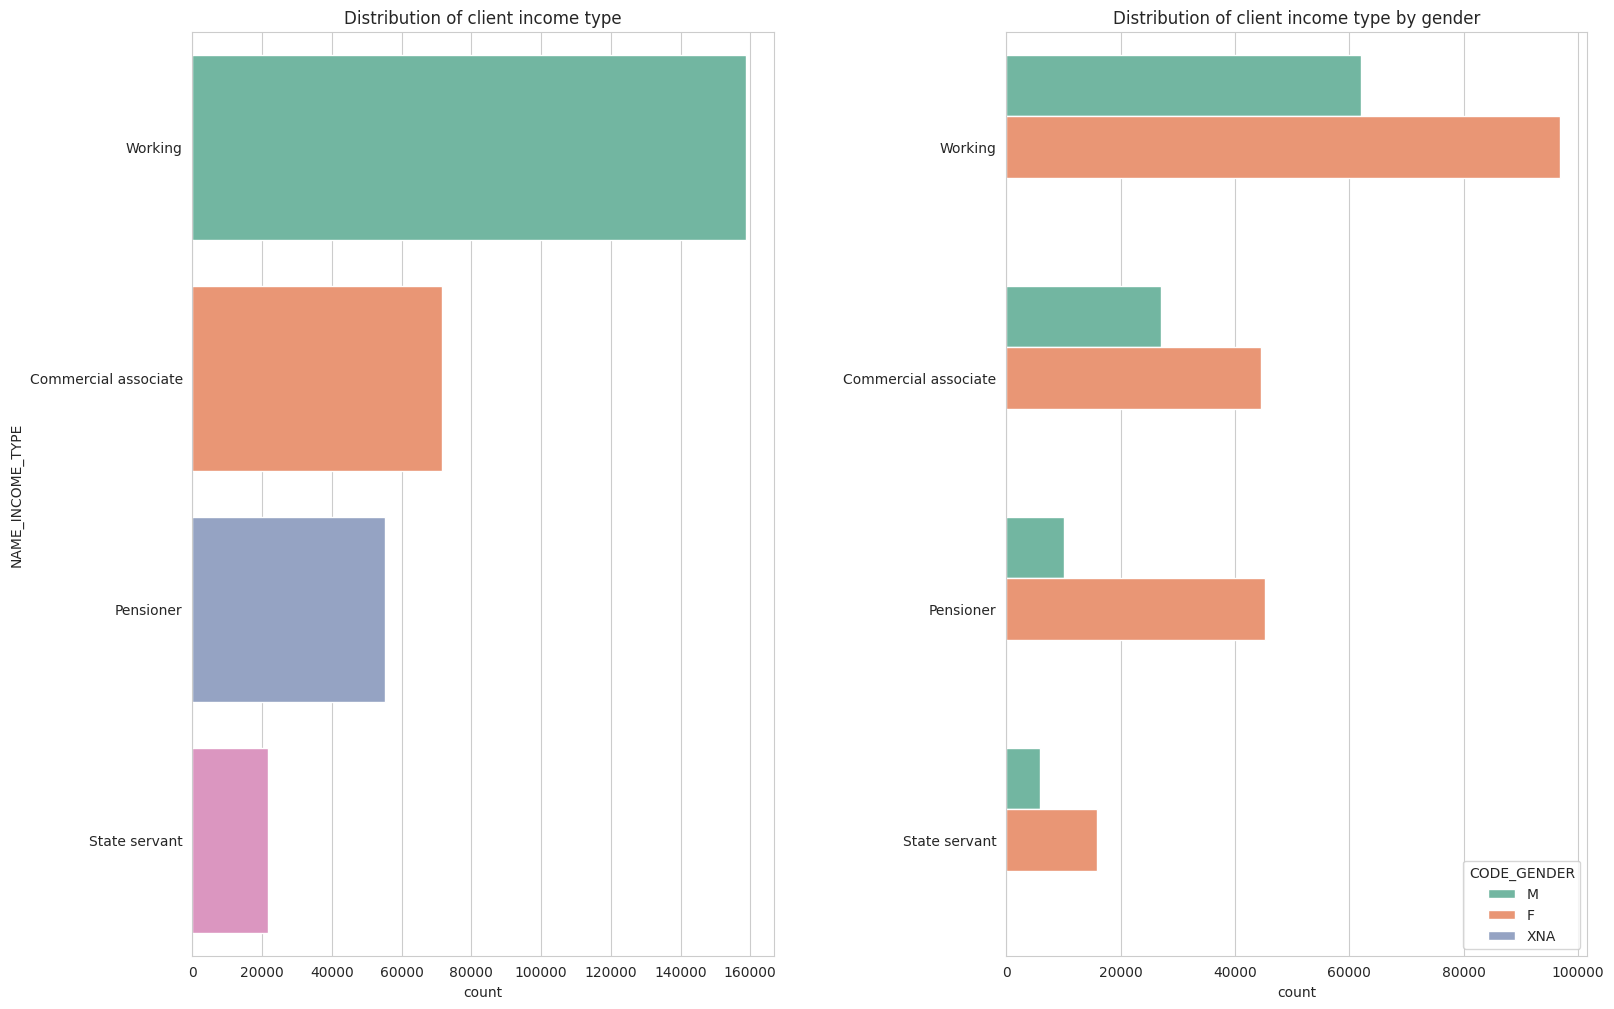

In [240]:
# plt.figure(figsize=(18,12))
# plt.subplot(121)
# sns.countplot(y=data["NAME_INCOME_TYPE"],
#               palette="Set2",
#               order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
# plt.title("Distribution of client income type")

# plt.subplot(122)
# sns.countplot(y=data["NAME_INCOME_TYPE"],
#               hue=data["CODE_GENDER"],
#               palette="Set2",
#               order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
# plt.ylabel("")
# plt.title("Distribution of client income  type by gender")
# plt.subplots_adjust(wspace = .4)


# Get the top 4 unique values for NAME_INCOME_TYPE based on their counts
top_4_income_types = data["NAME_INCOME_TYPE"].value_counts().nlargest(4).index.tolist()

# Filter the data to include only the top 4 income types
filtered_data = data[data["NAME_INCOME_TYPE"].isin(top_4_income_types)]

# Create a figure with a specific size
plt.figure(figsize=(18, 12))

# First subplot: Distribution of client income type
plt.subplot(121)
sns.countplot(
    y=filtered_data["NAME_INCOME_TYPE"],
    palette="Set2",
    order=top_4_income_types  # Use the unique top 4 values
)
plt.title("Distribution of client income type")

# Second subplot: Distribution of client income type by gender
plt.subplot(122)
sns.countplot(
    y=filtered_data["NAME_INCOME_TYPE"],
    hue=filtered_data["CODE_GENDER"],
    palette="Set2",
    order=top_4_income_types  # Use the unique top 4 values
)
plt.ylabel("")
plt.title("Distribution of client income type by gender")

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


### Distribution of Education type by loan repayment status

NAME_EDUCATION_TYPE Level of highest education the client achieved..



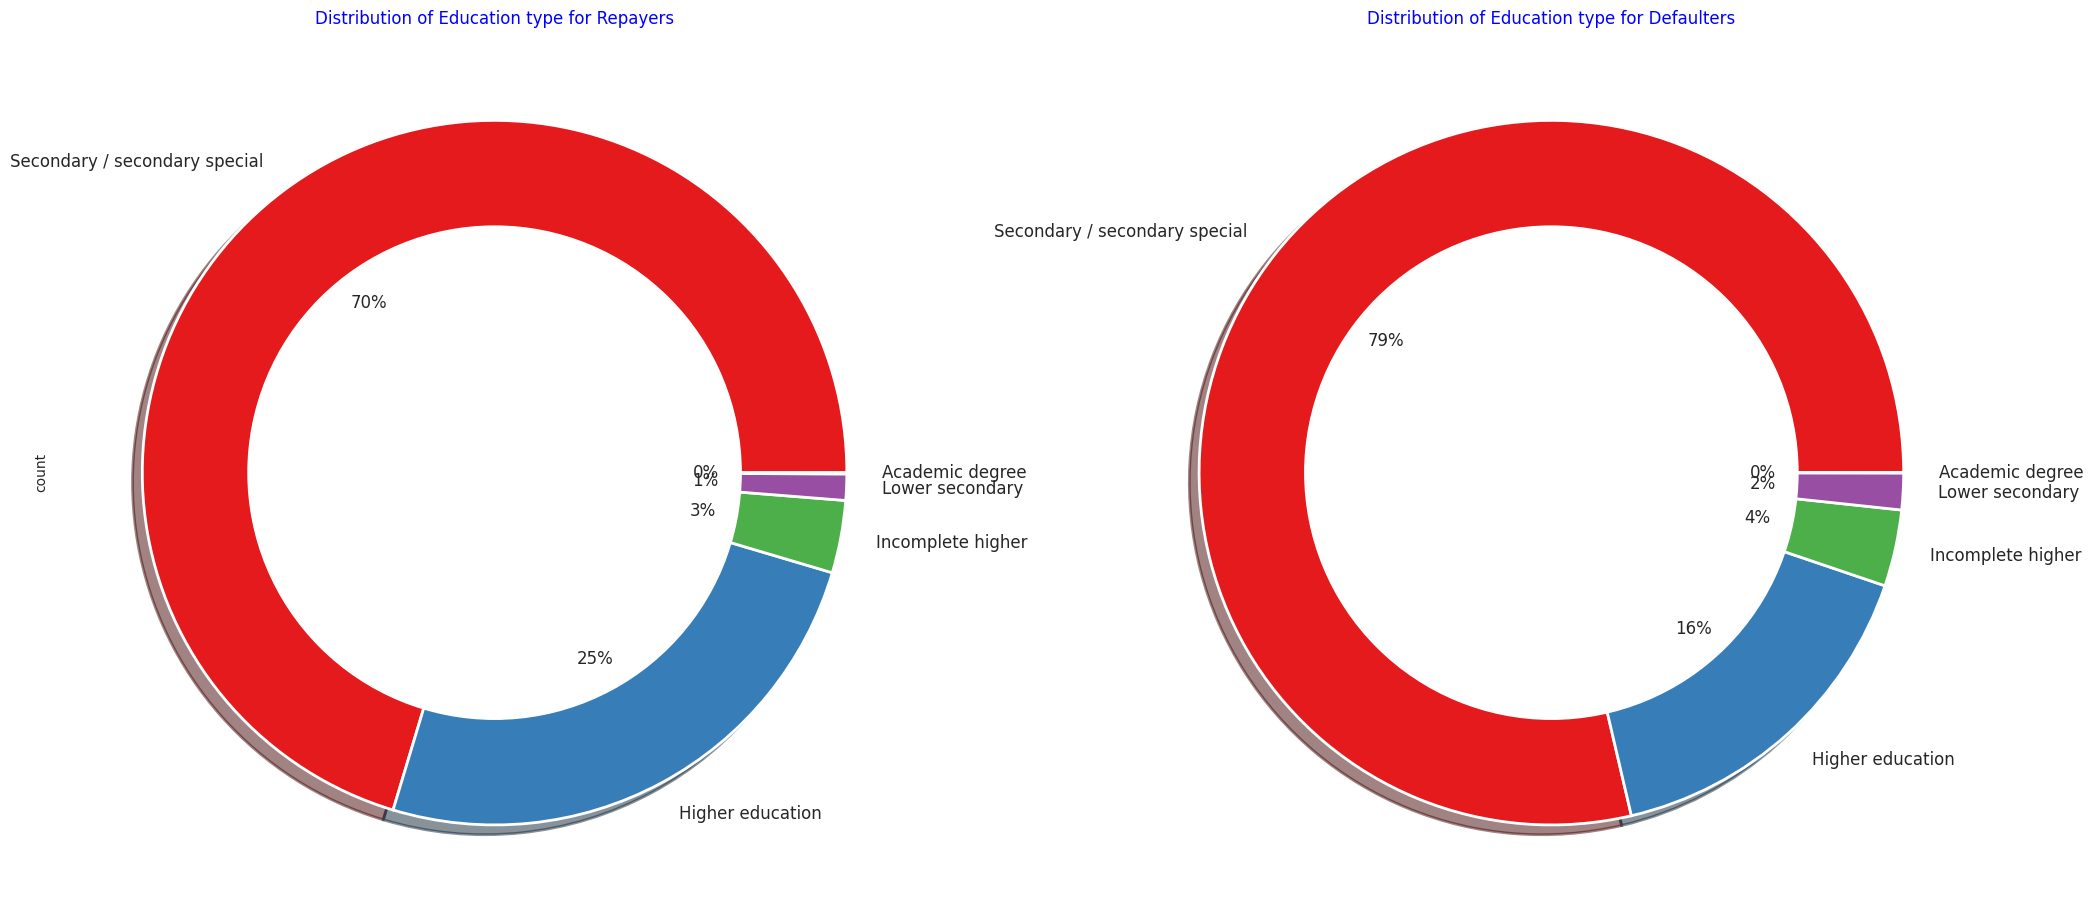

In [241]:
plt.figure(figsize=(25,25))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Clients who default have proportionally 9% less higher education compared to clients who do not default.

### Average Earnings by different professions and education types

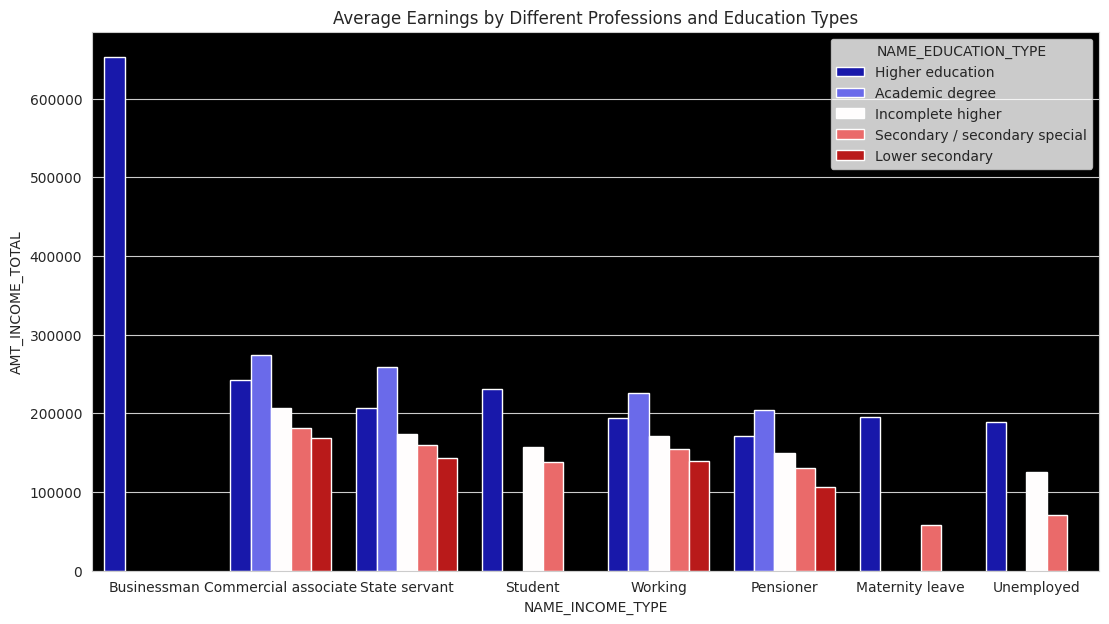

In [242]:
# edu = data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
# fig = plt.figure(figsize=(13,7))
# ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
# ax.set_facecolor("k")
# plt.title(" Average Earnings by different professions and education types")
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Group the data and calculate mean income
edu = data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending=False)

# Create a figure with a specific size
fig = plt.figure(figsize=(13, 7))

# Create the barplot
ax = sns.barplot(
    x='NAME_INCOME_TYPE',  # Explicitly specify x-axis
    y='AMT_INCOME_TOTAL',  # Explicitly specify y-axis
    data=edu,              # Data source
    hue='NAME_EDUCATION_TYPE',  # Group by education type
    palette="seismic"      # Color palette
)

# Set the background color of the plot
ax.set_facecolor("k")

# Add a title
plt.title("Average Earnings by Different Professions and Education Types")

# Display the plot
plt.show()


### Distribution of Education type by loan repayment status

NAME_FAMILY_STATUS - Family status of the client

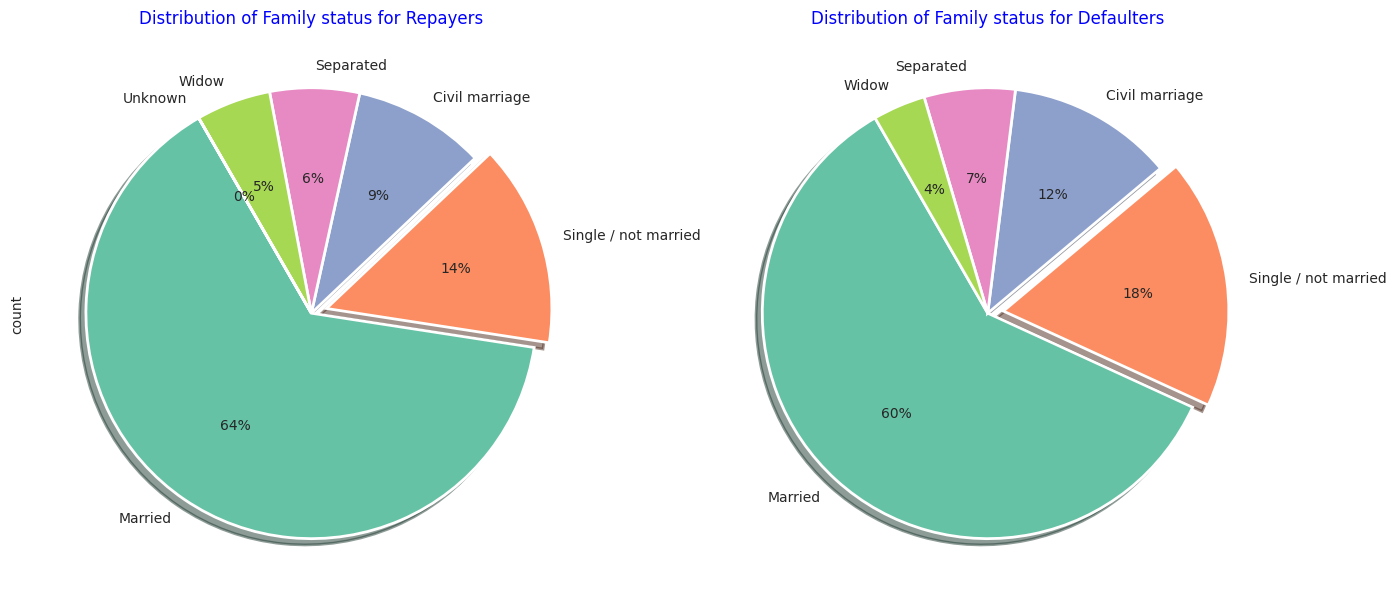

In [243]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Percentage of single people are more in defaulters than non defaulters.


### Distribution of Housing type by loan repayment status

NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

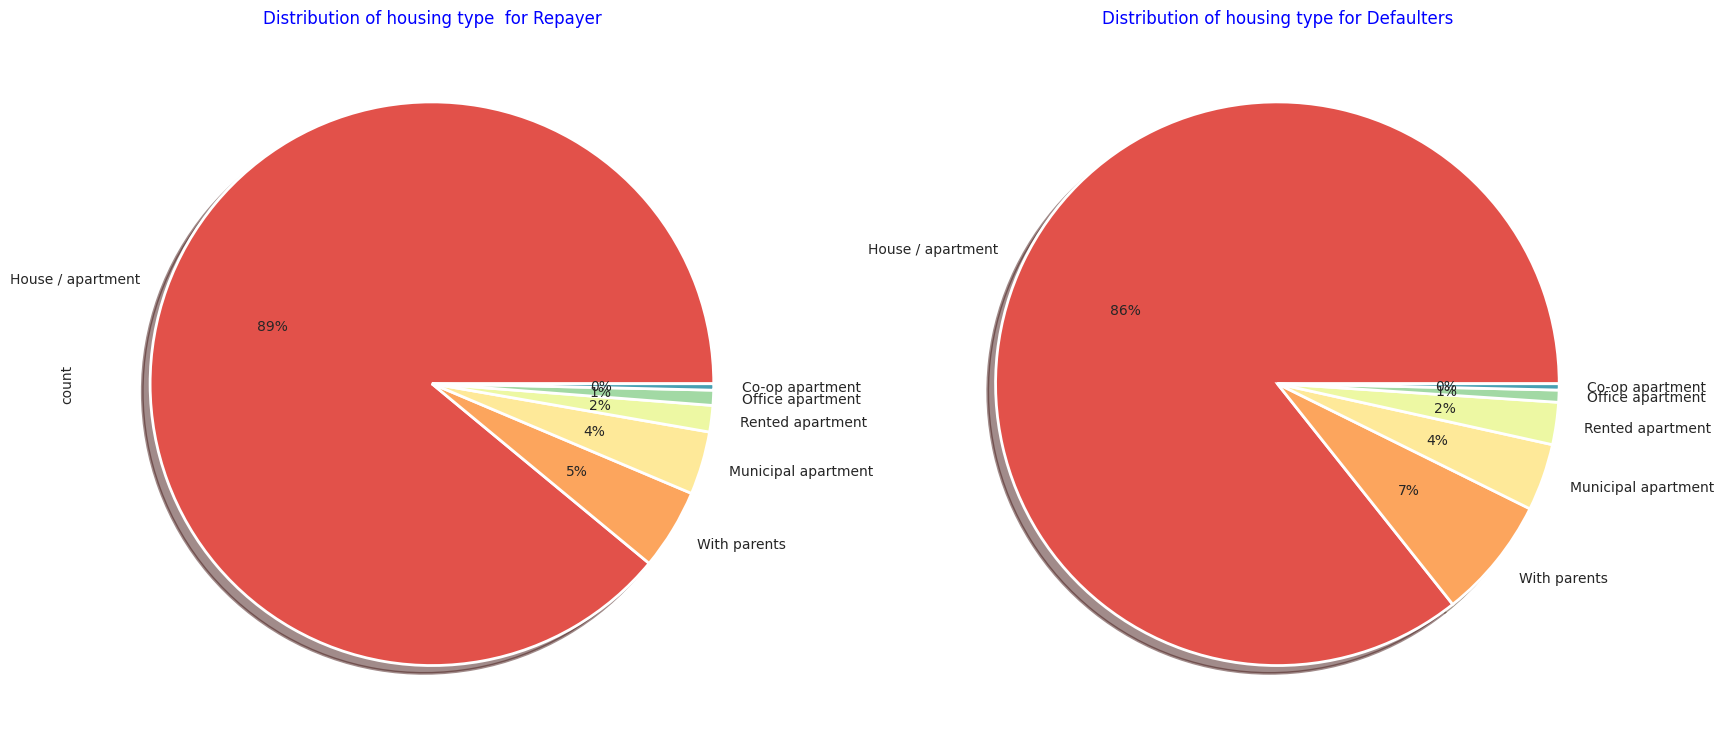

In [244]:
plt.figure(figsize=(20,20))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()


### Distribution normalized population of region where client lives by loan repayment status

REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region).



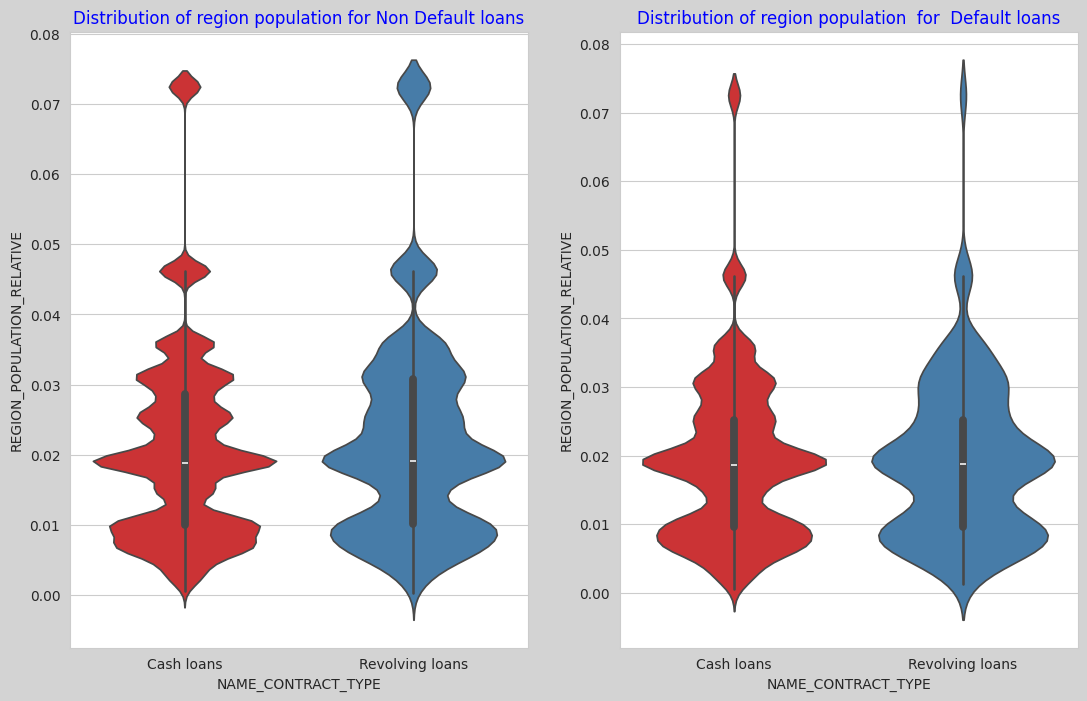

In [245]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=application_data[application_data["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==0]["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = application_data[application_data["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==1]["NAME_CONTRACT_TYPE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

### Point to infer from the graph

In High population density regions people are less likely to default on loans.


### Client's age

DAYS_BIRTH - Client's age in days at the time of application.



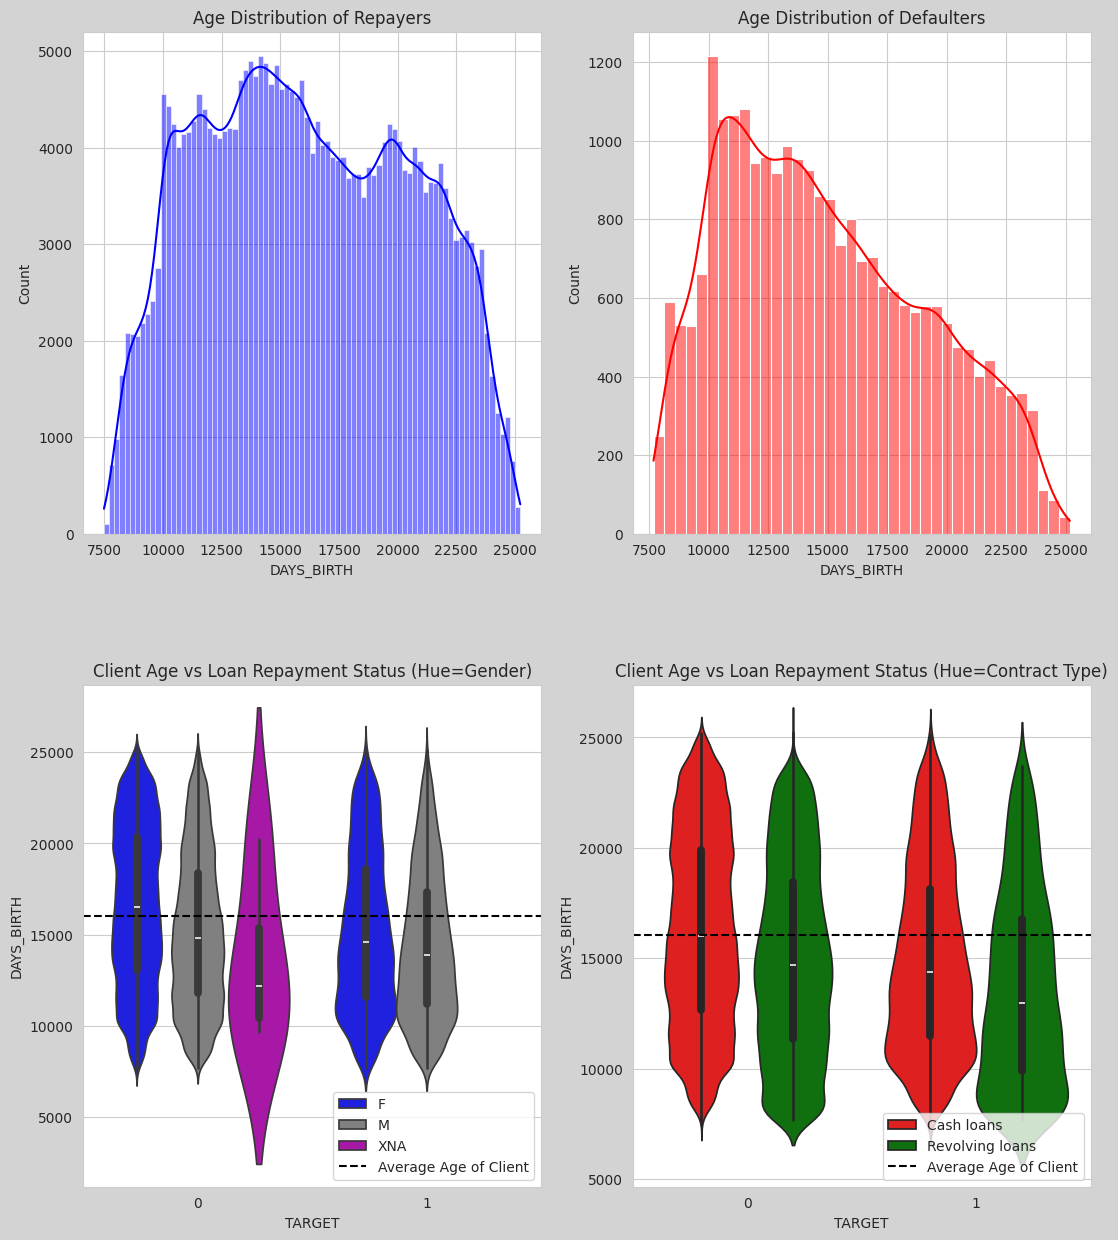

In [246]:
# fig = plt.figure(figsize=(13,15))

# plt.subplot(221)
# sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_BIRTH"],color="b")
# plt.title("Age Distribution of repayers")

# plt.subplot(222)
# sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_BIRTH"],color="r")
# plt.title("Age Distribution of defaulters")

# plt.subplot(223)
# sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["CODE_GENDER"],palette=["b","grey","m"])
# plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
# plt.legend(loc="lower right")
# plt.title("Client age vs Loan repayment status(hue=gender)")

# plt.subplot(224)
# sns.lvplot(application_data["TARGET"],application_data["DAYS_BIRTH"],hue=application_data["NAME_CONTRACT_TYPE"],palette=["r","g"])
# plt.axhline(application_data["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
# plt.legend(loc="lower right")
# plt.title("Client age vs Loan repayment status(hue=contract type)")

# plt.subplots_adjust(wspace = .2,hspace = .3)

# fig.set_facecolor("lightgrey")


import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
fig = plt.figure(figsize=(13, 15))

# First subplot: Age Distribution of repayers
plt.subplot(221)
sns.histplot(application_data[application_data["TARGET"] == 0]["DAYS_BIRTH"], color="b", kde=True)
plt.title("Age Distribution of Repayers")

# Second subplot: Age Distribution of defaulters
plt.subplot(222)
sns.histplot(application_data[application_data["TARGET"] == 1]["DAYS_BIRTH"], color="r", kde=True)
plt.title("Age Distribution of Defaulters")

# Third subplot: Client age vs Loan repayment status (hue=gender)
plt.subplot(223)
sns.violinplot(
    x=application_data["TARGET"],
    y=application_data["DAYS_BIRTH"],
    hue=application_data["CODE_GENDER"],
    palette=["b", "grey", "m"]
)
plt.axhline(application_data["DAYS_BIRTH"].mean(), linestyle="dashed", color="k", label="Average Age of Client")
plt.legend(loc="lower right")
plt.title("Client Age vs Loan Repayment Status (Hue=Gender)")

# Fourth subplot: Client age vs Loan repayment status (hue=contract type)
plt.subplot(224)
sns.violinplot(
    x=application_data["TARGET"],
    y=application_data["DAYS_BIRTH"],
    hue=application_data["NAME_CONTRACT_TYPE"],
    palette=["r", "g"]
)
plt.axhline(application_data["DAYS_BIRTH"].mean(), linestyle="dashed", color="k", label="Average Age of Client")
plt.legend(loc="lower right")
plt.title("Client Age vs Loan Repayment Status (Hue=Contract Type)")

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# Set the figure background color
fig.set_facecolor("lightgrey")

# Display the plot
plt.show()

### Point to infer from the graph

Average clients age is comparatively less in non repayers than repayers in every aspect.

Younger people tend to default more than elder people.

### Distribution of days employed for target variable.

DAYS_EMPLOYED - How many days before the application for target variable the person started current employment

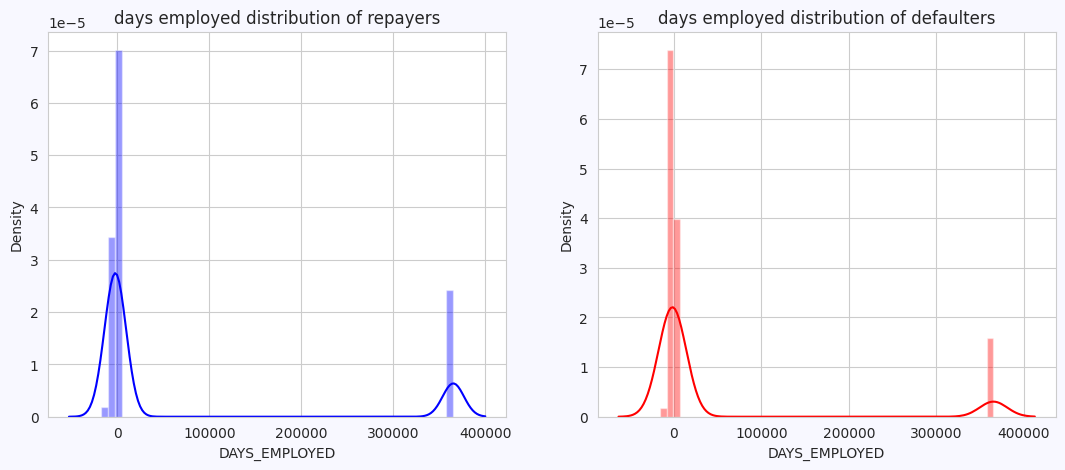

In [247]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

### Distribution of registration days for target variable.

DAYS_REGISTRATION How many days before the application did client change his registration

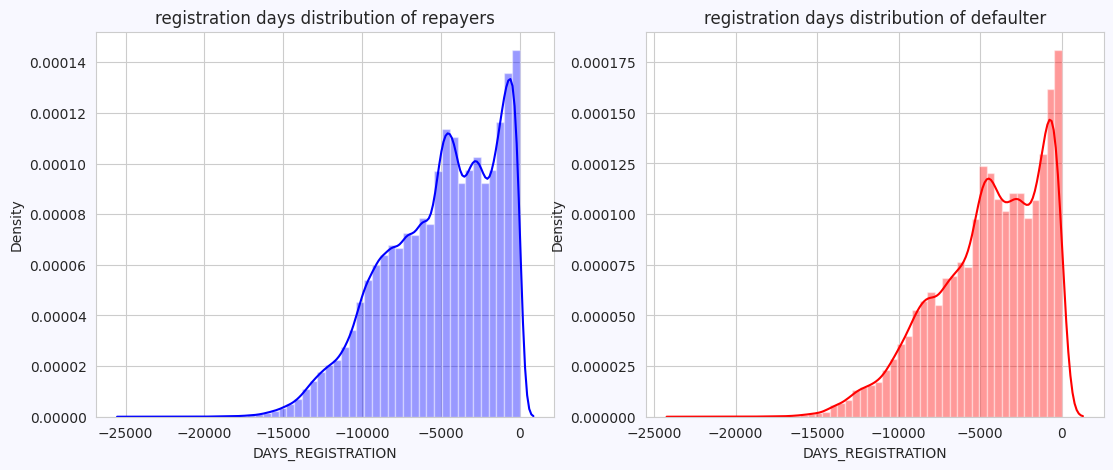

In [248]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

### Distribution in contact information provided by client

FLAG_MOBIL - Did client provide mobile phone (1=YES, 0=NO)

FLAG_EMP_PHONE - Did client provide work phone (1=YES, 0=NO)

FLAG_WORK_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_CONT_MOBILE - Was mobile phone reachable (1=YES, 0=NO)

FLAG_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_EMAIL - Did client provide email (1=YES, 0=NO)

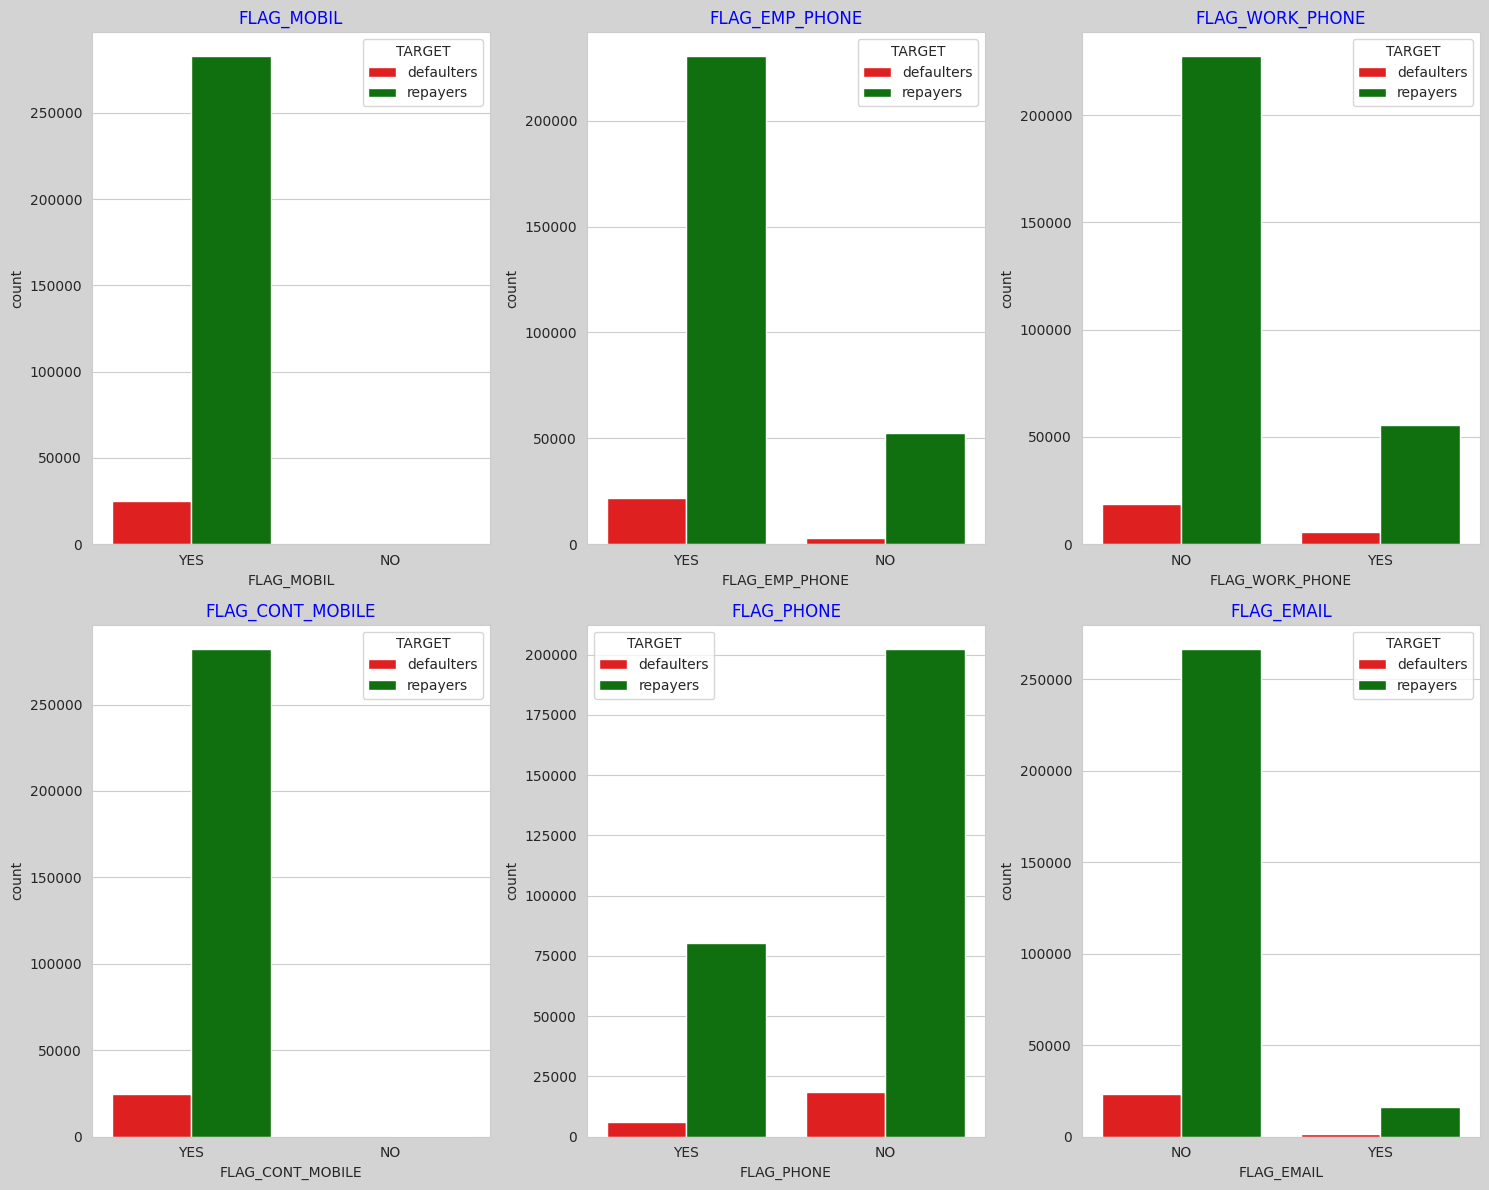

In [249]:
# x   = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
#        'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
# x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
# x  = x.replace({1:"YES",0:"NO"})

# cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
#        'FLAG_PHONE', 'FLAG_EMAIL']
# length = len(cols)

# fig = plt.figure(figsize=(15,12))
# fig.set_facecolor("lightgrey")

# for i,j in itertools.zip_longest(cols,range(length)):
#     plt.subplot(2,3,j+1)
#     sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
#     plt.title(i,color="b")


import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Prepare the data
x = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                      'FLAG_PHONE', 'FLAG_EMAIL', "TARGET"]]
x["TARGET"] = x["TARGET"].replace({0: "repayers", 1: "defaulters"})
x = x.replace({1: "YES", 0: "NO"})

# Define columns for plotting
cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
        'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

# Create a figure with a specific size
fig = plt.figure(figsize=(15, 12))
fig.set_facecolor("lightgrey")

# Plot countplots for each column
for i, j in itertools.zip_longest(cols, range(length)):
    plt.subplot(2, 3, j + 1)
    sns.countplot(
        x=i,  # Use the column name directly
        hue="TARGET",  # Use the column name directly
        data=x,  # Pass the DataFrame
        palette=["r", "g"]  # Specify the palette
    )
    plt.title(i, color="b")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Distribution of registration days for target variable.

REGION_RATING_CLIENT - Home credit rating of the region where client lives (1,2,3).

REGION_RATING_CLIENT_W_CITY - Home credit rating of the region where client lives with taking city into account (1,2,3). Percentage of defaulters are less in 1-rated regions compared to repayers.

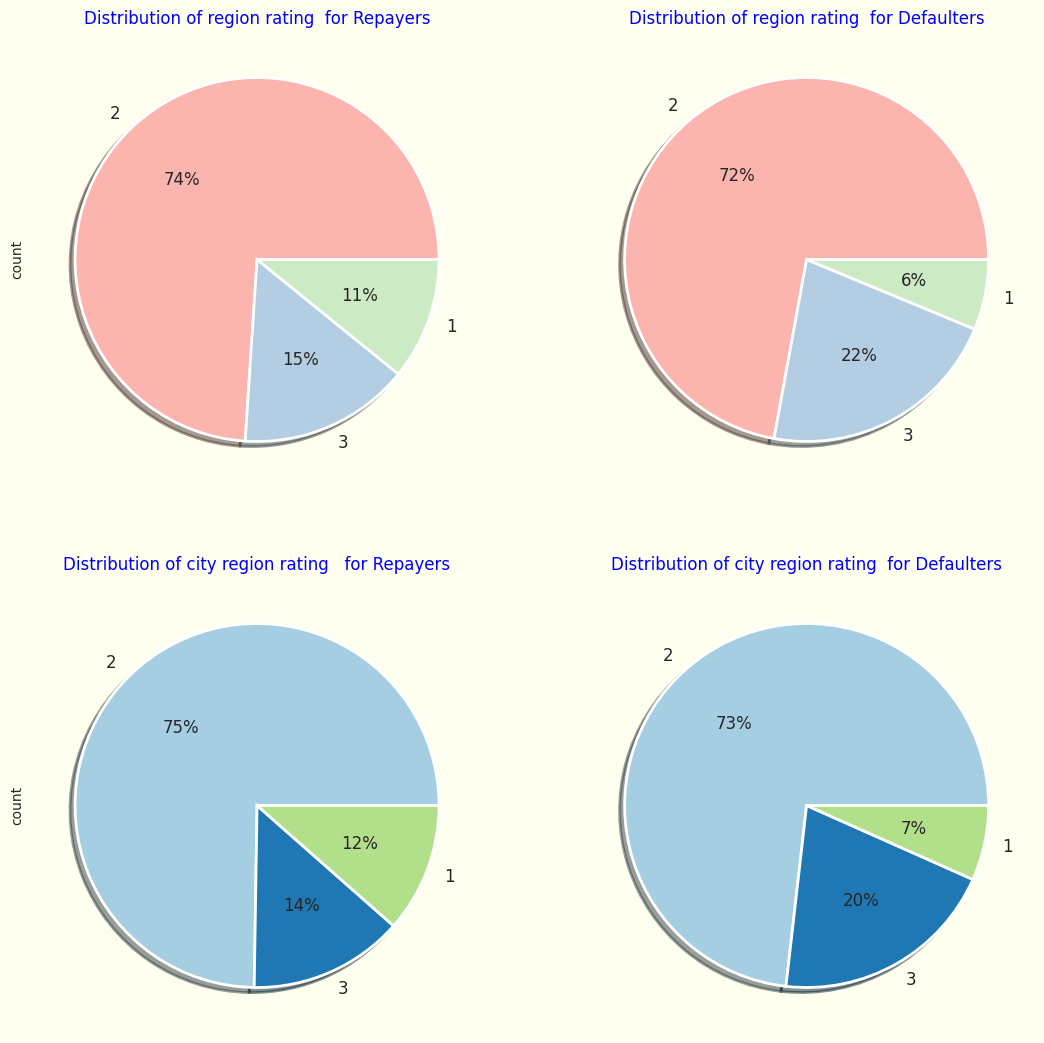

In [250]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

### Point to infer from the graph

Percentage of defaulters are less in 1-rated regions compared to repayers.

Percentage of defaulters are more in 3-rated regions compared to repayers.

### Peak days and hours for applying loans (defaulters vs repayers)

WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for the loan.

HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan.



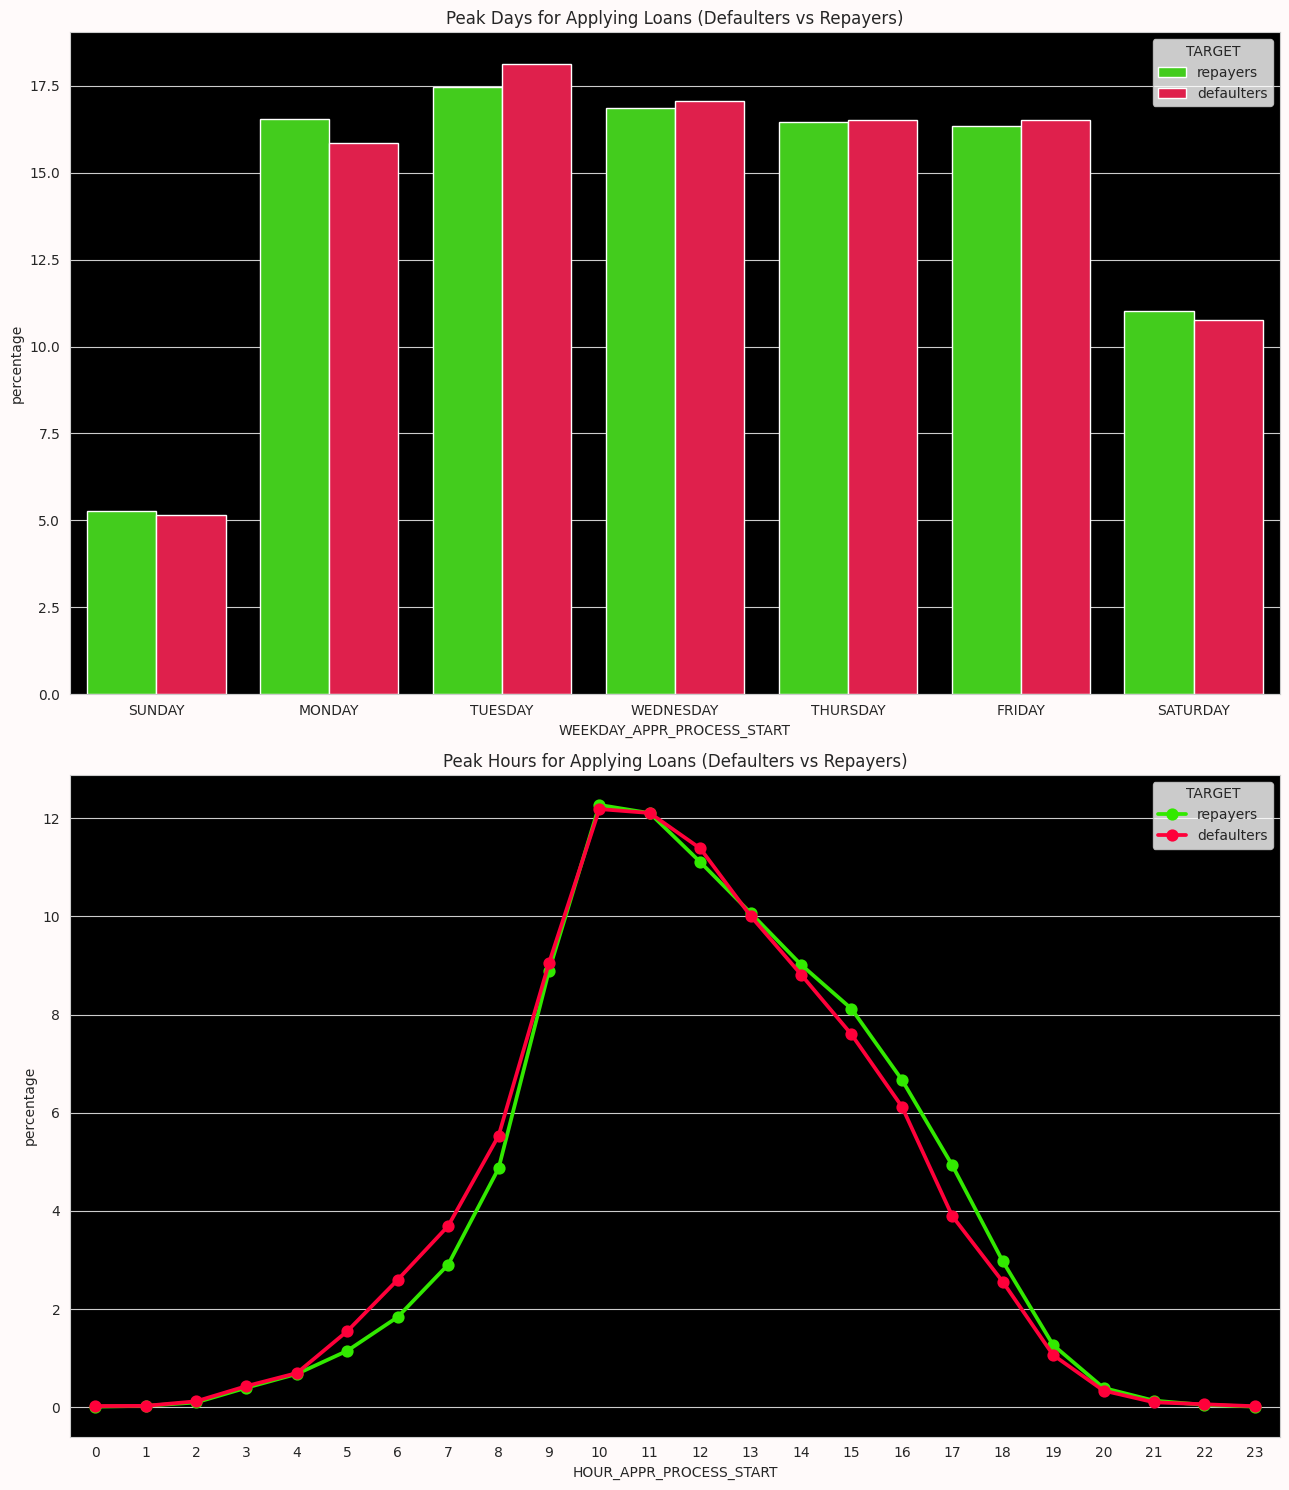

In [251]:
# day = application_data.groupby("TARGET").agg({"WEEKDAY_APPR_PROCESS_START":"value_counts"})
# day = day.rename(columns={"WEEKDAY_APPR_PROCESS_START":"value_counts"})
# day = day.reset_index()
# day_0 = day[:7]
# day_1 = day[7:]
# day_0["percentage"] = day_0["value_counts"]*100/day_0["value_counts"].sum()
# day_1["percentage"] = day_1["value_counts"]*100/day_1["value_counts"].sum()
# days = pd.concat([day_0,day_1],axis=0)
# days["TARGET"] = days.replace({1:"defaulters",0:"repayers"})

# fig = plt.figure(figsize=(13,15))
# plt.subplot(211)
# order = ['SUNDAY', 'MONDAY','TUESDAY', 'WEDNESDAY','THURSDAY', 'FRIDAY', 'SATURDAY']
# ax= sns.barplot("WEEKDAY_APPR_PROCESS_START","percentage",data=days,
#                 hue="TARGET",order=order,palette="prism")
# ax.set_facecolor("k")
# ax.set_title("Peak days for applying loans (defaulters vs repayers)")

# hr = application_data.groupby("TARGET").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
# hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
# hr_0 = hr[hr["TARGET"]==0]
# hr_1 = hr[hr["TARGET"]==1]
# hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
# hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
# hrs = pd.concat([hr_0,hr_1],axis=0)
# hrs["TARGET"] = hrs["TARGET"].replace({1:"defaulters",0:"repayers"})
# hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

# plt.subplot(212)
# ax1 = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",
#                     data=hrs,hue="TARGET",palette="prism")
# ax1.set_facecolor("k")
# ax1.set_title("Peak hours for applying loans (defaulters vs repayers)")
# fig.set_facecolor("snow")


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by TARGET and WEEKDAY_APPR_PROCESS_START, and calculate value counts
day = application_data.groupby("TARGET")["WEEKDAY_APPR_PROCESS_START"].value_counts().reset_index(name="value_counts")

# Split the data into repayers (TARGET=0) and defaulters (TARGET=1)
day_0 = day[day["TARGET"] == 0]
day_1 = day[day["TARGET"] == 1]

# Calculate percentages for each group
day_0["percentage"] = day_0["value_counts"] * 100 / day_0["value_counts"].sum()
day_1["percentage"] = day_1["value_counts"] * 100 / day_1["value_counts"].sum()

# Combine the data back into a single DataFrame
days = pd.concat([day_0, day_1], axis=0)

# Replace TARGET values with descriptive labels
days["TARGET"] = days["TARGET"].replace({1: "defaulters", 0: "repayers"})

# Create a figure with a specific size
fig = plt.figure(figsize=(13, 15))

# First subplot: Peak days for applying loans (defaulters vs repayers)
plt.subplot(211)
order = ['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']
ax = sns.barplot(
    x="WEEKDAY_APPR_PROCESS_START",
    y="percentage",
    data=days,
    hue="TARGET",
    order=order,
    palette="prism"
)
ax.set_facecolor("k")
ax.set_title("Peak Days for Applying Loans (Defaulters vs Repayers)")

# Group by TARGET and HOUR_APPR_PROCESS_START, and calculate value counts
hr = application_data.groupby("TARGET")["HOUR_APPR_PROCESS_START"].value_counts().reset_index(name="value_counts")

# Split the data into repayers (TARGET=0) and defaulters (TARGET=1)
hr_0 = hr[hr["TARGET"] == 0]
hr_1 = hr[hr["TARGET"] == 1]

# Calculate percentages for each group
hr_0["percentage"] = hr_0["value_counts"] * 100 / hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"] * 100 / hr_1["value_counts"].sum()

# Combine the data back into a single DataFrame
hrs = pd.concat([hr_0, hr_1], axis=0)

# Replace TARGET values with descriptive labels
hrs["TARGET"] = hrs["TARGET"].replace({1: "defaulters", 0: "repayers"})

# Sort by HOUR_APPR_PROCESS_START
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START", ascending=True)

# Second subplot: Peak hours for applying loans (defaulters vs repayers)
plt.subplot(212)
ax1 = sns.pointplot(
    x="HOUR_APPR_PROCESS_START",
    y="percentage",
    data=hrs,
    hue="TARGET",
    palette="prism"
)
ax1.set_facecolor("k")
ax1.set_title("Peak Hours for Applying Loans (Defaulters vs Repayers)")

# Set the figure background color
fig.set_facecolor("snow")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Point to infer from the graph

On tuesdays , percentage of defaulters applying for loans is greater than that of repayers.

From morning 4'O clock to 9'O clock percentage of defaulters applying for loans is greater than that of repayers.


### Distribution in organization types for repayers and defaulters

ORGANIZATION_TYPE - Type of organization where client works.



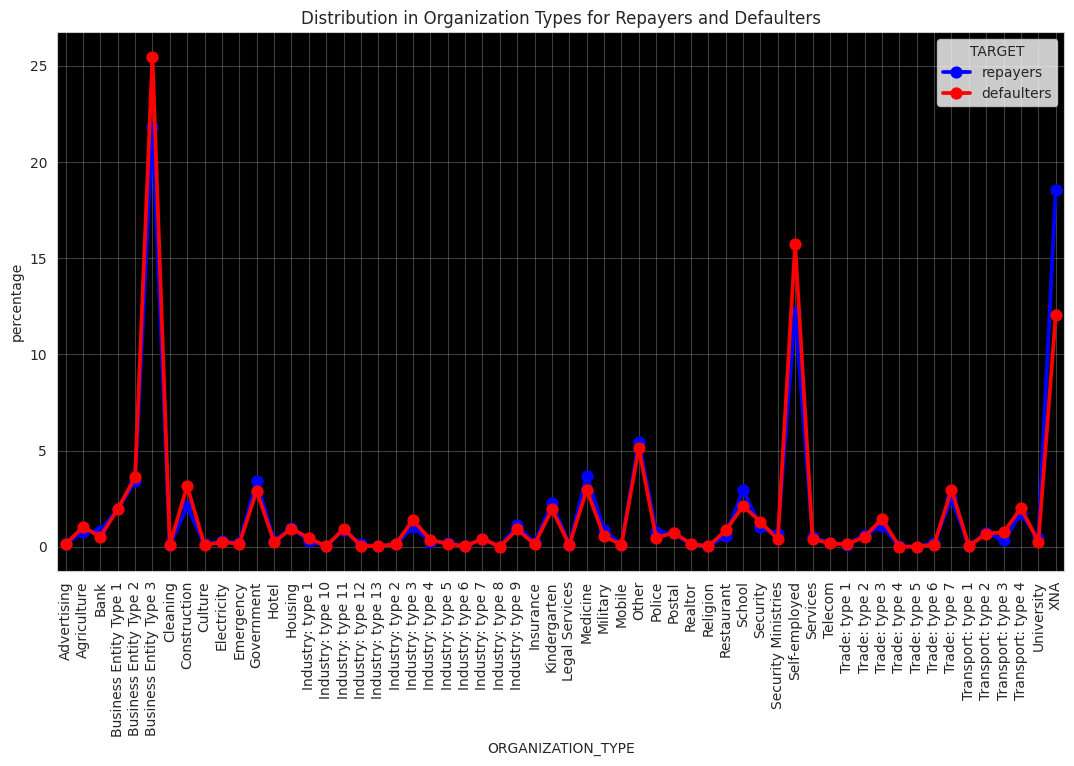

In [252]:
# org = application_data.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
# org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
# org_0 = org[org["TARGET"] == 0]
# org_1 = org[org["TARGET"] == 1]
# org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
# org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

# organization = pd.concat([org_0,org_1],axis=0)
# organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

# organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

# organization
# plt.figure(figsize=(13,7))
# ax = sns.pointplot("ORGANIZATION_TYPE","percentage",
#                    data=organization,hue="TARGET",palette=["b","r"])
# plt.xticks(rotation=90)
# plt.grid(True,alpha=.3)
# ax.set_facecolor("k")
# ax.set_title("Distribution in organization types for repayers and defaulters")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by TARGET and ORGANIZATION_TYPE, and calculate value counts
org = application_data.groupby("TARGET")["ORGANIZATION_TYPE"].value_counts().reset_index(name="value_counts")

# Split the data into repayers (TARGET=0) and defaulters (TARGET=1)
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]

# Calculate percentages for each group
org_0["percentage"] = org_0["value_counts"] * 100 / org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"] * 100 / org_1["value_counts"].sum()

# Combine the data back into a single DataFrame
organization = pd.concat([org_0, org_1], axis=0)

# Sort by ORGANIZATION_TYPE
organization = organization.sort_values(by="ORGANIZATION_TYPE", ascending=True)

# Replace TARGET values with descriptive labels
organization["TARGET"] = organization["TARGET"].replace({0: "repayers", 1: "defaulters"})

# Create a figure with a specific size
plt.figure(figsize=(13, 7))

# Create the pointplot
ax = sns.pointplot(
    x="ORGANIZATION_TYPE",  # Explicitly specify x-axis
    y="percentage",         # Explicitly specify y-axis
    data=organization,      # Data source
    hue="TARGET",           # Group by TARGET
    palette=["b", "r"]      # Color palette
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid lines
plt.grid(True, alpha=0.3)

# Set the background color of the plot
ax.set_facecolor("k")

# Add a title
ax.set_title("Distribution in Organization Types for Repayers and Defaulters")

# Display the plot
plt.show()

### Point to infer from the graph

Organizations like Business Entity Type 3,Construction,Self-employed percentage of defaulters are higher than repayers.

### Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)

OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.

DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .

OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default.

DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

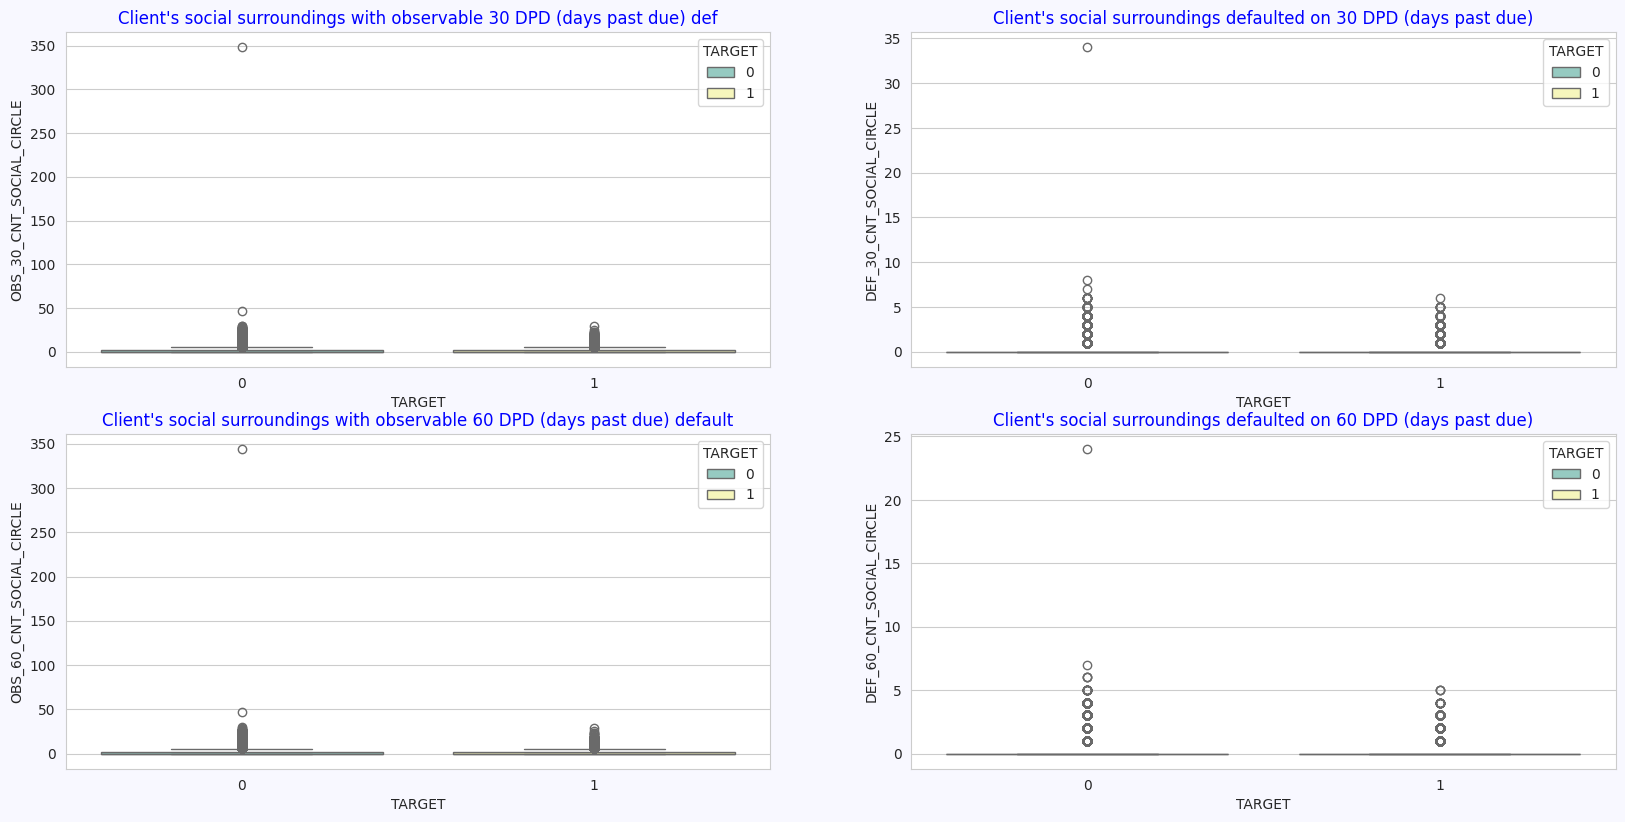

In [253]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=application_data,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b")
plt.subplot(422)
sns.boxplot(data=application_data,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b")
plt.subplot(423)
sns.boxplot(data=application_data,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b")
plt.subplot(424)
sns.boxplot(data=application_data,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b")
fig.set_facecolor("ghostwhite")

### Number of days before application client changed phone .

DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone.



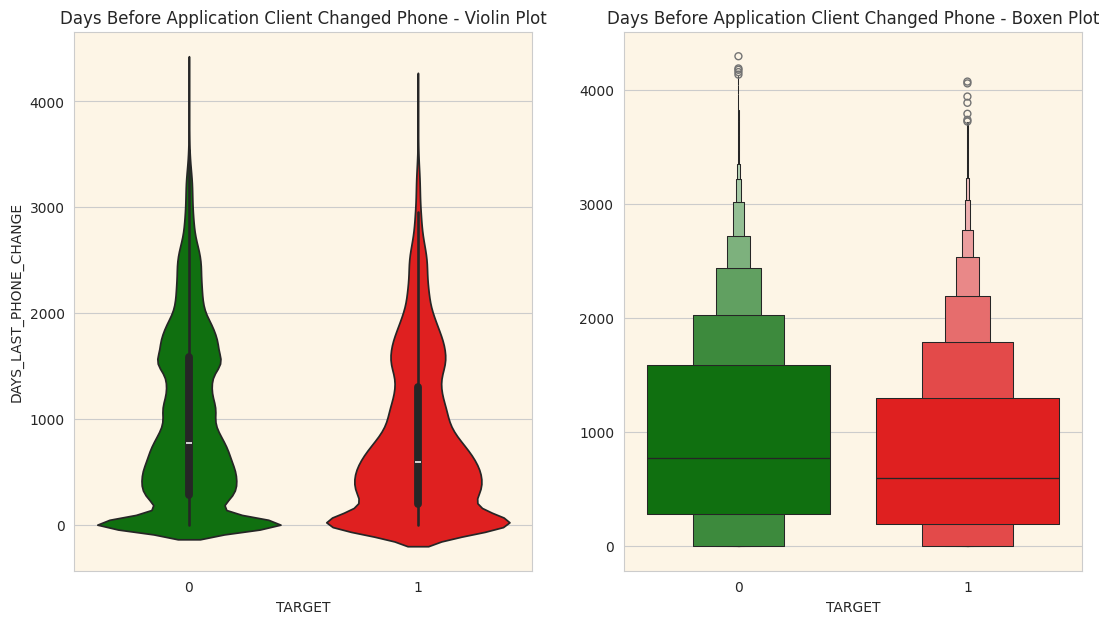

In [254]:
# plt.figure(figsize=(13,7))
# plt.subplot(121)
# ax = sns.violinplot(application_data["TARGET"],
#                     application_data["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
# ax.set_facecolor("oldlace")
# ax.set_title("days before application client changed phone -violin plot")
# plt.subplot(122)
# ax1 = sns.lvplot(application_data["TARGET"],
#                  application_data["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
# ax1.set_facecolor("oldlace")
# ax1.set_ylabel("")
# ax1.set_title("days before application client changed phone -box plot")
# plt.subplots_adjust(wspace = .2)


import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
plt.figure(figsize=(13, 7))

# First subplot: Violin plot for DAYS_LAST_PHONE_CHANGE
plt.subplot(121)
ax = sns.violinplot(
    x=application_data["TARGET"],  # Explicitly specify x-axis
    y=application_data["DAYS_LAST_PHONE_CHANGE"],  # Explicitly specify y-axis
    palette=["g", "r"]  # Color palette
)
ax.set_facecolor("oldlace")
ax.set_title("Days Before Application Client Changed Phone - Violin Plot")

# Second subplot: Boxen plot for DAYS_LAST_PHONE_CHANGE
plt.subplot(122)
ax1 = sns.boxenplot(
    x=application_data["TARGET"],  # Explicitly specify x-axis
    y=application_data["DAYS_LAST_PHONE_CHANGE"],  # Explicitly specify y-axis
    palette=["g", "r"]  # Color palette
)
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("Days Before Application Client Changed Phone - Boxen Plot")

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.2)

# Display the plot
plt.show()

### Point to infer from the graph

Average days of defaulters phone change is less than average days of repayers phone change.

### Documents provided by the clients.

FLAG_DOCUMENT - Did client provide documents.(1,0)

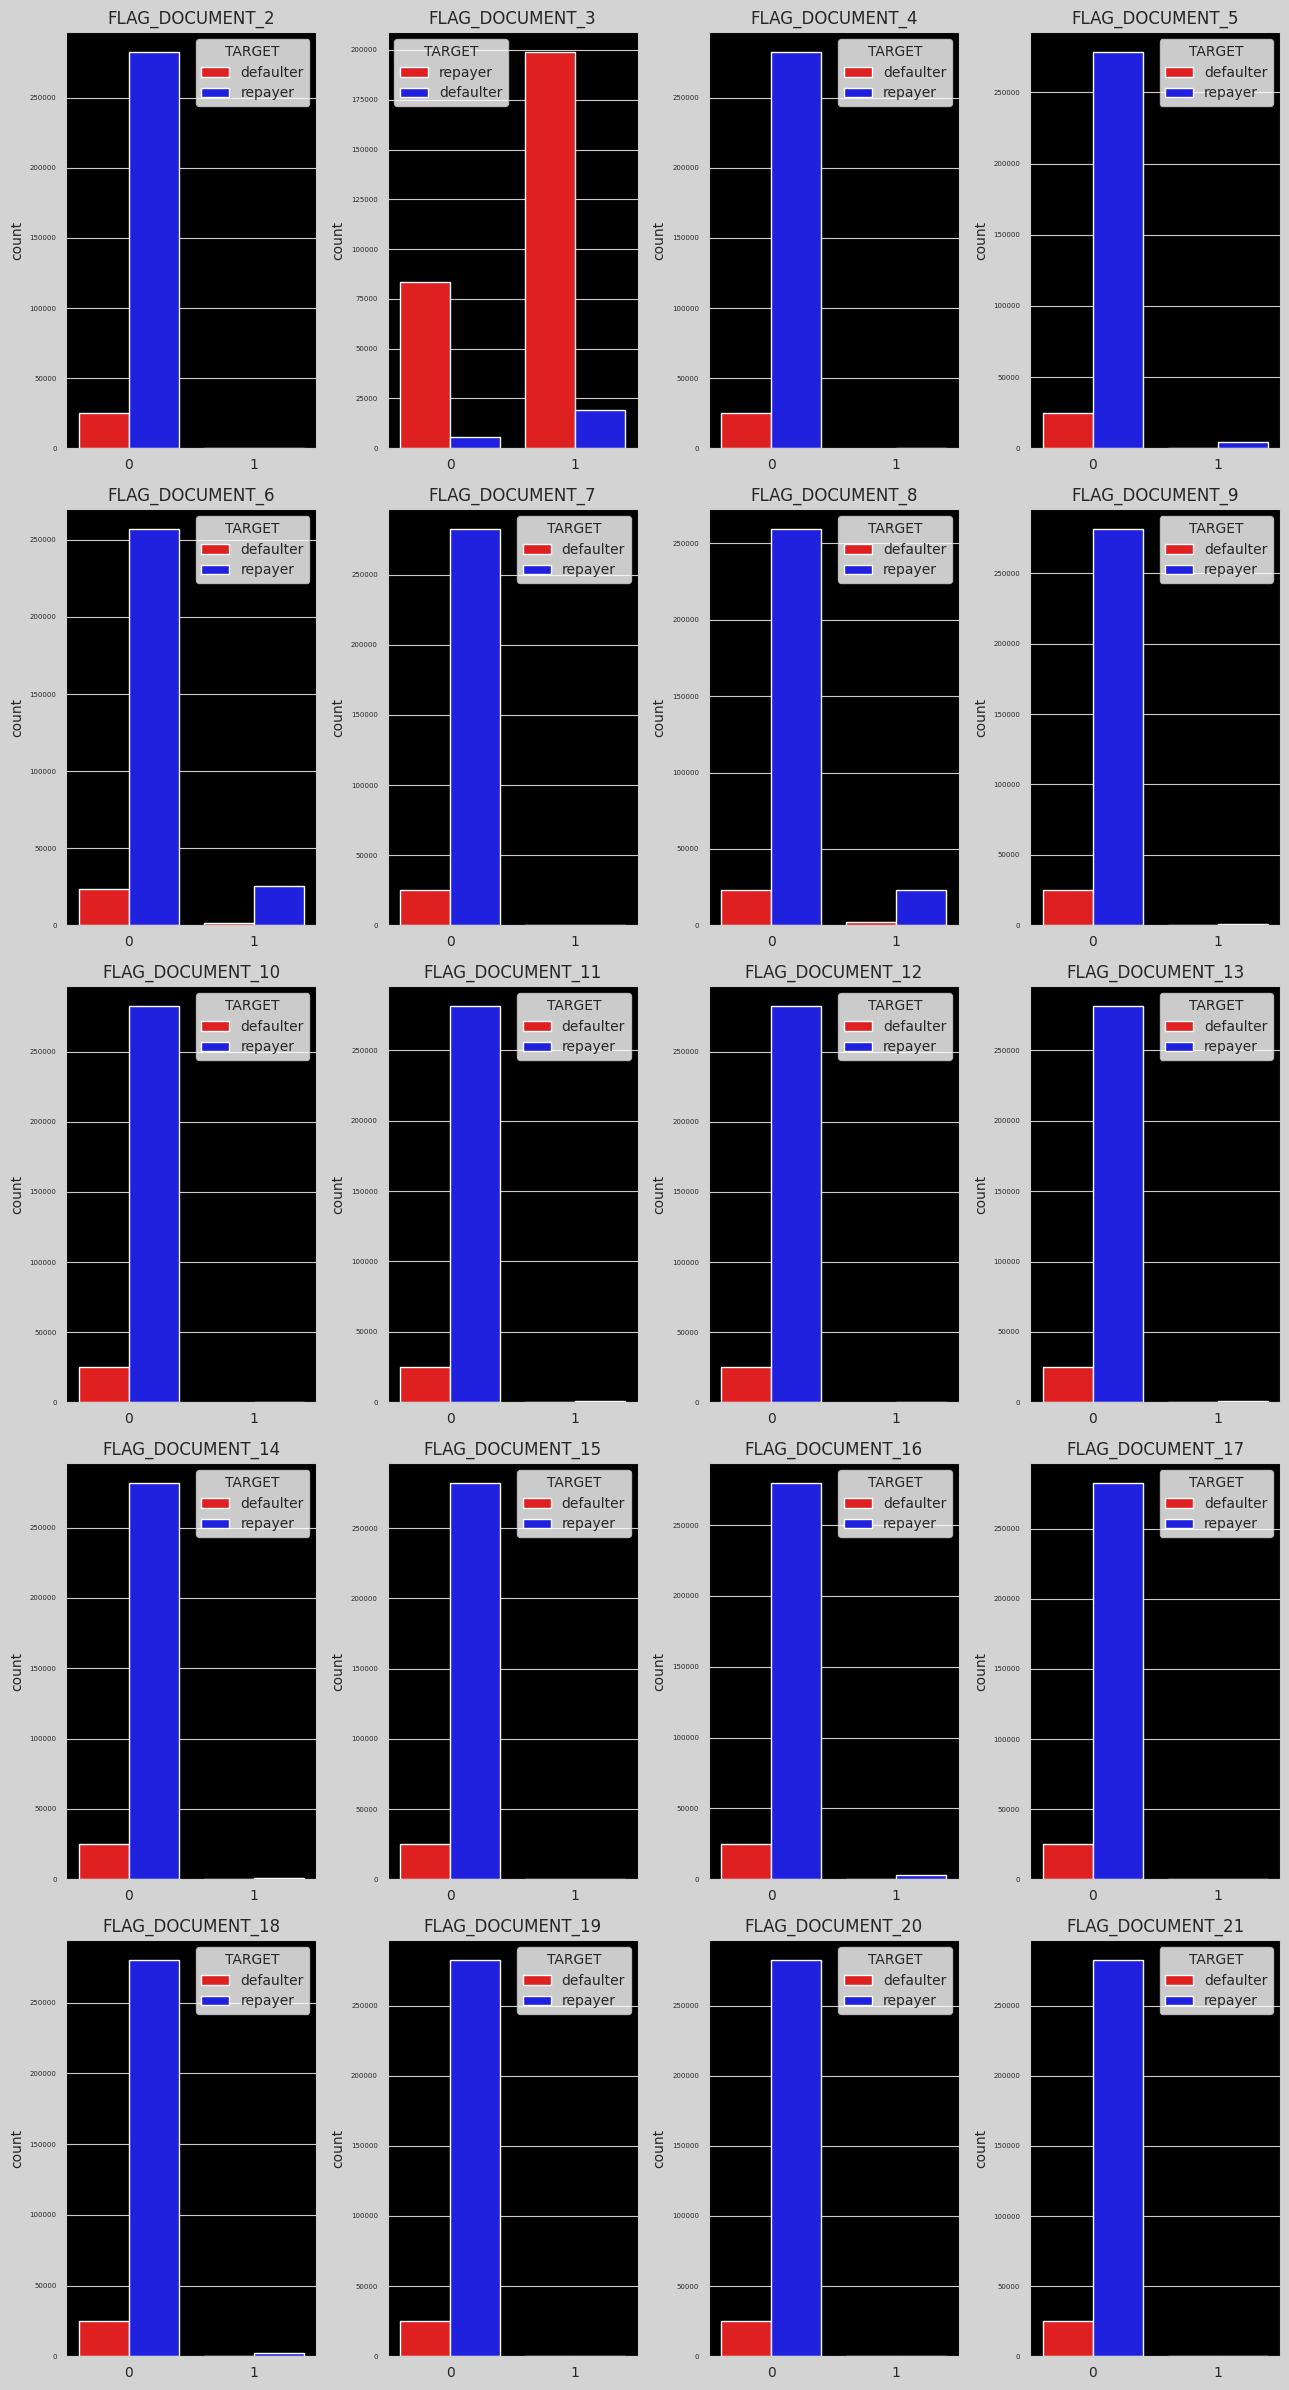

In [255]:
# cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
#        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
#        'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
#        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
#        'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
#        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
#        'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# df_flag = application_data[cols+["TARGET"]]

# length = len(cols)

# df_flag["TARGET"] = df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

# fig = plt.figure(figsize=(13,24))
# fig.set_facecolor("lightgrey")
# for i,j in itertools.zip_longest(cols,range(length)):
#     plt.subplot(5,4,j+1)
#     ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
#     plt.yticks(fontsize=5)
#     plt.xlabel("")
#     plt.title(i)
#     ax.set_facecolor("k")


import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Define the columns to analyze
cols = [
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

# Create a DataFrame with the selected columns and TARGET
df_flag = application_data[cols + ["TARGET"]]

# Replace TARGET values with descriptive labels
df_flag["TARGET"] = df_flag["TARGET"].replace({1: "defaulter", 0: "repayer"})

# Create a figure with a specific size
fig = plt.figure(figsize=(13, 24))
fig.set_facecolor("lightgrey")

# Plot countplots for each column
for i, j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(
        x=i,  # Use the column name directly
        hue="TARGET",  # Use the column name directly
        data=df_flag,  # Pass the DataFrame
        palette=["r", "b"]  # Specify the palette
    )
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("k")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Equiries to Credit Bureau about the client before application.

AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application.

AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).

AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).

AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).

AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

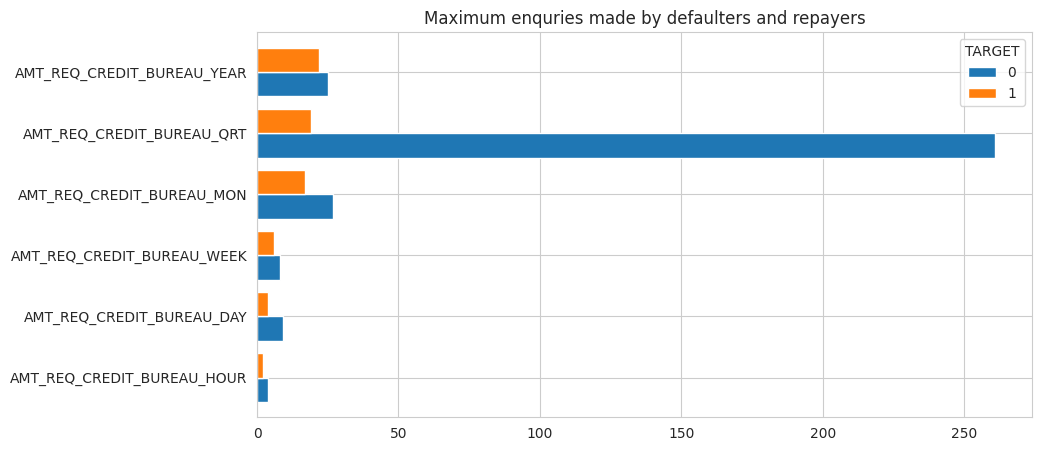

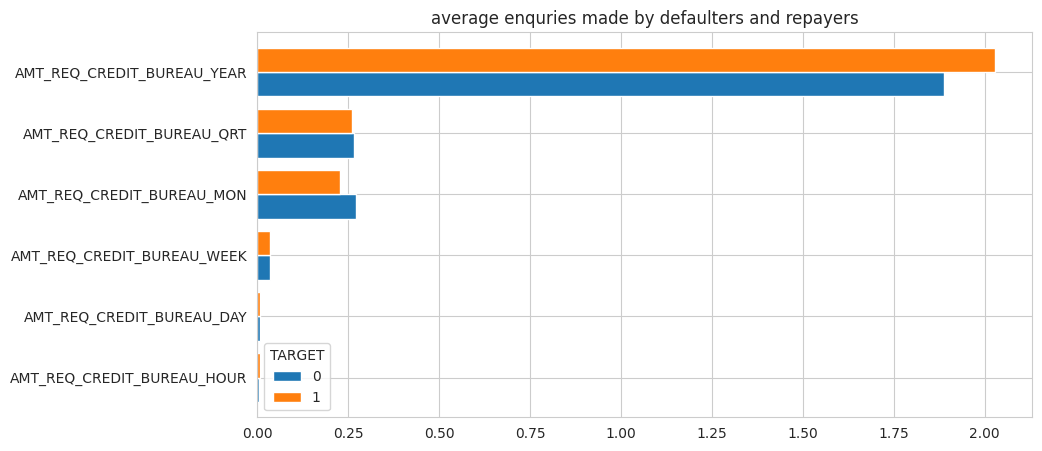

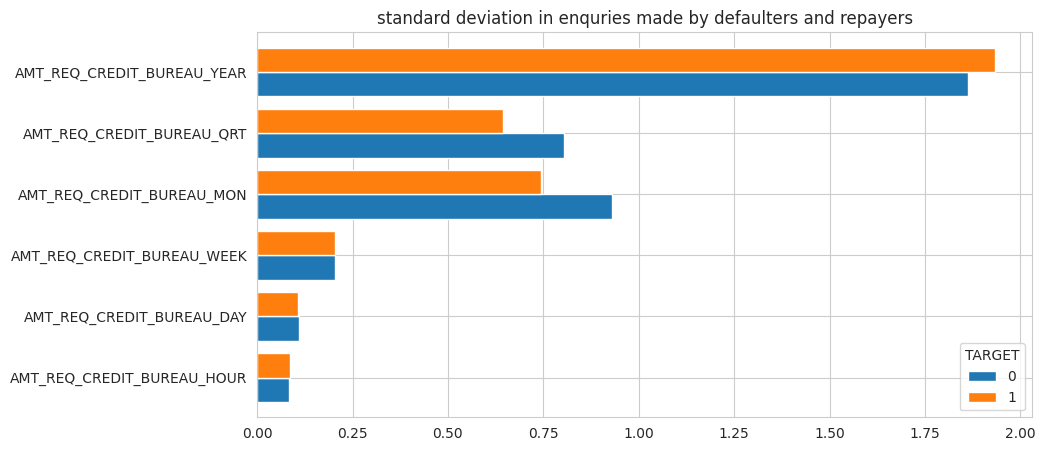

In [256]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_data.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()


### Current loan id having previous loan applications.

SK_ID_PREV - ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit).

SK_ID_CURR ID of loan in our sample.


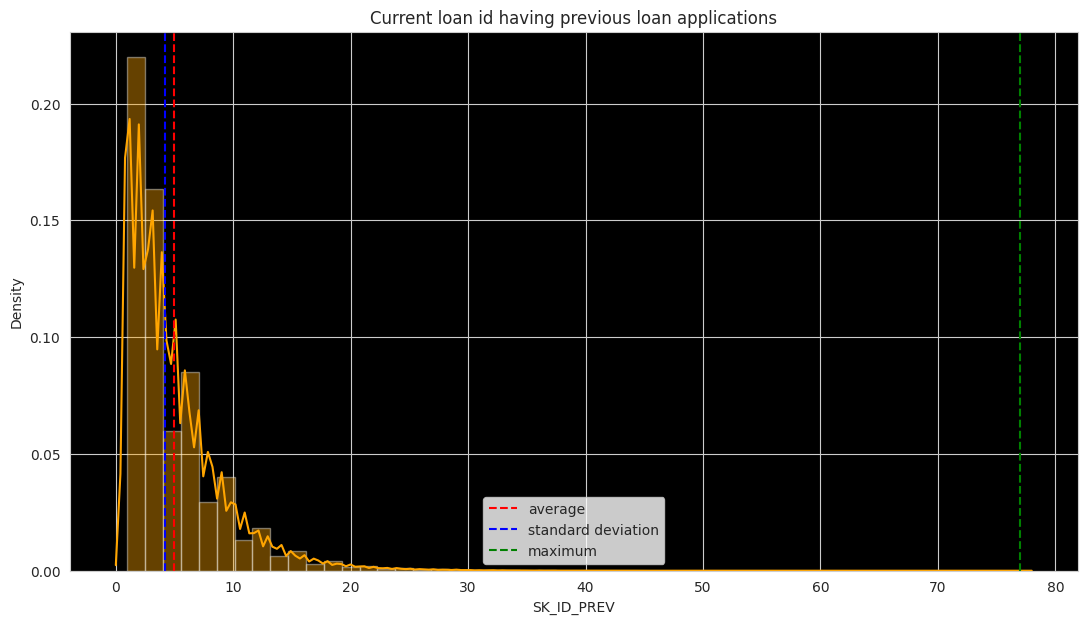

In [257]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("k")

### Point to infer from the graph
On average current loan ids have 4 to 5 loan applications previously


### Contract types in previous applications

NAME_CONTRACT_TYPE Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.


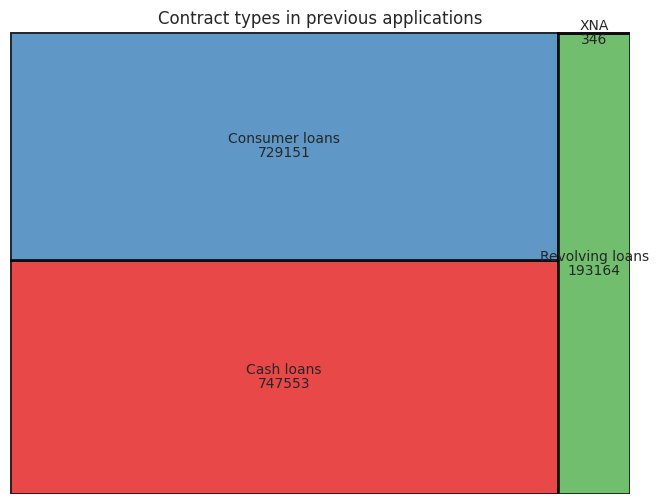

In [259]:
# cnts = previous_application["NAME_CONTRACT_TYPE"].value_counts()
# import squarify
# plt.figure(figsize=(8,6))
# squarify.plot(cnts.values,label=cnts.keys(),value=cnts.values,linewidth=2,edgecolor="k",alpha=.8,color=sns.color_palette("Set1"))
# plt.axis("off")
# plt.title("Contaract types in previous applications")
# plt.show()

# Install the squarify package if it's not already installed
!pip install squarify

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Assuming previous_application is a DataFrame and "NAME_CONTRACT_TYPE" is a column in it
cnts = previous_application["NAME_CONTRACT_TYPE"].value_counts()

# Create the treemap plot
plt.figure(figsize=(8,6))
squarify.plot(cnts.values, label=cnts.keys(), value=cnts.values, linewidth=2, edgecolor="k", alpha=.8, color=sns.color_palette("Set1"))
plt.axis("off")
plt.title("Contract types in previous applications")
plt.show()

### Point to infer from the graph


Cash loan applications are maximum followed by consumer loan applications.

### Previous loan amounts applied and loan amounts credited.

AMT_APPLICATION-For how much credit did client ask on the previous application.

AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT.

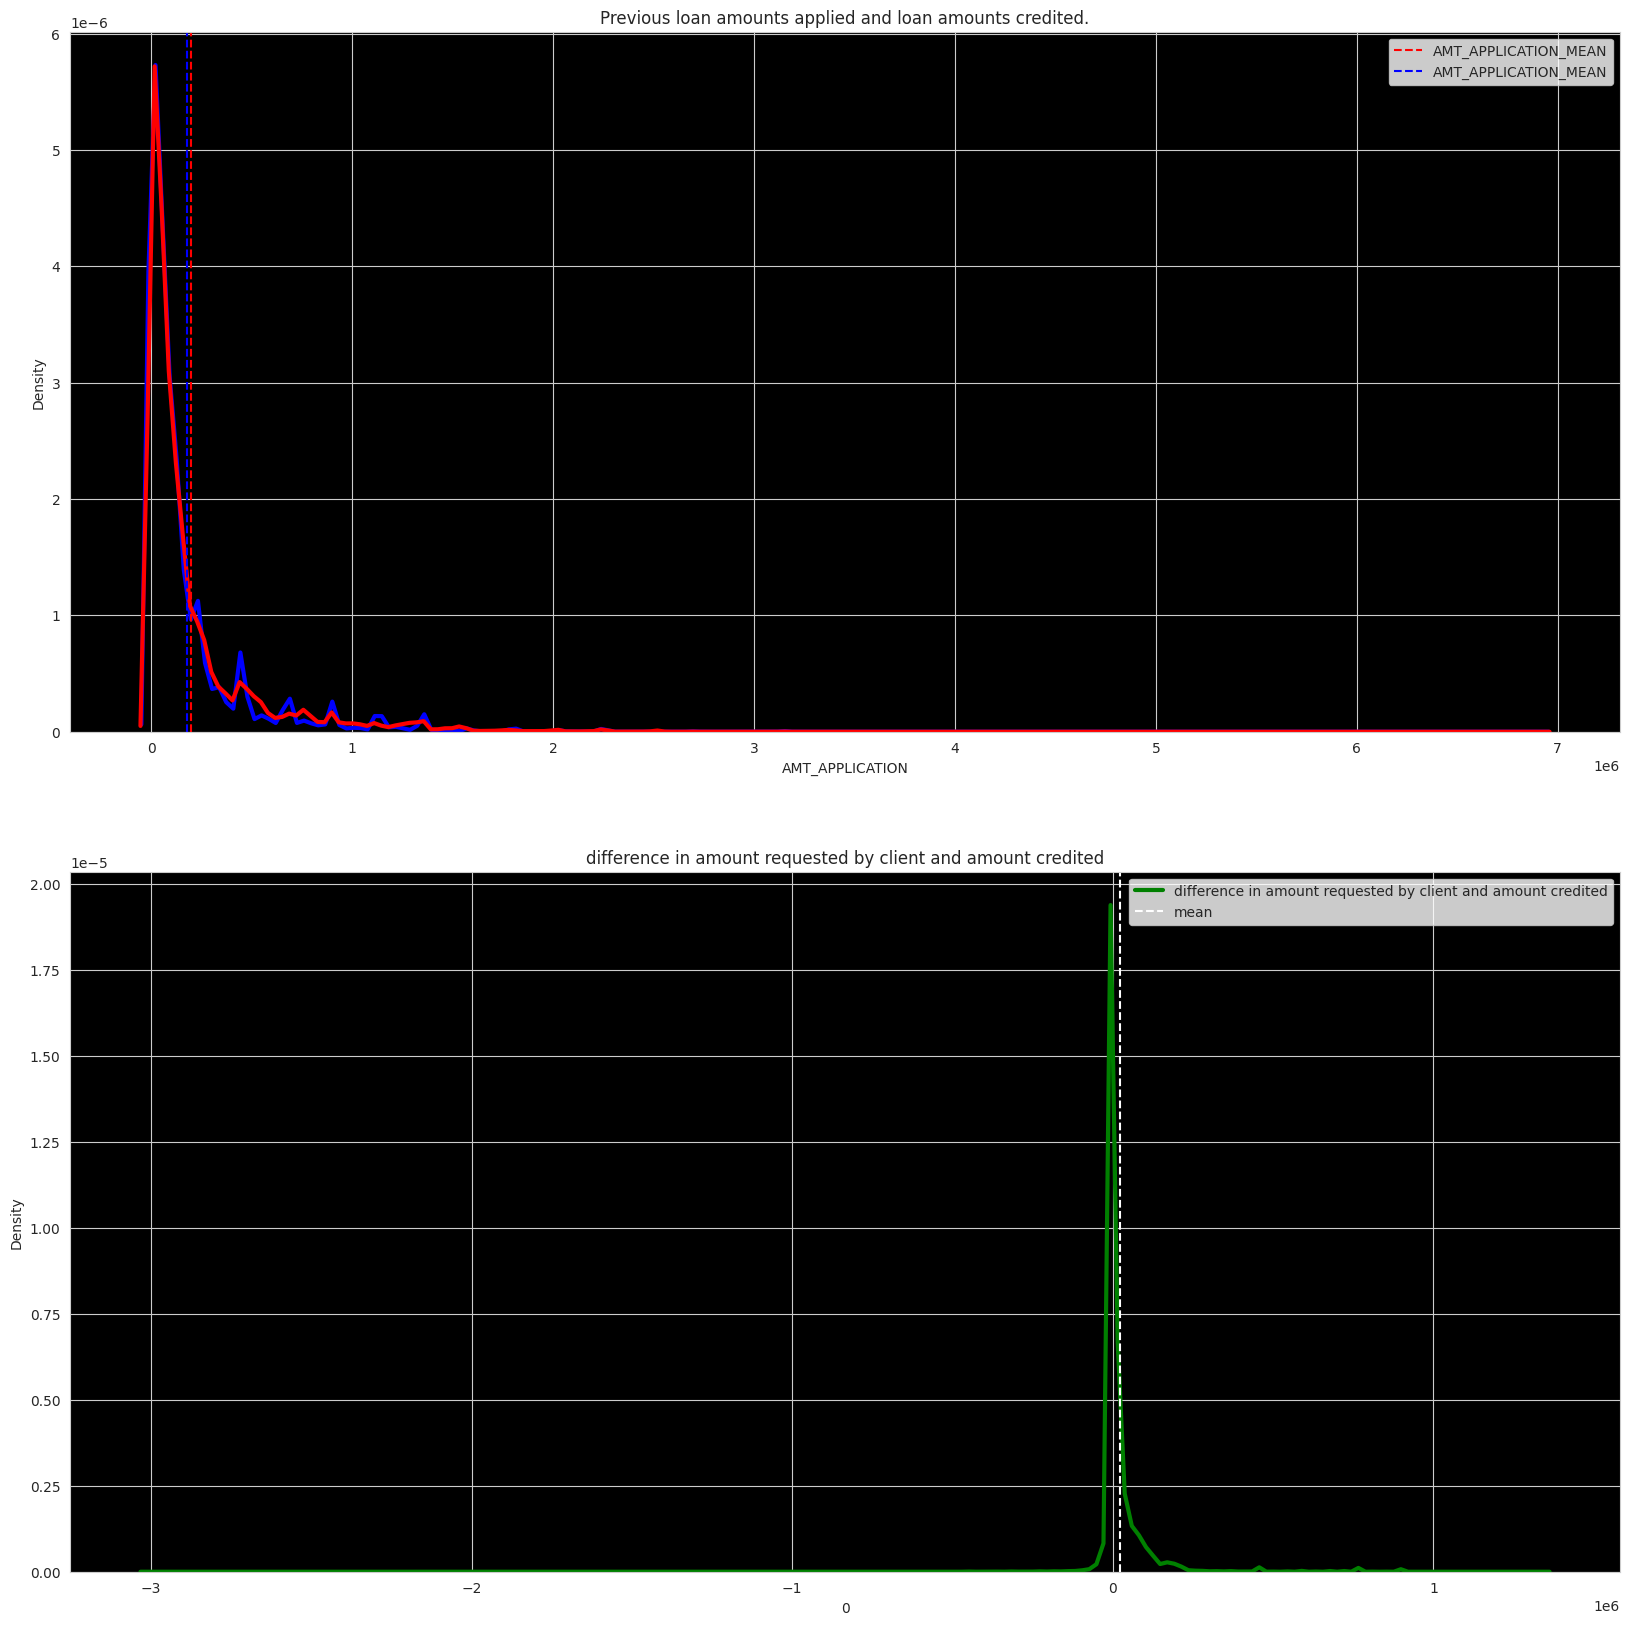

In [260]:
plt.figure(figsize=(20,20))
plt.subplot(211)
ax = sns.kdeplot(previous_application["AMT_APPLICATION"],color="b",linewidth=3)
ax = sns.kdeplot(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"],color="r",linewidth=3)
plt.axvline(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"].mean(),color="r",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.axvline(previous_application["AMT_APPLICATION"].mean(),color="b",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.legend(loc="best")
plt.title("Previous loan amounts applied and loan amounts credited.")
ax.set_facecolor("k")

plt.subplot(212)
diff = (previous_application["AMT_CREDIT"] - previous_application["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(diff[0],color="g",linewidth=3,label = "difference in amount requested by client and amount credited")
plt.axvline(diff[0].mean(),color="white",linestyle="dashed",label = "mean")
plt.title("difference in amount requested by client and amount credited")
ax1.legend(loc="best")
ax1.set_facecolor("k")

### Total and average amounts applied and credited in previous applications

AMT_APPLICATION-For how much credit did client ask on the previous application. >AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

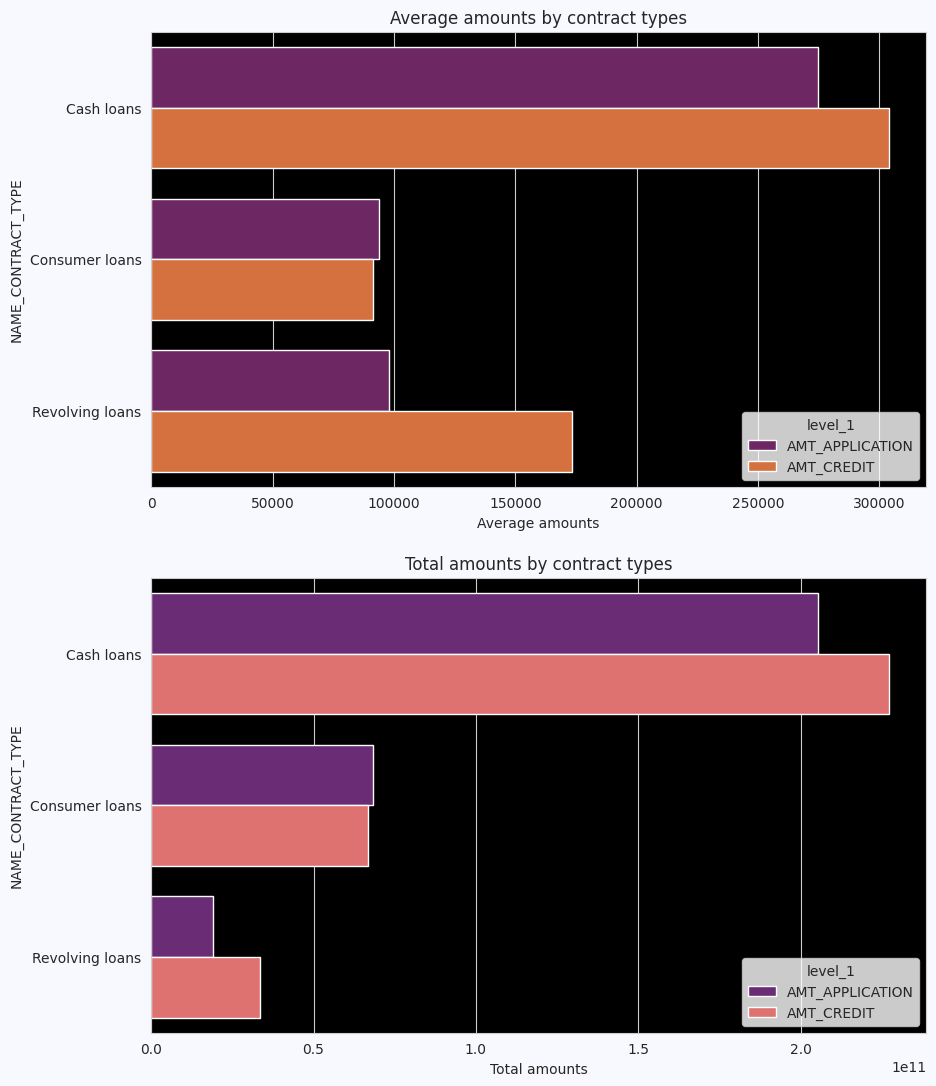

In [262]:
# mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
# tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
# fig = plt.figure(figsize=(10,13))
# fig.set_facecolor("ghostwhite")
# plt.subplot(211)
# ax = sns.barplot(0,"NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1",palette="inferno")
# ax.set_facecolor("k")
# ax.set_xlabel("average amounts")
# ax.set_title("Average amounts by contract types")

# plt.subplot(212)
# ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1",palette="magma")
# ax1.set_facecolor("k")
# ax1.set_xlabel("total amounts")
# ax1.set_title("total amounts by contract types")
# plt.subplots_adjust(hspace = .2)
# plt.show()

# Group by "NAME_CONTRACT_TYPE" and calculate mean and sum
mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION", "AMT_CREDIT"]].mean().stack().reset_index()
tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION", "AMT_CREDIT"]].sum().stack().reset_index()

# Create the figure
fig = plt.figure(figsize=(10, 13))
fig.set_facecolor("ghostwhite")

# First subplot: Average amounts by contract types
plt.subplot(211)
ax = sns.barplot(x=0, y="NAME_CONTRACT_TYPE", data=mn[:6], hue="level_1", palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("Average amounts")
ax.set_title("Average amounts by contract types")

# Second subplot: Total amounts by contract types
plt.subplot(212)
ax1 = sns.barplot(x=0, y="NAME_CONTRACT_TYPE", data=tt[:6], hue="level_1", palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("Total amounts")
ax1.set_title("Total amounts by contract types")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.2)
plt.show()

### Annuity of previous application

AMT_ANNUITY - Annuity of previous application

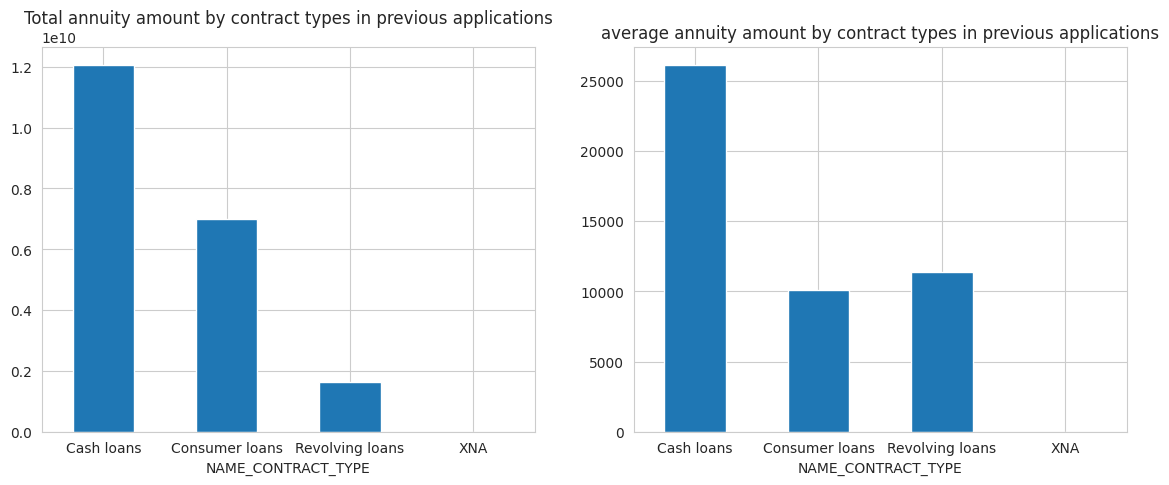

In [263]:
plt.figure(figsize=(14,5))
plt.subplot(121)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()


### Count of application status by application type.

NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.



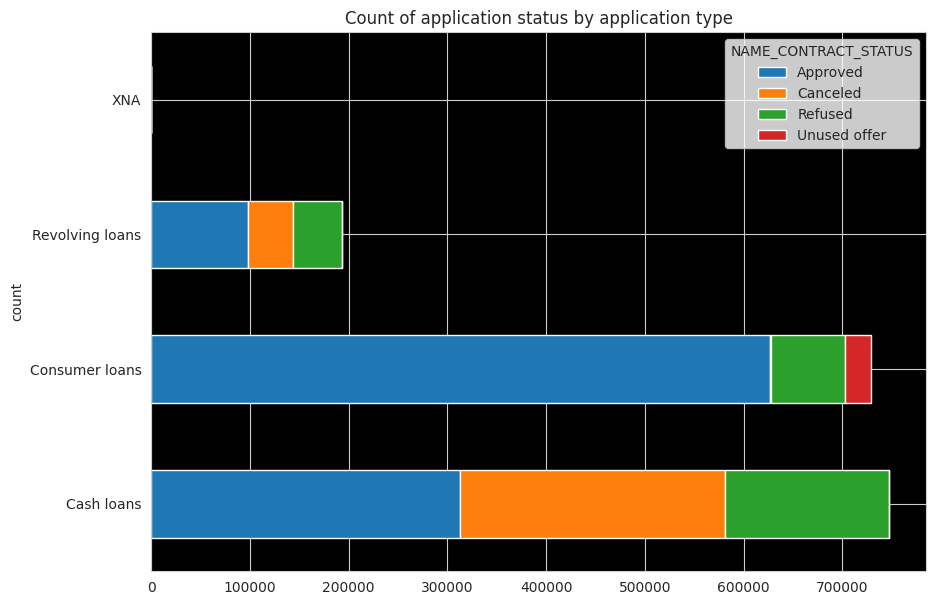

In [264]:
ax = pd.crosstab(previous_application["NAME_CONTRACT_TYPE"],previous_application["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

### Point to infer from the graph

Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

### Contract status by weekdays

WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for previous application

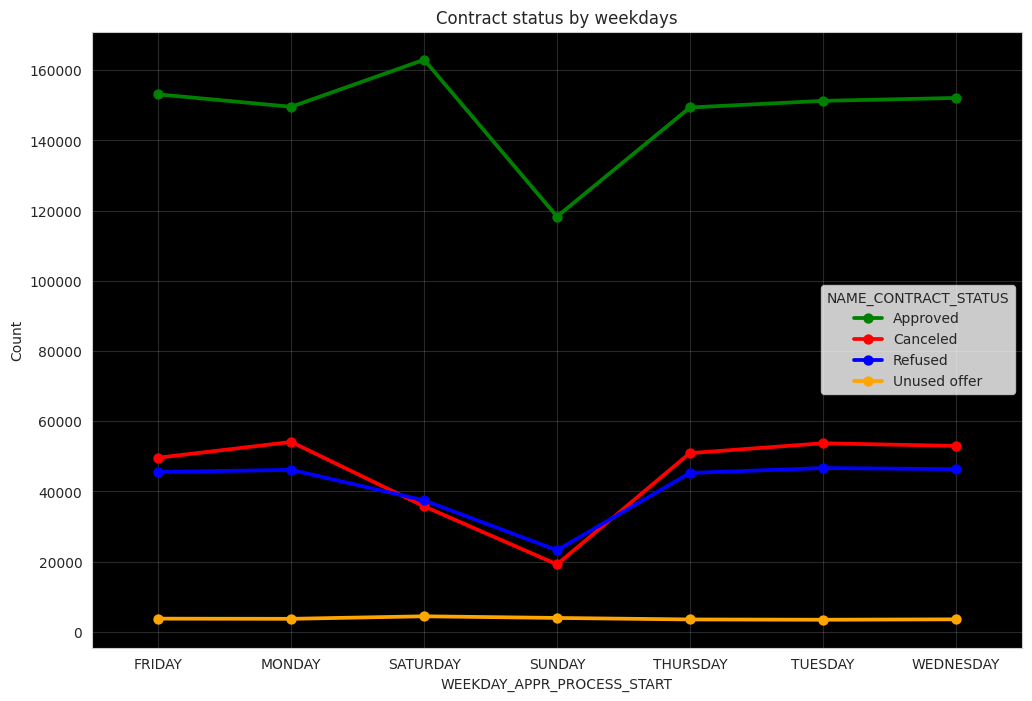

In [267]:
# hr = pd.crosstab(previous_application["WEEKDAY_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
# plt.figure(figsize=(12,8))
# ax = sns.pointplot(hr["WEEKDAY_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
# ax.set_facecolor("k")
# ax.set_ylabel("count")
# ax.set_title("Contract status by weekdays")
# plt.grid(True,alpha=.2)

# Create a cross-tabulation and stack it into a long format
hr = pd.crosstab(previous_application["WEEKDAY_APPR_PROCESS_START"], previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.pointplot(
    x="WEEKDAY_APPR_PROCESS_START",  # x-axis: Weekday
    y=0,  # y-axis: Count
    hue="NAME_CONTRACT_STATUS",  # Different lines for each contract status
    data=hr,  # Data source
    palette=["g", "r", "b", "orange"],  # Color palette
    scale=1  # Scale of the points
)
ax.set_facecolor("k")  # Set background color of the plot
ax.set_ylabel("Count")  # Label for the y-axis
ax.set_title("Contract status by weekdays")  # Title of the plot
plt.grid(True, alpha=0.2)  # Add grid lines with transparency
plt.show()

### Contract status by hour of the day

HOUR_APPR_PROCESS_START - Approximately at what day hour did the client apply for the previous application.



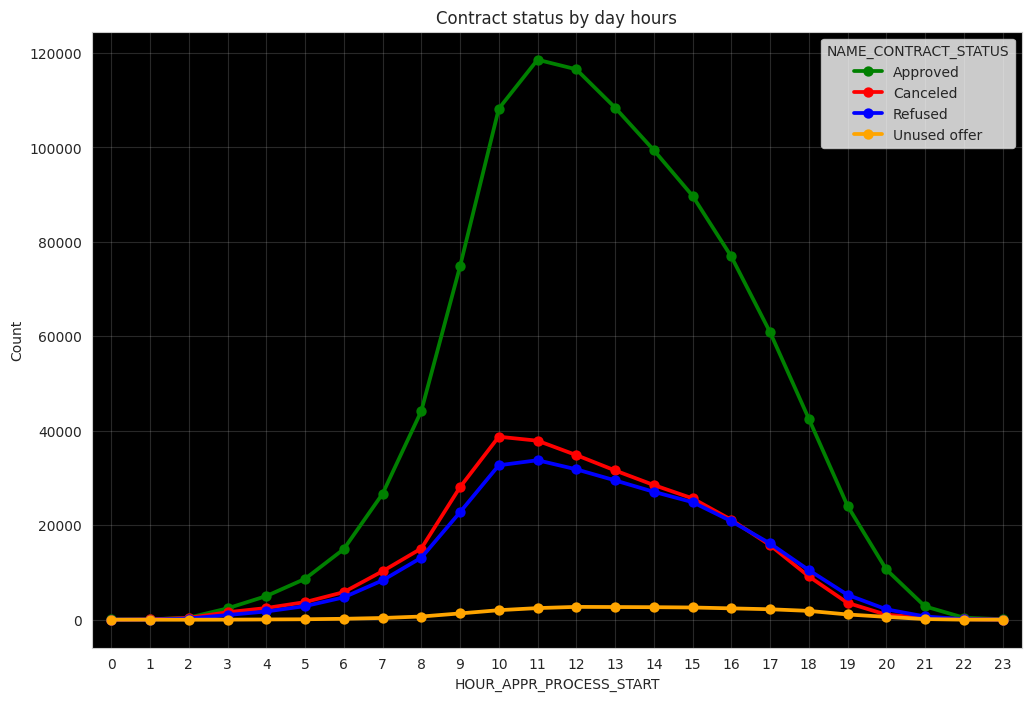

In [269]:
# hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
# plt.figure(figsize=(12,8))
# ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
# ax.set_facecolor("k")
# ax.set_ylabel("count")
# ax.set_title("Contract status by day hours.")
# plt.grid(True,alpha=.2)

# Create a cross-tabulation and stack it into a long format
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"], previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.pointplot(
    x="HOUR_APPR_PROCESS_START",  # x-axis: Hour of the day
    y=0,  # y-axis: Count
    hue="NAME_CONTRACT_STATUS",  # Different lines for each contract status
    data=hr,  # Data source
    palette=["g", "r", "b", "orange"],  # Color palette
    scale=1  # Scale of the points
)
ax.set_facecolor("k")  # Set background color of the plot
ax.set_ylabel("Count")  # Label for the y-axis
ax.set_title("Contract status by day hours")  # Title of the plot
plt.grid(True, alpha=0.2)  # Add grid lines with transparency
plt.show()

### Point to infer from the graph

Morning 11'o clock have maximum number of approvals.

Morning 10'o clock have maximum number of refused and cancelled contracts.

### Peak hours for week days for applying loans.

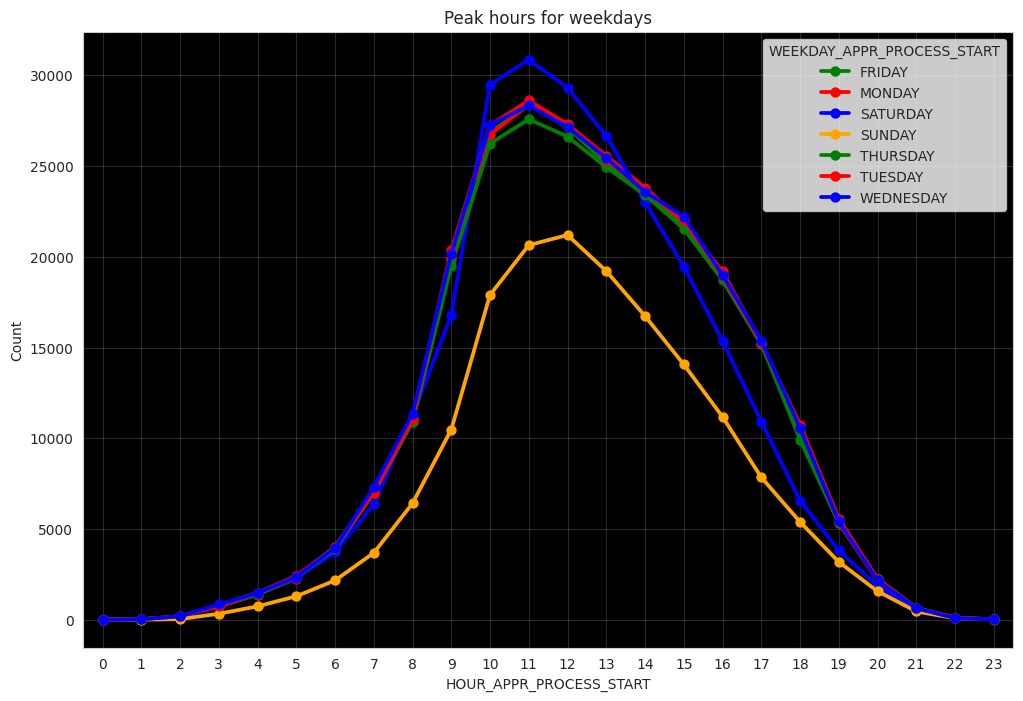

In [271]:
# hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
# plt.figure(figsize=(12,8))
# ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START"],palette=["g","r","b","orange"],scale=1)
# ax.set_facecolor("k")
# ax.set_ylabel("count")
# ax.set_title("Peak hours for week days")
# plt.grid(True,alpha=.2)

# Create a cross-tabulation and stack it into a long format
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"], previous_application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.pointplot(
    x="HOUR_APPR_PROCESS_START",  # x-axis: Hour of the day
    y=0,  # y-axis: Count
    hue="WEEKDAY_APPR_PROCESS_START",  # Different lines for each weekday
    data=hr,  # Data source
    palette=["g", "r", "b", "orange"],  # Color palette
    scale=1  # Scale of the points
)
ax.set_facecolor("k")  # Set background color of the plot
ax.set_ylabel("Count")  # Label for the y-axis
ax.set_title("Peak hours for weekdays")  # Title of the plot
plt.grid(True, alpha=0.2)  # Add grid lines with transparency
plt.show()


### Percentage of applications accepted,cancelled,refused and unused for different loan purposes.

NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application.



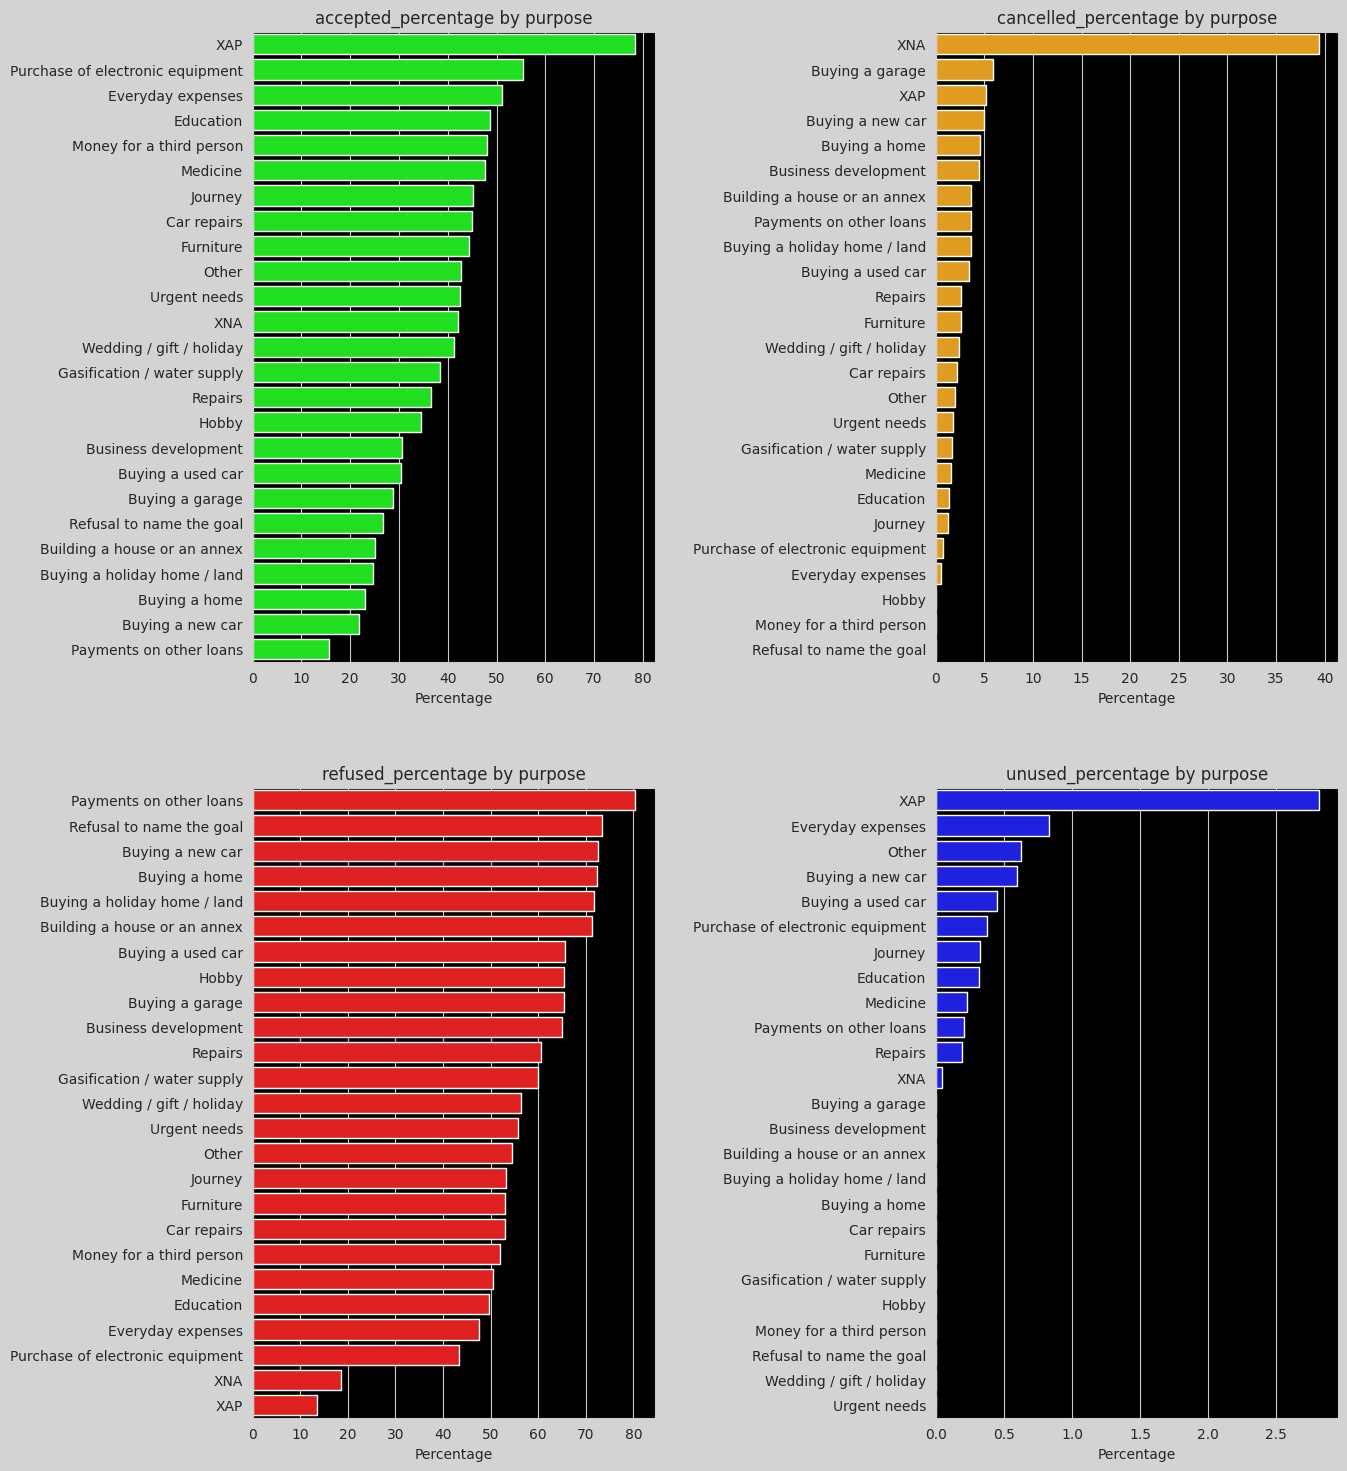

In [273]:
# previous_application[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
# purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"],previous_application["NAME_CONTRACT_STATUS"])
# purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
# purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
# purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
# purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
# purpose_new = purpose[["a","c","r","u"]]
# purpose_new = purpose_new.stack().reset_index()
# purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
#                                                                "r":"refused_percentage","u":"unused_percentage"})

# lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
# length = len(lst)
# cs = ["lime","orange","r","b"]

# fig = plt.figure(figsize=(14,18))
# fig.set_facecolor("lightgrey")
# for i,j,k in itertools.zip_longest(lst,range(length),cs):
#     plt.subplot(2,2,j+1)
#     dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
#     ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
#     plt.ylabel("")
#     plt.xlabel("percentage")
#     plt.title(i+" by purpose")
#     plt.subplots_adjust(wspace = .7)
#     ax.set_facecolor("k")

# Create a cross-tabulation of loan purposes and contract statuses
purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"], previous_application["NAME_CONTRACT_STATUS"])

# Calculate percentages for each contract status
purpose["a"] = (purpose["Approved"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])
purpose["r"] = (purpose["Refused"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])

# Select only the percentage columns and stack them into a long format
purpose_new = purpose[["a", "c", "r", "u"]].stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({
    "a": "accepted_percentage",
    "c": "cancelled_percentage",
    "r": "refused_percentage",
    "u": "unused_percentage"
})

# Get unique contract statuses and define colors
lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime", "orange", "r", "b"]

# Create the plot
fig = plt.figure(figsize=(14, 18))
fig.set_facecolor("lightgrey")

for i, j, k in itertools.zip_longest(lst, range(length), cs):
    plt.subplot(2, 2, j + 1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(
        x=0,  # x-axis: Percentage
        y="NAME_CASH_LOAN_PURPOSE",  # y-axis: Loan purpose
        data=dat.sort_values(by=0, ascending=False),  # Data source
        color=k  # Color for the bars
    )
    plt.ylabel("")
    plt.xlabel("Percentage")
    plt.title(i + " by purpose")
    plt.subplots_adjust(wspace=0.7)
    ax.set_facecolor("k")  # Set background color of the plot

plt.show()

### Point to infer from the graph
Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

40% of XNA purpose loans are cancalled.

### Contract status relative to decision made about previous application.

DAYS_DECISION - Relative to current application when was the decision about previous application made.



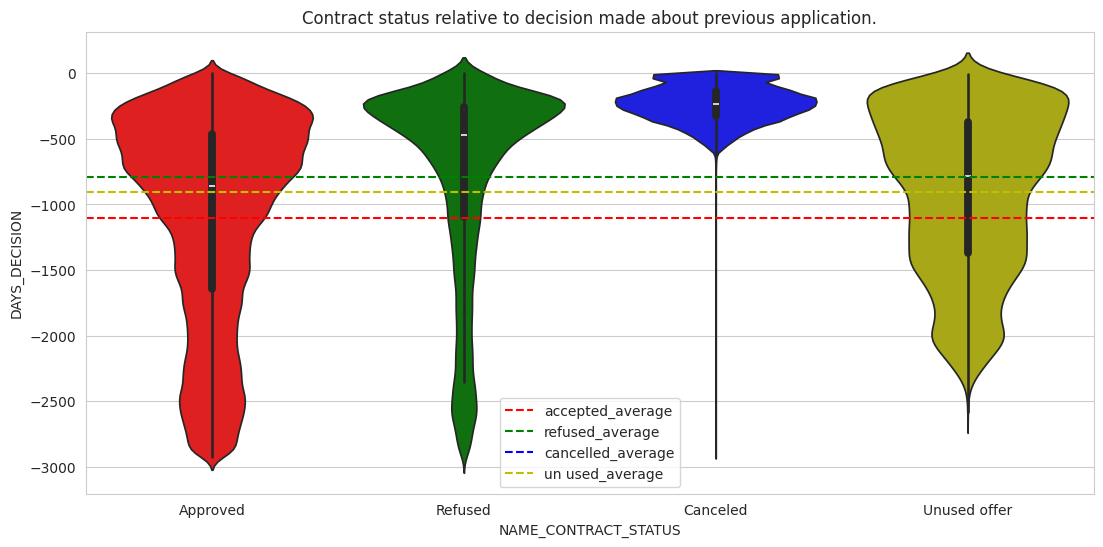

In [274]:
plt.figure(figsize=(13,6))
sns.violinplot(y= previous_application["DAYS_DECISION"],
               x = previous_application["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

### Point to infer from the graph

On average approved contract types have higher number of decision days compared to cancelled and refused contracts.


### Client payment methods & reasons for application rejections

NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

CODE_REJECT_REASON - Why was the previous application rejected.



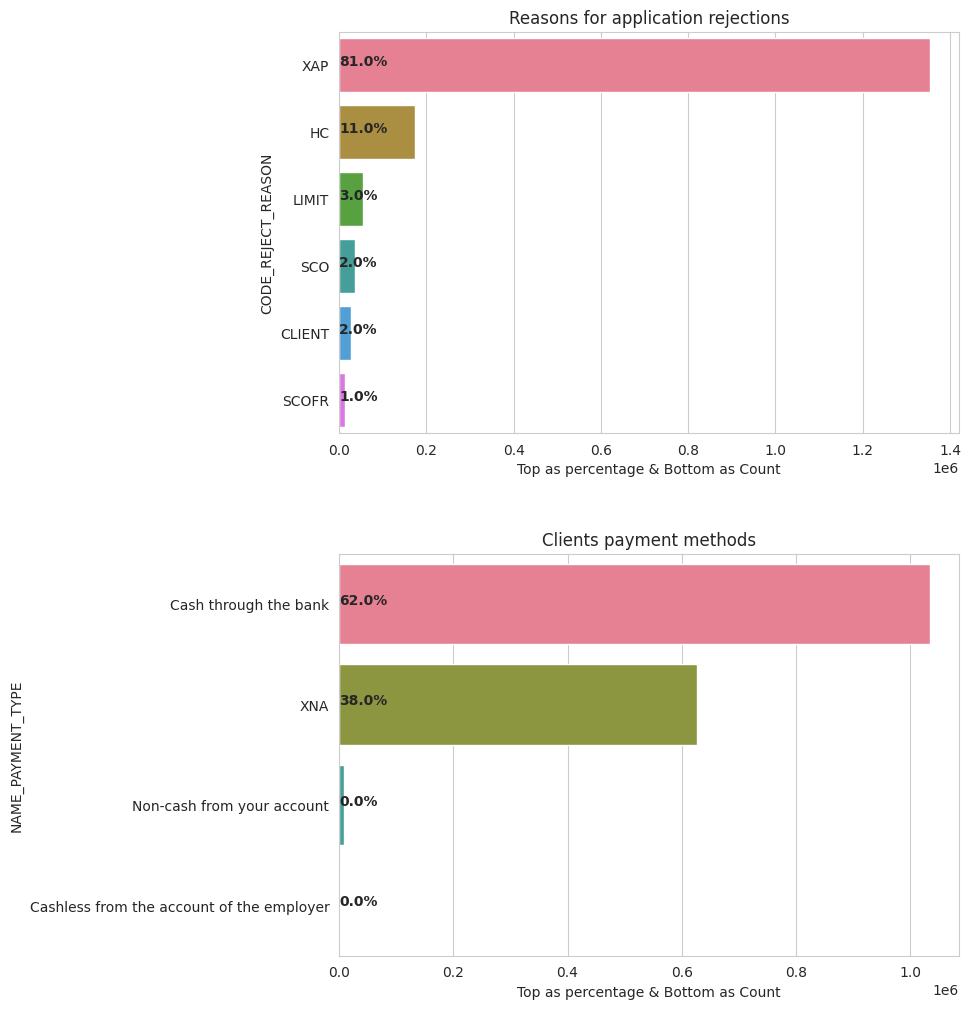

In [283]:
# # plt.figure(figsize=(8,12))
# # plt.subplot(211)
# # rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
# # ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
# # for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
# #     ax.text(.7,i,j,weight="bold")
# # plt.xlabel("Top as percentage & Bottom as Count")
# # plt.ylabel("CODE_REJECT_REASON")
# # plt.title("Reasons for application rejections")

# # plt.subplot(212)
# # pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
# # ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
# # for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
# #     ax1.text(.7,i,j,weight="bold")
# # plt.xlabel("pTop as percentage & Bottom as Count")
# # plt.ylabel("NAME_PAYMENT_TYPE")
# # plt.title("Clients payment methods")
# # plt.subplots_adjust(hspace = .3)

# plt.figure(figsize=(8, 12))

# # First subplot: Reasons for application rejections
# plt.subplot(211)
# rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
# ax = sns.barplot(
#     x="CODE_REJECT_REASON",  # x-axis: Count of rejections
#     y="index",  # y-axis: Rejection reasons
#     data=rej[:6],  # Data source (top 6 reasons)
#     palette="husl"  # Color palette
# )
# # Add percentage labels to the bars
# for i, j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values * 100 / (rej["CODE_REJECT_REASON"][:6].sum())))):
#     ax.text(0.7, i, f"{j}%", weight="bold")
# plt.xlabel("Top as percentage & Bottom as Count")
# plt.ylabel("CODE_REJECT_REASON")
# plt.title("Reasons for application rejections")

# # Second subplot: Clients' payment methods
# plt.subplot(212)
# pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
# ax1 = sns.barplot(
#     x="NAME_PAYMENT_TYPE",  # x-axis: Count of payment types
#     y="index",  # y-axis: Payment types
#     data=pay,  # Data source
#     palette="husl"  # Color palette
# )
# # Add percentage labels to the bars
# for i, j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values * 100 / (pay["NAME_PAYMENT_TYPE"].sum())))):
#     ax1.text(0.7, i, f"{j}%", weight="bold")
# plt.xlabel("Top as percentage & Bottom as Count")
# plt.ylabel("NAME_PAYMENT_TYPE")
# plt.title("Clients payment methods")

# # Adjust subplot spacing
# plt.subplots_adjust(hspace=0.3)
# plt.show()

plt.figure(figsize=(8, 12))

# First subplot: Reasons for application rejections
plt.subplot(211)
rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
rej.columns = ["CODE_REJECT_REASON", "count"]  # Rename columns for clarity
ax = sns.barplot(
    x="count",  # x-axis: Count of rejections
    y="CODE_REJECT_REASON",  # y-axis: Rejection reasons
    data=rej[:6],  # Data source (top 6 reasons)
    palette="husl"  # Color palette
)
# Add percentage labels to the bars
for i, j in enumerate(np.around((rej["count"][:6].values * 100 / (rej["count"][:6].sum())))):
    ax.text(0.7, i, f"{j}%", weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

# Second subplot: Clients' payment methods
plt.subplot(212)
pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
pay.columns = ["NAME_PAYMENT_TYPE", "count"]  # Rename columns for clarity
ax1 = sns.barplot(
    x="count",  # x-axis: Count of payment types
    y="NAME_PAYMENT_TYPE",  # y-axis: Payment types
    data=pay,  # Data source
    palette="husl"  # Color palette
)
# Add percentage labels to the bars
for i, j in enumerate(np.around((pay["count"].values * 100 / (pay["count"].sum())))):
    ax1.text(0.7, i, f"{j}%", weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.3)
plt.show()

### Point to infer from the graph

Around 81% of rejected applications the reason is XAP.

62% of chose to pay through cash by bank for previous applications.


#### Distribution in Client suite type & client type.

NAME_TYPE_SUITE - Who accompanied client when applying for the previous application.

NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application.



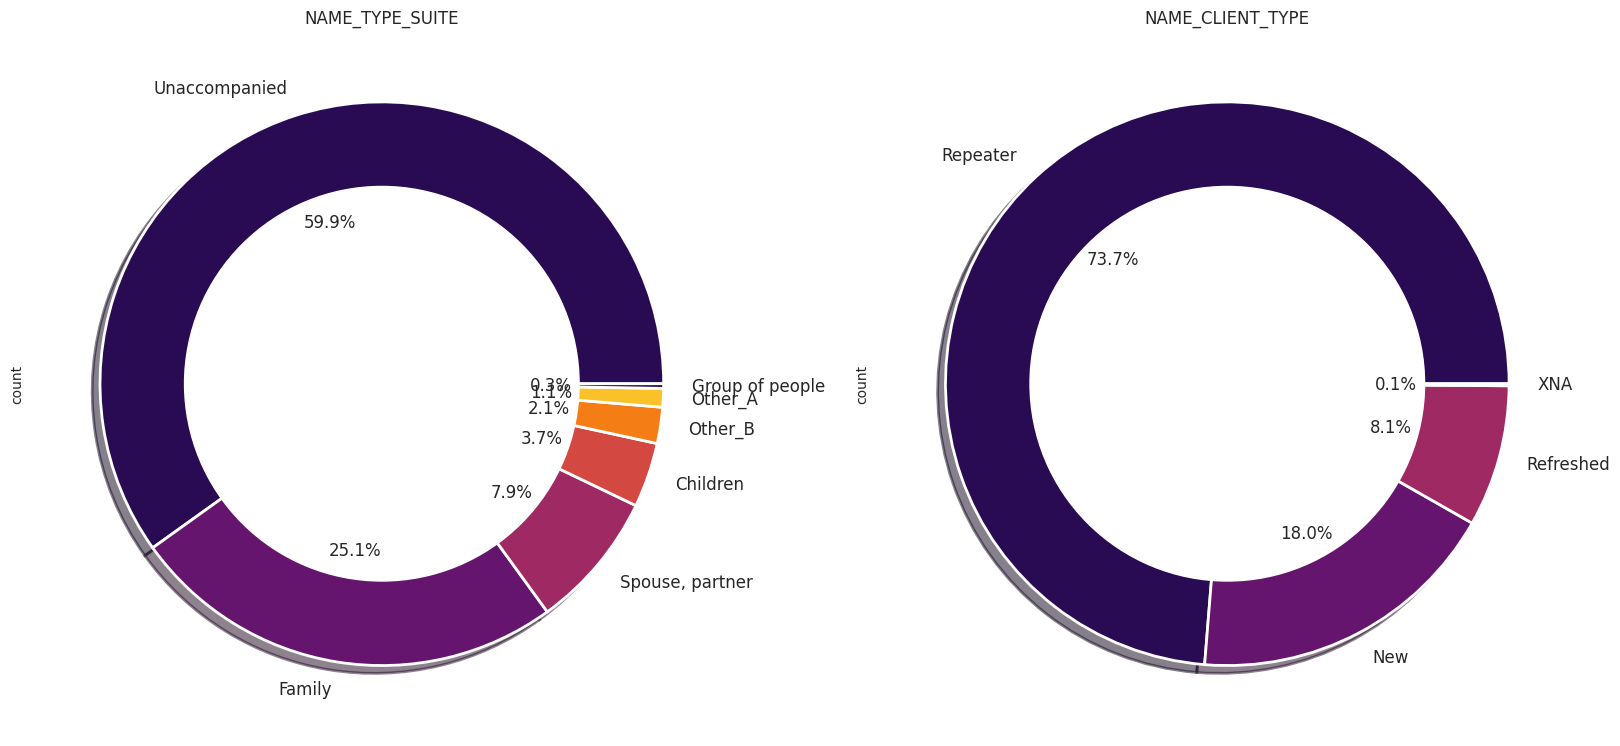

In [284]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

### Point to infer from the graph
About 60% clients are un-accompained when applying for loans.

73% clients are old clients


## Popular goods for applying loans

NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application.



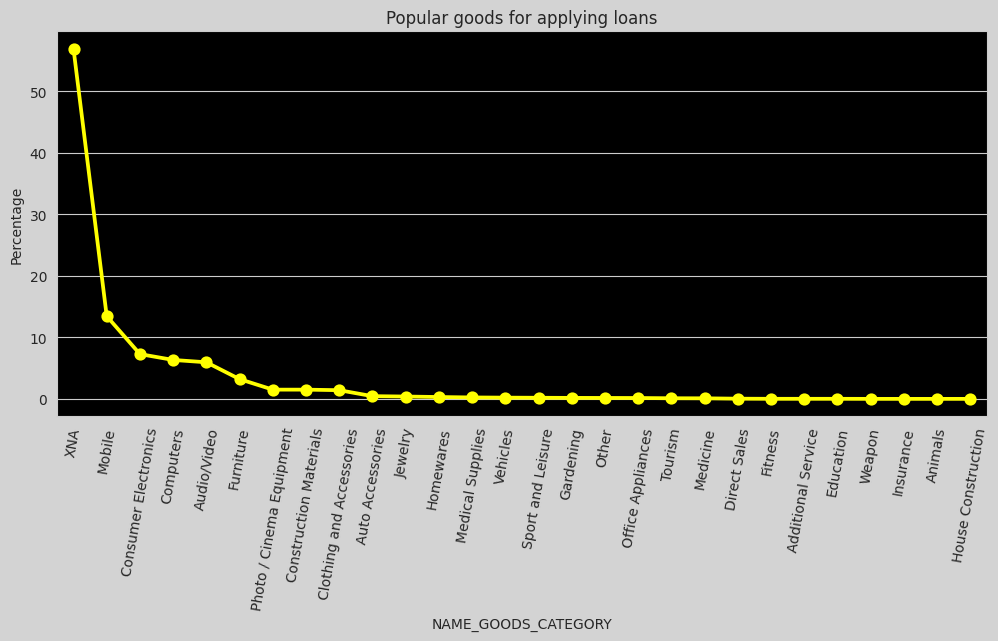

In [286]:
# goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
# goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
# fig = plt.figure(figsize=(12,5))
# ax = sns.pointplot("index","percentage",data=goods,color="yellow")
# plt.xticks(rotation = 80)
# plt.xlabel("NAME_GOODS_CATEGORY")
# plt.ylabel("percentage")
# plt.title("popular goods for applying loans")
# ax.set_facecolor("k")
# fig.set_facecolor('lightgrey')

# Calculate value counts and reset index
goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()

# Rename columns for clarity
goods.columns = ["NAME_GOODS_CATEGORY", "count"]

# Ensure the "count" column is numeric
goods["count"] = goods["count"].astype(float)

# Calculate percentages
goods["percentage"] = round(goods["count"] * 100 / goods["count"].sum(), 2)

# Create the plot
fig = plt.figure(figsize=(12, 5))
ax = sns.pointplot(
    x="NAME_GOODS_CATEGORY",  # x-axis: Goods category
    y="percentage",  # y-axis: Percentage
    data=goods,  # Data source
    color="yellow"  # Color of the points
)

# Customize the plot
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("Percentage")
plt.title("Popular goods for applying loans")
ax.set_facecolor("k")  # Set background color of the plot
fig.set_facecolor("lightgrey")  # Set background color of the figure

# Show the plot
plt.show()

### Point to infer from the graph
XNA ,Mobiles ,Computers and consumer electronics are popular goods for applying loans


### Previous applications portfolio and product types

NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …

NAME_PRODUCT_TYPE - Was the previous application x-sell o walk-in.

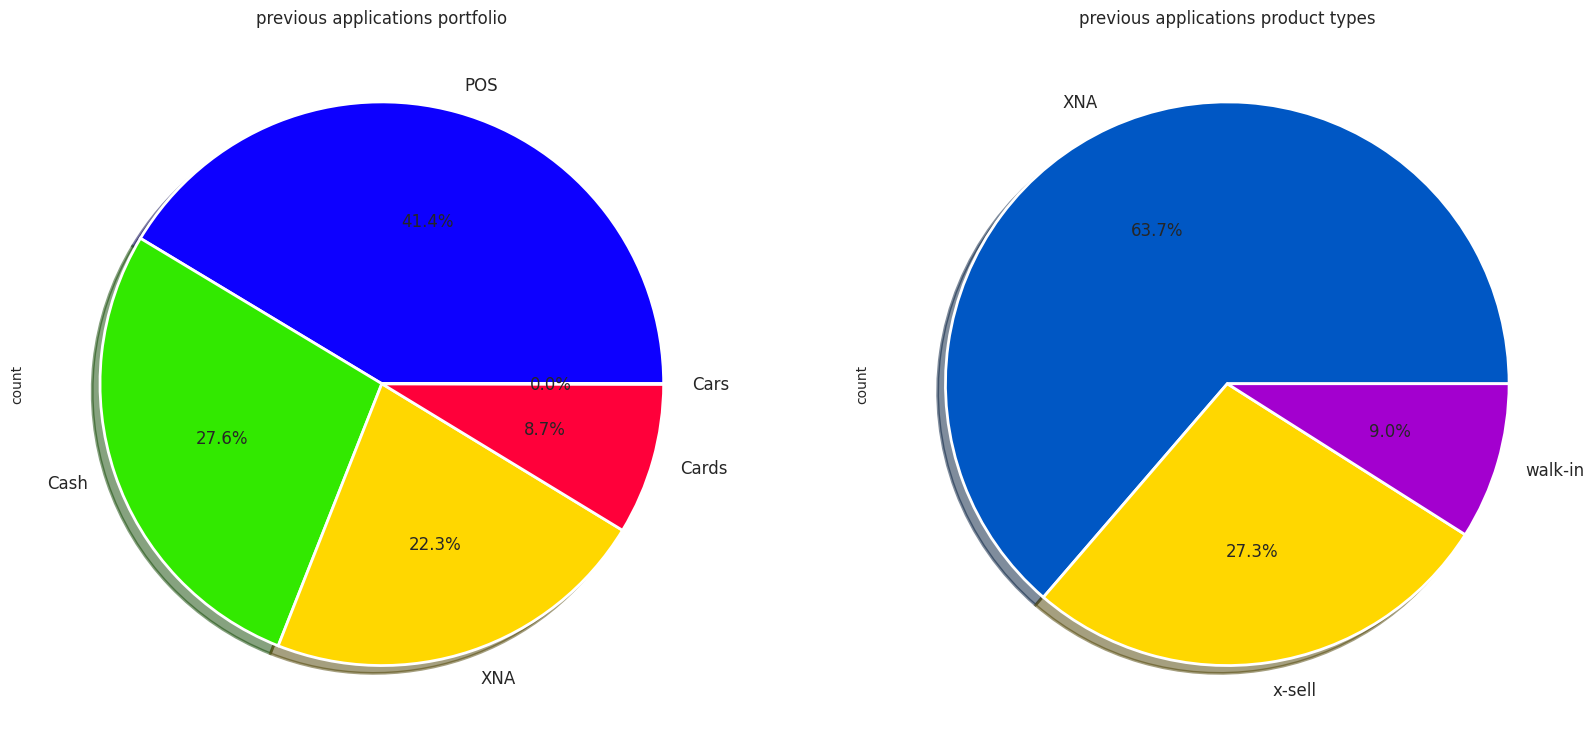

In [287]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()


### Approval,canceled and refusal rates by channel types.

CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

NAME_CONTRACT_STATUS- Contract status (approved, cancelled, ...) of previous application.



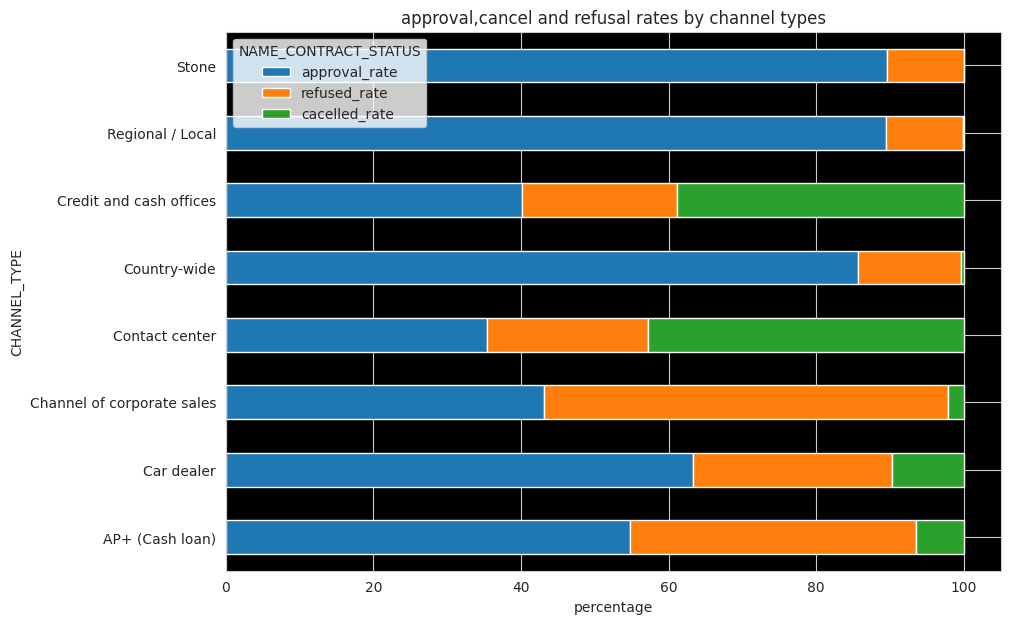

In [288]:
app = pd.crosstab(previous_application["CHANNEL_TYPE"],previous_application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

### Point to infer from the graph

Channel types like Stone ,regional and country-wide have maximum approval rates.

Channel of coorporate sales have maximum refusal rate.

Credit-cash centres and Contact centres have maximum cancellation rates.

### Highest amount credited seller areas and industries.

SELLERPLACE_AREA - Selling area of seller place of the previous application.

NAME_SELLER_INDUSTRY - The industry of the seller.

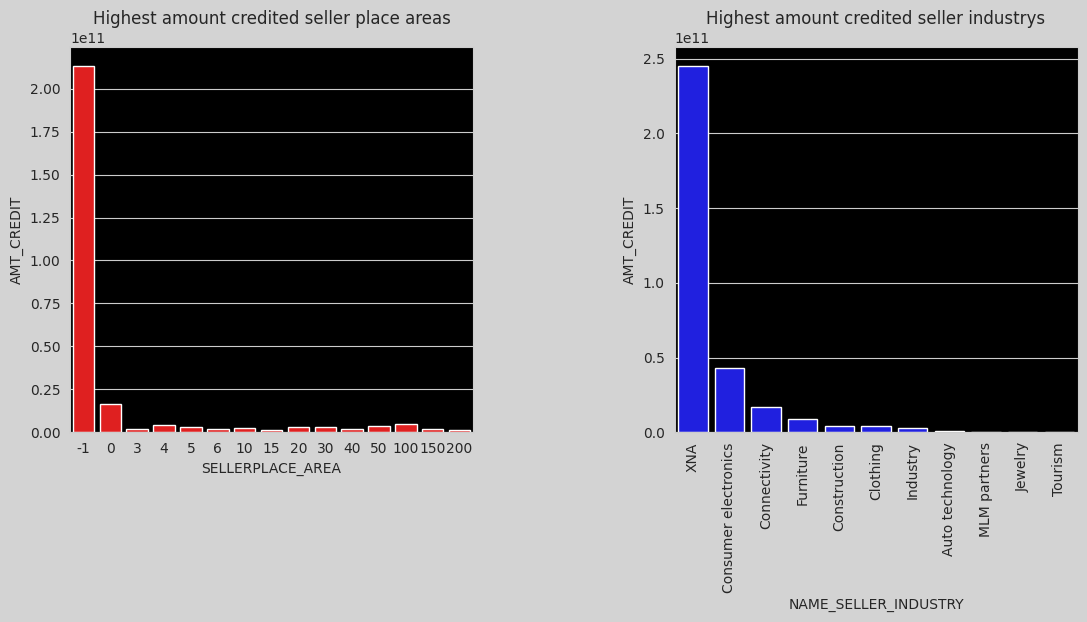

In [289]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = previous_application.groupby("SELLERPLACE_AREA")["AMT_CREDIT"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT",x ="SELLERPLACE_AREA",data=are[:15],color="r")
ax.set_facecolor("k")
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = previous_application.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum().reset_index().sort_values(by = "AMT_CREDIT",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT",x = "NAME_SELLER_INDUSTRY",data=sell,color="b")
ax1.set_facecolor("k")
ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")


### Popular terms of previous credit at application.

CNT_PAYMENT - Term of previous credit at application of the previous application.



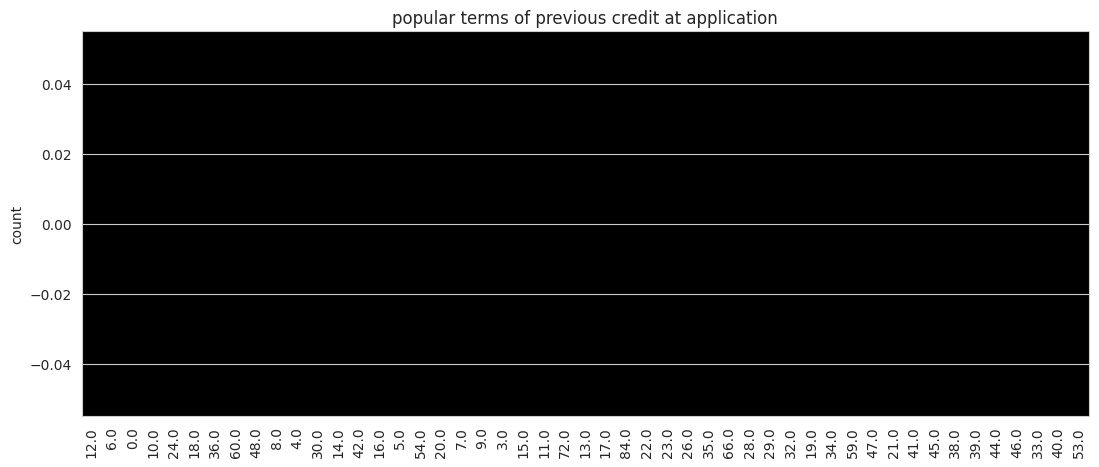

In [290]:
plt.figure(figsize=(13,5))
ax = sns.countplot(previous_application["CNT_PAYMENT"],palette="Set1",order=previous_application["CNT_PAYMENT"].value_counts().index)
ax.set_facecolor("k")
plt.xticks(rotation = 90)
plt.title("popular terms of previous credit at application")
plt.show()

### Point to infer from the graph

Popular term of previous credit are 6months ,10months ,1year ,2years & 3 years.

### Detailed product combination of the previous application

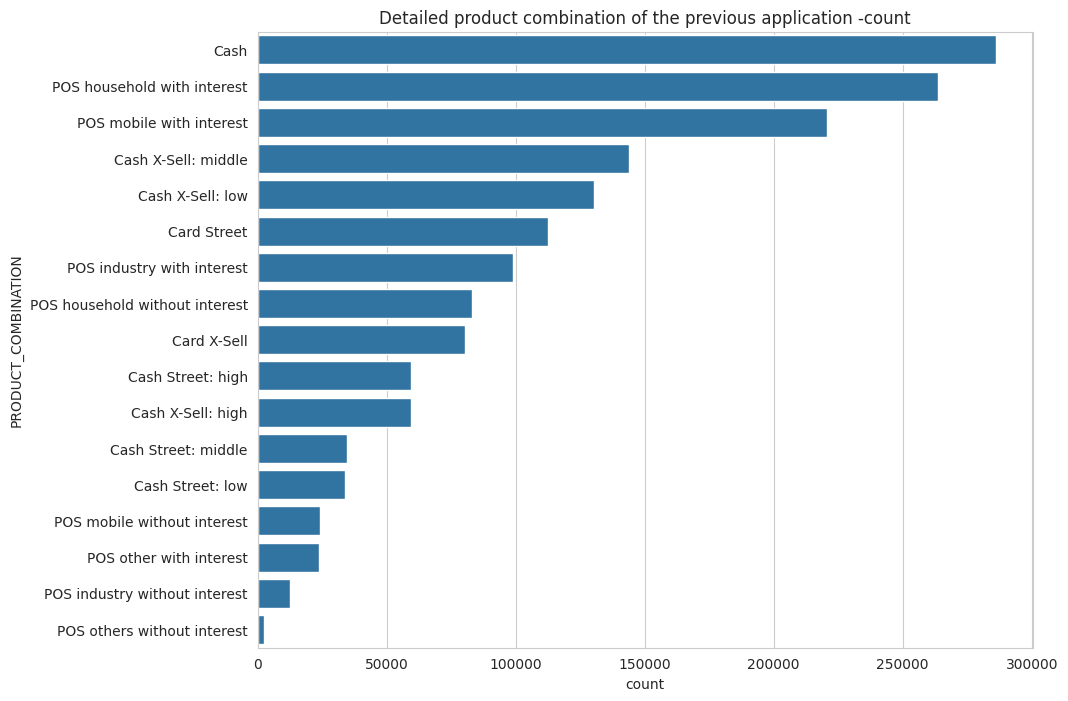

In [291]:
plt.figure(figsize=(10,8))
sns.countplot(y = previous_application["PRODUCT_COMBINATION"],order=previous_application["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()


### Frequency distribution of intrest rates and client insurance requests

NAME_YIELD_GROUP - Grouped interest rate into small medium and high of the previous application.

NFLAG_INSURED_ON_APPROVAL - Did the client requested insurance during the previous application.

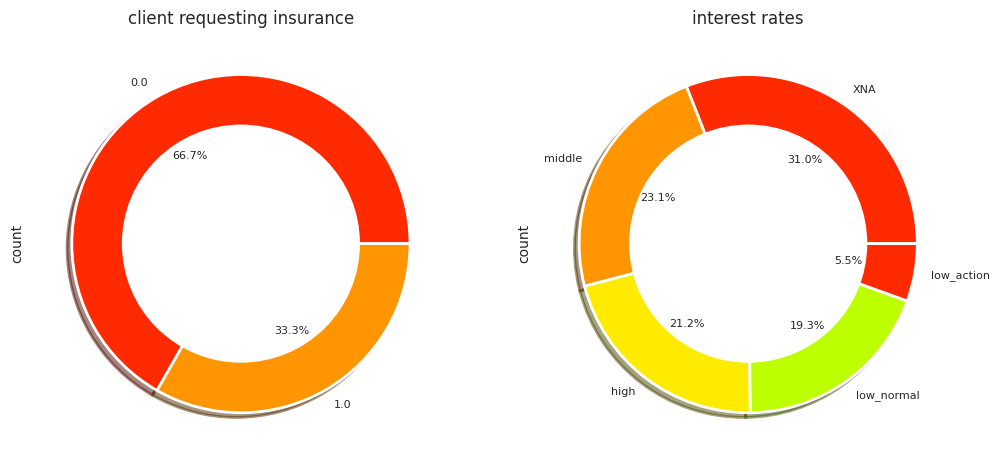

In [292]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
previous_application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

### Days variables - Relative to application date of current application

DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

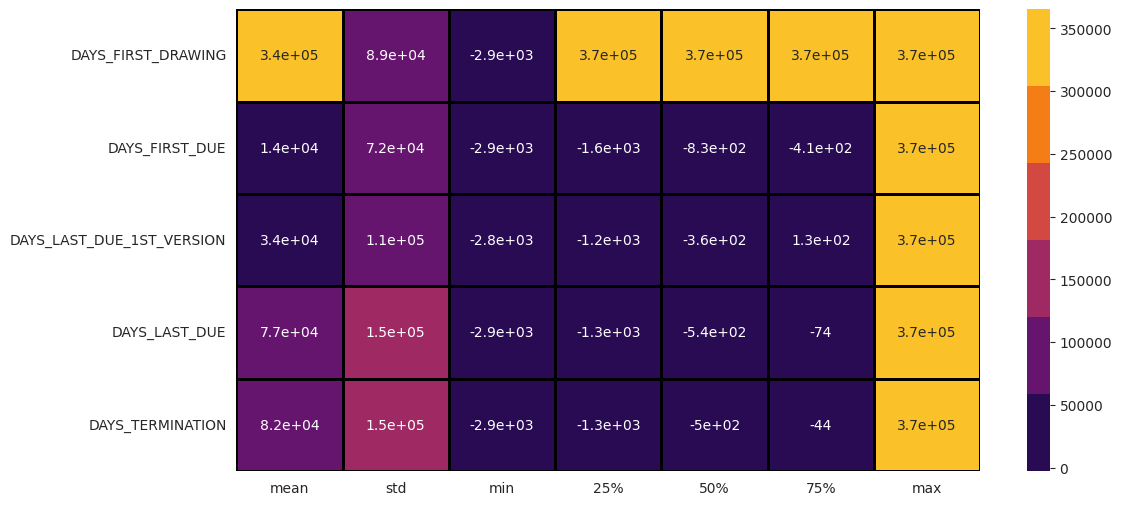

In [293]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

# Corelation between variables


### Application Data

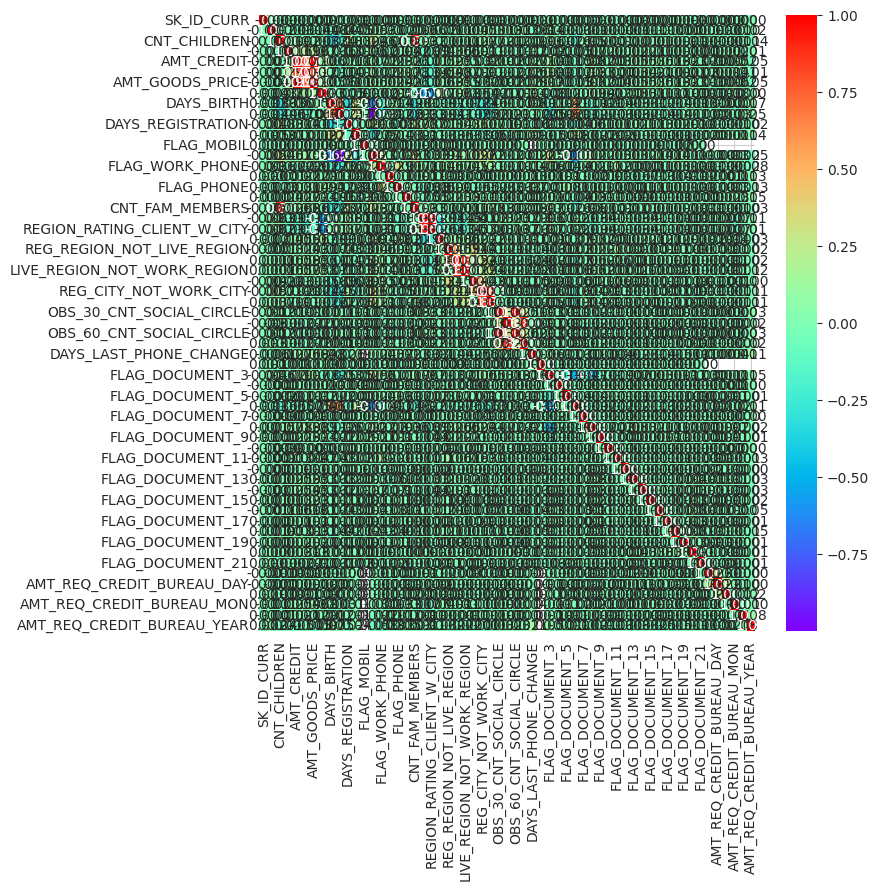

In [296]:
# corrmat = application_data.corr()

# f, ax = plt.subplots(figsize =(8, 8))
# sns.heatmap(corrmat, ax = ax, cmap ="rainbow")
# plt.show()

# Select only numeric columns for correlation calculation
numeric_data = application_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, ax=ax, cmap="rainbow", annot=True, fmt=".2f")  # Add annotations for better readability
plt.show()


# Previous Application

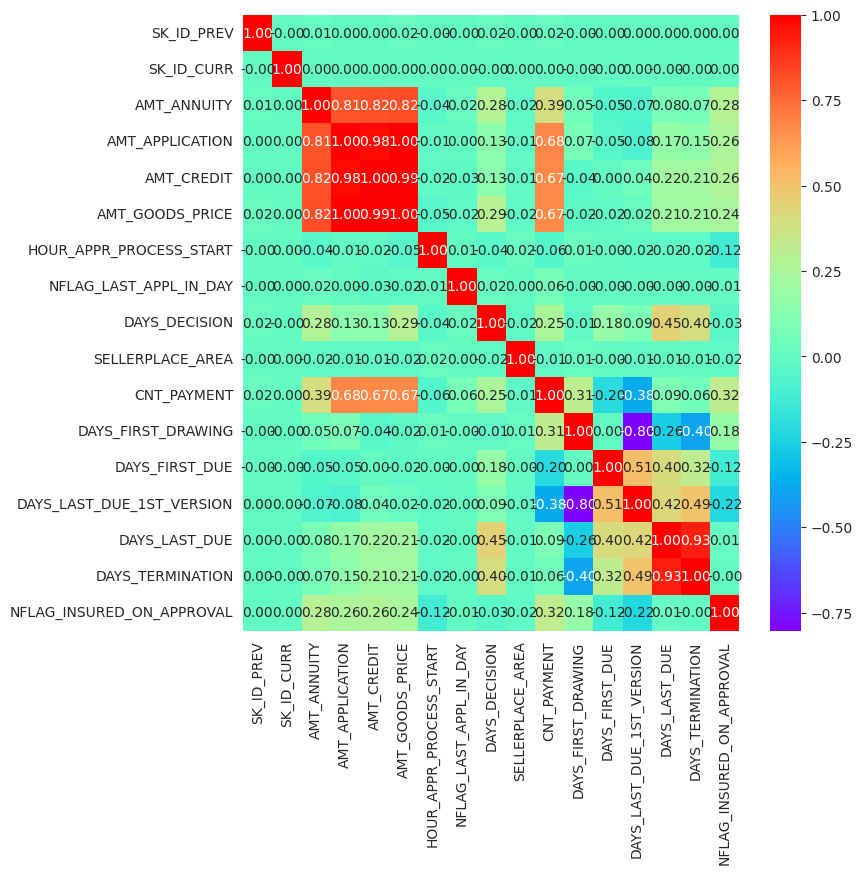

In [298]:
# corrmat = previous_application.corr()

# f, ax = plt.subplots(figsize =(8, 8))
# sns.heatmap(corrmat, ax = ax, cmap ="rainbow")
# plt.show()

# Select only numeric columns for correlation calculation
numeric_data = previous_application.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, ax=ax, cmap="rainbow", annot=True, fmt=".2f")  # Add annotations for better readability
plt.show()

In [302]:
# corrmat = previous_application.corr()
# corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
# corrdf = corrdf.unstack().reset_index()
# corrdf.columns = ['Var1', 'Var2', 'Correlation']
# corrdf.dropna(subset = ['Correlation'], inplace = True)
# corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# corrdf['Correlation'] = abs(corrdf['Correlation'])
# corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

# Select only numeric columns for correlation calculation
numeric_data = previous_application.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Extract the upper triangle of the correlation matrix (excluding the diagonal)
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix into a DataFrame
corrdf = corrdf.unstack().reset_index()

# Rename columns for clarity
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values in the 'Correlation' column
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values to 2 decimal places
corrdf['Correlation'] = round(corrdf['Correlation'], 2)

# Take the absolute value of the correlation
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort by correlation in descending order and display the top 10
top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)
print(top_correlations)

                          Var1                Var2  Correlation
88             AMT_GOODS_PRICE     AMT_APPLICATION         1.00
89             AMT_GOODS_PRICE          AMT_CREDIT         0.99
71                  AMT_CREDIT     AMT_APPLICATION         0.98
269           DAYS_TERMINATION       DAYS_LAST_DUE         0.93
70                  AMT_CREDIT         AMT_ANNUITY         0.82
87             AMT_GOODS_PRICE         AMT_ANNUITY         0.82
53             AMT_APPLICATION         AMT_ANNUITY         0.81
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         0.80
173                CNT_PAYMENT     AMT_APPLICATION         0.68
174                CNT_PAYMENT          AMT_CREDIT         0.67


# Application Data


## Top 10 Correlation Fields for Repayer

In [303]:
df_repayer = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [305]:
# corrmat = df_repayer.corr()
# corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
# corrdf = corrdf.unstack().reset_index()
# corrdf.columns = ['Var1', 'Var2', 'Correlation']
# corrdf.dropna(subset = ['Correlation'], inplace = True)
# corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# corrdf['Correlation'] = abs(corrdf['Correlation'])
# corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

# Select only numeric columns for correlation calculation
numeric_data = df_repayer.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Extract the upper triangle of the correlation matrix (excluding the diagonal)
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix into a DataFrame
corrdf = corrdf.unstack().reset_index()

# Rename columns for clarity
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values in the 'Correlation' column
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values to 2 decimal places
corrdf['Correlation'] = round(corrdf['Correlation'], 2)

# Take the absolute value of the correlation
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort by correlation in descending order and display the top 10
top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)
print(top_correlations)

                             Var1                        Var2  Correlation
1798     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
776                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
358               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
1199  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
1064              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1858     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1619      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
359               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
299                   AMT_ANNUITY                  AMT_CREDIT         0.77


## Top 10 Correlation Fields for Defaulter

In [307]:
# corrmat = df_defaulter.corr()
# corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
# corrdf = corrdf.unstack().reset_index()
# corrdf.columns = ['Var1', 'Var2', 'Correlation']
# corrdf.dropna(subset = ['Correlation'], inplace = True)
# corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# corrdf['Correlation'] = abs(corrdf['Correlation'])
# corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

# Select only numeric columns for correlation calculation
numeric_data = df_defaulter.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Extract the upper triangle of the correlation matrix (excluding the diagonal)
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix into a DataFrame
corrdf = corrdf.unstack().reset_index()

# Rename columns for clarity
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values in the 'Correlation' column
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values to 2 decimal places
corrdf['Correlation'] = round(corrdf['Correlation'], 2)

# Take the absolute value of the correlation
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort by correlation in descending order and display the top 10
top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)
print(top_correlations)

                             Var1                        Var2  Correlation
1798     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
776                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
358               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
1199  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
1064              CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
1858     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1619      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
299                   AMT_ANNUITY                  AMT_CREDIT         0.75
359               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75


In [308]:
mergeddf =  pd.merge(application_data,previous_application,on='SK_ID_CURR')
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.003541       16765          -1188            -1186.0   
3                    0.003541       16765          -1188            -1186.0   
4                    0.010032       19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              2.0   
3                 1           1           0              2.0   
4                 1           1           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                         

In [309]:
y = mergeddf.groupby('SK_ID_CURR').size()
dfA = mergeddf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y
display(dfA.head(10))

TARGET  count
SK_ID_CURR               
100002           1      1
100003           0      3
100004           0      1
100006           0      9
100007           0      6
100008           0      5
100009           0      7
100010           0      1
100011           0      4
100012           0      4

In [310]:
dfA.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681           0     73
173680           0     72
242412           0     68
206783           0     67
389950           0     64
382179           0     64
198355           0     63
446486           0     62
345161           0     62
280586           0     61

In [311]:
df_repayer = dfA[dfA['TARGET'] == 0]
df_defaulter = dfA[dfA['TARGET'] == 1]

### Repayers' Borrowing History

In [312]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681           0     73
173680           0     72
242412           0     68
206783           0     67
382179           0     64
389950           0     64
198355           0     63
345161           0     62
446486           0     62
280586           0     61

### Defaulters' Borrowing History

In [313]:
df_defaulter.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
454445           1      1
454433           1      1
454335           1      1
454317           1      1
454060           1      1
454022           1      1
453864           1      1
453796           1      1
453685           1      1
453635           1      1

2nd file contains data where we inner join the records (application_data, previous_application) with same the SK_ID_CURR

Part 2 Solution is available at https://www.kaggle.com/gauravduttakiit/risk-analytics-in-banking-financial-services-2